# Trabajo práctico especial
  
Materia: Fundamentos de la Ciencia de Datos.    
Integrantes: León Nicolás, Ortiz Matías y Ramírez Gonzalo.    

## Datos sobre el dataset

Este conjunto de datos contiene 3232 muestras de vino obtenidas mediante pruebas fisicoquímicas en la bodega El Refugio, elaboradas a partir de dos tipos de uva.

### Descripción de las variables:

- **type**: tipo de uva con la que se elabora el vino.
- **fixed acidity**: cantidad de ácidos no volátiles presentes en el vino, medida en gramos por litro.
- **volatile acidity**: cantidad de ácidos volátiles presentes en el vino, medida en gramos por litro. 
- **citric acid**: contenido de ácido cítrico en el vino, medido en gramos por litro.
- **residual sugar**: cantidad de azúcar que queda en el vino después de la fermentación, medida en gramos por litro. 
- **chlorides**: concentración de cloruros (sales) en el vino, medida en gramos por litro.
- **free sulfur dioxide**: cantidad de dióxido de azufre que no está ligado químicamente en el vino, medida en miligramos por litro. 
- **total sulfur dioxide**: suma del dióxido de azufre libre y el combinado en el vino, medida en miligramos por litro.
- **density**: medida de la masa por unidad de volumen del vino, utilizada para estimar la concentración de sólidos disueltos, medida en gramos por centímetro cúbico.
- **pH**: medida de la acidez o alcalinidad del vino. 
- **sulphates**: concentración de sales de sulfato en el vino, medida en gramos por litro. 
- **alcohol**: contenido alcohólico del vino, medido en porcentaje de volumen (% vol).
- **quality**: puntuación del vino, con una escala que va de 0 a 10.


## Metodología del análisis

En esta notebook, vamos a realizar un análisis exploratorio de los datos, siguiendo el orden mostrado a continuación:  

**1 -** Preparación del archivo ".csv"  
**2 -** Estudio de los tipos de datos.  
**3 -** Estudio de valores nulos.  
**4 -** Transformación del dataset.  
**5 -** Visualización y exploración.  
**6 -** Estudio de Hipótesis.  
**7 -** Conclusiones.  

## Preparación del archivo ".csv"

Como para empezar, vemos el archivo _.csv_ no está separado por comas, sino por los punto y coma. Lo abrimos de la forma correspondiente:

In [532]:
import pandas as pd

raw_ds = pd.read_csv("winequality_BR.csv", sep = ';')

Al utilizar la función _head()_, vemos que en el archivo aparecen columnas vacías y sin nombre.

In [533]:
raw_ds.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  Riesling            7.0              0.27         0.36            20.7   
1  Riesling            6.3              0.30         0.34             1.6   
2  Riesling            8.1              0.28         0.40             6.9   
3  Riesling            7.2              0.23         0.32             8.5   
4  Riesling            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates alcohol  quality  Unnamed: 13  Unnamed: 14 Unnamed: 15  
0       0.45     8.8        6          NaN          NaN         NaN  
1       0.49     9.5        6          NaN          NaN         NaN  
2       0.44    10.1        6          NaN          NaN         NaN  
3       0.40     9.9        6          NaN          NaN         NaN  
4       0.40     9.9        6          NaN          NaN         NaN

Al quitar las columnas con la función _dropna_, pudimos observar que la columna _"Unnamed: 15"_ sigue apareciendo. Esto indica que, la misma tiene al menos un valor no nulo.

In [534]:
raw_ds = raw_ds.dropna(axis=1, how='all')
raw_ds.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  Riesling            7.0              0.27         0.36            20.7   
1  Riesling            6.3              0.30         0.34             1.6   
2  Riesling            8.1              0.28         0.40             6.9   
3  Riesling            7.2              0.23         0.32             8.5   
4  Riesling            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates alcohol  quality Unnamed: 15  
0       0.45     8.8        6         NaN  
1       0.49     9.5        6         NaN  
2       0.44    10.1        6         NaN  
3       0.40     9.9        6         NaN  
4       0.40     9.9        6         NaN

Utilizando la función de _value_counts()_ vemos cuál es el valor no nulo y cuántos de estos hay.

In [535]:
raw_ds["Unnamed: 15"].value_counts()

Unnamed: 15
Riesling    1
Name: count, dtype: int64

Dado que, el valor no nulo de la columna _Unnamed: 15_ es igual a uno de los valores de la columna _type_, comprobamos que, no haya datos faltantes en esta última porque quizá podría haber ocurrido un error que cause este "desplazamiento" del dato.

In [536]:
cant_nulos = raw_ds["type"].isna().sum()
print(f"La cantidad de valores nulos de type es: {cant_nulos}")

La cantidad de valores nulos de type es: 0


Sin embargo, que no haya valores nulos, no significa que no haya datos erróneos, por lo que miramos cuáles son los datos que contiene la columna type.

In [537]:
raw_ds["type"].value_counts()

type
Riesling    1633
Garnacha    1599
Name: count, dtype: int64

Como última confirmación, vemos cómo son el resto de atributos para tal observación.

In [538]:
observacion = raw_ds[raw_ds["Unnamed: 15"].str.lower() == 'riesling']
observacion

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
1626  Riesling            9.0              0.22         0.49            10.4   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
1626      0.048                 52.0                 195.0   0.9987  3.31   

      sulphates alcohol  quality Unnamed: 15  
1626       0.44    10.2        6    Riesling

Habiendo comprobado que tampoco difiere la variable _type_ de la desconocida en este registro, procedemos borrando la columna que no aporta ningún tipo de información. 

In [539]:
raw_ds = raw_ds.drop(columns="Unnamed: 15", axis=1)
raw_ds.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  Riesling            7.0              0.27         0.36            20.7   
1  Riesling            6.3              0.30         0.34             1.6   
2  Riesling            8.1              0.28         0.40             6.9   
3  Riesling            7.2              0.23         0.32             8.5   
4  Riesling            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates alcohol  quality  
0       0.45     8.8        6  
1       0.49     9.5        6  
2       0.44    10.1        6  
3       0.40     9.9        6  
4       0.40     9.9        6

## Estudio de los tipos de datos y unidades 

Comenzamos clasificando por tipo de dato a cada una de las _features_ del dataset:

**- type:** dato cualitativo nominal.   
**- fixed_acidity:** dato cuantitativo continuo.  
**- volatile_acidity:** dato cuantitativo contiunuo.  
**- citric acid:** dato cuantitativo continuo.  
**- residual sugar:** dato cuantitativo continuo.  
**- chlorides:** dato cuantitativo continuo.  
**- free sulfur dioxide:** dato cuantitativo continuo.   
**- total sulfur dioxide:** dato cuantitativo continuo.    
**- density:** dato cuantitativo continuo.  
**- pH:** dato cuantitativo continuo.  
**- sulphates:** tipo de dato cuantiativo continuo.  
**- alcohol:** tipo de dato cuantitativo continuo.  
**- quality:** tipo de dato cualitativo ordinal.  

Utilizando la  función _info_, podemos comparar los tipos de los datos definidos anteriormente, con los de Python. De esta manera, corregimos las discrepancias.

In [540]:
raw_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  3232 non-null   object 
 1   fixed acidity         3232 non-null   float64
 2   volatile acidity      3232 non-null   float64
 3   citric acid           3232 non-null   float64
 4   residual sugar        3232 non-null   float64
 5   chlorides             3232 non-null   float64
 6   free sulfur dioxide   3232 non-null   float64
 7   total sulfur dioxide  3232 non-null   float64
 8   density               3232 non-null   float64
 9   pH                    3232 non-null   float64
 10  sulphates             3232 non-null   float64
 11  alcohol               3232 non-null   object 
 12  quality               3232 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 328.4+ KB


Como podemos observar, el feature "alcohol" lo definimos como un dato cuantitativo continuo, pero, en el dataset aparece como un _object_. Por lo tanto, lo castearemos como _float64_

In [541]:
#arrancamos haciendo una copia
preprocessed_ds = raw_ds.copy()

try:
    preprocessed_ds["alcohol"] = preprocessed_ds["alcohol"].astype(float)
    print("Fue en éxito")
except ValueError :
    print("No se pudo convertir el dato a float64")

No se pudo convertir el dato a float64


La ejecución del casting dió un error, esto quiere decir que hay datos en la columna de _alcohol_ que no concuerdan con el tipo de dato _float64_. Vemos con _value_counts_ qué valores hay en la columna:

In [542]:
# coerce, reemplaza los errores por NaN
df_con_errores = preprocessed_ds[preprocessed_ds["alcohol"].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()] 
df_con_errores

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
2992  Garnacha           11.6             0.475         0.40             1.4   
2995  Garnacha           11.6             0.475         0.40             1.4   
3072  Garnacha            7.3             0.670         0.02             2.2   
3074  Garnacha            7.4             0.785         0.19             5.2   
3108  Garnacha            5.3             0.470         0.11             2.2   
3147  Garnacha            6.9             0.840         0.21             4.1   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
2992      0.091                  6.0                  28.0  0.99704  3.07   
2995      0.091                  6.0                  28.0  0.99704  3.07   
3072      0.072                 31.0                  92.0  0.99566  3.32   
3074      0.094                 19.0                  98.0  0.99713  3.16   
3108      0.048                 16.0                  89.0  0.99182  3.54   
3147      0.074                 16.0                  65.0  0.99842  3.53   

      sulphates              alcohol  quality  
2992       0.65  100.333.333.333.333        6  
2995       0.65  100.333.333.333.333        6  
3072       0.68  110.666.666.666.667        6  
3074       0.52  956.666.666.666.667        6  
3108       0.88  135.666.666.666.667        7  
3147       0.72  923.333.333.333.333        6

Estos valores que no podemos convertir a _float64_, no son siquiera números o valores extremos (los miles se separan con comas en inglés). Si miramos el resto de atributos no aparece nada raro. Dado que son pocos, podríamos borrarlos porque no sesgarían la muestra. Sin embargo, no sería raro intuir que un hubo un problema con la carga de los decimales periódicos, más que nada por el "redondeo" de los supuestos "seis períodicos" a siete.   
A su vez, para la corrección habría que tener en cuenta que, el grado de alcohol del vino ronda entre el 5% y el 20%, y esto hace que no haya ambigüedades a la hora de elegir donde comienzan los decimales. Además, los valores resultantes son cercanos a la mediana y media...

In [543]:
df_sin_errores = preprocessed_ds[preprocessed_ds["alcohol"].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna() == False]
df_sin_errores["alcohol"].astype(float).describe()

count    3226.000000
mean       10.355998
std         1.099261
min         8.400000
25%         9.500000
50%        10.100000
75%        11.000000
max        14.900000
Name: alcohol, dtype: float64

Por lo tanto, procedemos reemplazando los valores:

In [544]:
# hacemos los reemplazos
preprocessed_ds["alcohol"] = preprocessed_ds["alcohol"].replace("100.333.333.333.333", "10.03")
preprocessed_ds["alcohol"] = preprocessed_ds["alcohol"].replace("923.333.333.333.333", "9.23")
preprocessed_ds["alcohol"] = preprocessed_ds["alcohol"].replace("110.666.666.666.667", "11.07")
preprocessed_ds["alcohol"] = preprocessed_ds["alcohol"].replace("956.666.666.666.667", "9.57")
preprocessed_ds["alcohol"] = preprocessed_ds["alcohol"].replace("135.666.666.666.667", "13.57")

# hacemos la conversion
preprocessed_ds["alcohol"] = preprocessed_ds["alcohol"].astype(float)

# repitiendo lo mismo de antes para cerciorarse
df_con_errores = preprocessed_ds[preprocessed_ds["alcohol"].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()]
df_con_errores

Empty DataFrame
Columns: [type, fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []

## Estudio de valores nulos

Primeramente, vamos a ver cuántos nulos hay por cada varaible del dataset.

In [545]:
print("La variable...")
for columna in preprocessed_ds.columns:
    cantidad_nulos = preprocessed_ds[columna].isnull().sum()
    print(f" -> '{columna}' tiene {cantidad_nulos} valores nulos.")

La variable...
 -> 'type' tiene 0 valores nulos.
 -> 'fixed acidity' tiene 0 valores nulos.
 -> 'volatile acidity' tiene 0 valores nulos.
 -> 'citric acid' tiene 0 valores nulos.
 -> 'residual sugar' tiene 0 valores nulos.
 -> 'chlorides' tiene 0 valores nulos.
 -> 'free sulfur dioxide' tiene 0 valores nulos.
 -> 'total sulfur dioxide' tiene 0 valores nulos.
 -> 'density' tiene 0 valores nulos.
 -> 'pH' tiene 0 valores nulos.
 -> 'sulphates' tiene 0 valores nulos.
 -> 'alcohol' tiene 0 valores nulos.
 -> 'quality' tiene 0 valores nulos.


Viendo que las _features_ no tienen nulos, intentaremos detectar aquellos valores que deberían ser reemplazados por nulos, como por ejemplo, los "discernibles". Antes que nada, generamos un reporte para complementar el análisis:

In [546]:
from ydata_profiling import ProfileReport

# report = ProfileReport(preprocessed_ds)
# report.to_notebook_iframe()

  
Ahora si, continuamos con el análisis:

In [547]:
preprocessed_ds["type"].value_counts()

type
Riesling    1633
Garnacha    1599
Name: count, dtype: int64

<font size="3"> - _No parece haber nada raro en esta feature_

In [548]:
preprocessed_ds["fixed acidity"].sort_values(ascending=True)

1678     4.6
1728     4.7
862      4.8
864      4.8
2454     4.9
        ... 
2187    15.5
2188    15.5
2190    15.6
2075    15.6
2285    15.9
Name: fixed acidity, Length: 3232, dtype: float64

<font size="3"> - _No parece haber nada raro en esta feature ya que no hay valores que no puedan verse en el mundo real._

In [549]:
preprocessed_ds["volatile acidity"].sort_values(ascending=True)

973     0.080
1475    0.080
1480    0.080
968     0.080
530     0.100
        ...  
2323    1.185
2305    1.240
1759    1.330
1760    1.330
2932    1.580
Name: volatile acidity, Length: 3232, dtype: float64

<font size="3"> - _No parece haber nada raro en esta feature ya que no hay valores que no puedan verse en el mundo real._

In [550]:
preprocessed_ds["citric acid"].sort_values(ascending=True)

2787    0.00
1882    0.00
2763    0.00
2954    0.00
3048    0.00
        ... 
207     0.88
1551    0.99
946     1.00
1784    1.00
745     1.66
Name: citric acid, Length: 3232, dtype: float64

Cuando vemos los valores de la variable _citric acid_, notamos que hay ceros, y mirando el reporte aparece una alerta. Estos podrían ser tomados como valores reales, ya que es posible encontrar vinos donde específicamente los niveles de acido cítrico se reducen durante la fermentación hasta desaparecer, por lo que no se pueden corregir.  
Otro problema que surge del ácido cítrico es el outlier que aparece tanto en el reporte como en el "sort_values" cuyo valor es 1.66. Tal valor es un extremo muy raro porque existen asociaciones en distintos lugares del mundo que prohiben ácidos cítricos mayores a 1 g/L en el vino, como por ejemplo, la Unión Europea y el Mercosur. Sin ir más lejos, el ácido cítrico puede usarse de forma fraudulenta en los vinos y su exceso arruina la calidad del producto. Analizamos el resto de atributos de dicha observacion.

In [551]:
preprocessed_ds[preprocessed_ds["citric acid"] > 0.8]

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
207   Riesling           10.2             0.440         0.88             6.2   
745   Riesling            7.4             0.200         1.66             2.1   
946   Riesling            8.2             0.345         1.00            18.2   
1051  Riesling            6.9             0.210         0.81             1.1   
1551  Riesling            6.6             0.190         0.99             1.2   
1784  Garnacha            9.2             0.520         1.00             3.4   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
207       0.049                 20.0                 124.0  0.99680  2.99   
745       0.022                 34.0                 113.0  0.99165  3.26   
946       0.047                 55.0                 205.0  0.99965  2.96   
1051      0.137                 52.0                 123.0  0.99320  3.03   
1551      0.122                 45.0                 129.0  0.99360  3.09   
1784      0.610                 32.0                  69.0  0.99960  2.74   

      sulphates  alcohol  quality  
207        0.51      9.9        4  
745        0.55     12.2        6  
946        0.43      9.6        5  
1051       0.39      9.2        6  
1551       0.31      8.7        6  
1784       2.00      9.4        4

Dado que es un valor posible (no sabemos el ni el año ni el lugar de la muestra) y no podemos ver nada raro o que acompañe la teoría de que fue un error, no podemos hacer nada. Continuamos con el resto de variables.

In [552]:
preprocessed_ds["residual sugar"].sort_values(ascending=True)

223      0.8
1465     0.8
1166     0.8
1541     0.8
372      0.8
        ... 
7       20.7
444     20.8
191     22.0
182     22.0
1608    23.5
Name: residual sugar, Length: 3232, dtype: float64

<font size="3"> - _No parece haber nada raro en esta feature ya que no hay valores que no puedan verse en el mundo real._

In [553]:
preprocessed_ds["chlorides"].sort_values(ascending=True)

2470    0.012
2469    0.012
930     0.017
970     0.017
876     0.018
        ...  
2325    0.422
1714    0.464
1739    0.467
1784    0.610
1891    0.611
Name: chlorides, Length: 3232, dtype: float64

<font size="3"> - _No parece haber nada raro en esta feature ya que no hay valores que no puedan verse en el mundo real._

In [554]:
preprocessed_ds["free sulfur dioxide"].sort_values(ascending=True)

2406      1.0
2163      1.0
2168      1.0
2407      2.0
259       3.0
        ...  
405      87.0
395      87.0
1257     88.0
659     122.5
325     131.0
Name: free sulfur dioxide, Length: 3232, dtype: float64

<font size="3"> - _No parece haber nada raro en esta feature ya que no hay valores que no puedan verse en el mundo real._

In [555]:
preprocessed_ds["total sulfur dioxide"].sort_values(ascending=True)

2548      6.0
2617      6.0
2612      6.0
2446      7.0
2920      7.0
        ...  
227     272.0
2712    278.0
2714    289.0
325     313.0
1417    366.5
Name: total sulfur dioxide, Length: 3232, dtype: float64

<font size="3"> - _No parece haber nada raro en esta feature ya que no hay valores que no puedan verse en el mundo real._

In [556]:
preprocessed_ds["density"].sort_values(ascending=True)

1603      0.98815
865       0.98860
1126      0.98900
456       0.98920
20        0.98920
          ...    
2190    100.31500
2187    100.31500
2188    100.31500
3068    100.36900
3067    100.36900
Name: density, Length: 3232, dtype: float64

En esta feature vemos algo raro, ya que densidades mayores a 2 en el vino son imposibles. La densidad del vino ronda entre 0.99 y 1.015 y estamos viendo _observaciones_ con una densidad de 100 o 10 lo que es no posible físicamente. Al igual que con el alcohol, es sospechoso que los _outliers_ sean 10 y 100, ya que podría haber ocurrido un error al cargar los datos.

In [557]:
# vemos justamente lo dicho, solo hay outliers del tipo 10 y 100
ds_con_outliers = preprocessed_ds[preprocessed_ds["density"] > 1.015]
ds_con_outliers["density"].value_counts()

density
10.002     14
10.004     13
10.006      9
10.014      6
10.003      5
10.001      5
100.315     3
10.008      3
100.369     2
10.021      2
10.026      2
10.022      2
10.015      2
100.015     2
100.005     2
100.242     2
100.055     1
10.018      1
100.025     1
10.032      1
10.024      1
10.012      1
100.024     1
100.012     1
100.289     1
10.005      1
Name: count, dtype: int64

No es rebuscado pensar que los valores deberían tener el "punto flotante" después del uno. Por lo que reemplazamos:

In [558]:
preprocessed_ds["density"] = preprocessed_ds["density"].apply(lambda x : x/100 if x > 100 else (x/10 if x > 10 else x))

Continuamos...

In [559]:
preprocessed_ds["pH"].sort_values(ascending=True)

1784    2.74
1214    2.74
621     2.85
1330    2.85
1329    2.85
        ... 
1728    3.85
2328    3.90
1678    3.90
2949    4.01
2954    4.01
Name: pH, Length: 3232, dtype: float64

<font size="3"> - _No parece haber nada raro en esta feature._

In [560]:
preprocessed_ds["sulphates"].sort_values(ascending=True)

1126    0.25
1210    0.25
1283    0.25
175     0.27
1301    0.27
        ... 
2356    1.62
1724    1.95
1719    1.95
1725    1.98
1784    2.00
Name: sulphates, Length: 3232, dtype: float64

<font size="3"> - _No parece haber nada raro en esta feature ya que no hay valores que no puedan verse en el mundo real._

In [561]:
preprocessed_ds["quality"].value_counts()

quality
6    1335
5    1167
7     501
4     118
8      86
3      20
9       5
Name: count, dtype: int64

<font size="3"> - _No parece haber nada raro en esta feature._

## Transformación del dataset 

Como vimos en el reporte, en este dataset hay una alerta de duplicados, y deberíamos analizar esto porque afecta directamente a la calidad del dataset. En primera instancia, dado que son casi todas las variables continuas (11 en total) y que no existen 2 vinos iguales, uno tendería a pensar que no pueden haber repetidos. Sin embargo, esto depende, en parte, de la precisión de los instrumentos de medición.   
Analizando en el reporte, vemos que la densidad tiene una precisión de varios decimales, por ejemplo, pero el 90% de las observaciones (del percentil 5 al 95) todas son del estilo "0.99", por lo que, no es tan raro que haya repetidos si tenemos en cuenta hay muchas muestras con una precisión de hasta 4 decimales...

In [562]:
# dejamos muestras con 0.99
ds_densidades = preprocessed_ds[preprocessed_ds["density"].apply(lambda x : x >= 0.99 and x < 1)]["density"]
total_muestras = ds_densidades.shape[0]

profundidad_cuatro = ds_densidades[ds_densidades.apply(lambda x : x == round(x, 4))].shape[0]
porc = round(profundidad_cuatro * 100 / total_muestras, 2)
print(f"De las densidades que comienzan con 0.99, el {porc} porciento tienen una prof. de menos de 5 decimales")

De las densidades que comienzan con 0.99, el 73.43 porciento tienen una prof. de menos de 5 decimales


Si miramos el resto de variables vemos que la precisión es muy baja, por ejemplo en el caso de _fixed acidity_, _free sulfur dioxide_ y _total sulfur dioxide_. Además, _chlorides_ parece tener el mismo problema que _density_.

Más en detalle, _free sulfur dioxide_ y _total sulfur dioxide_ tienen una muy baja cantidad de números no enteros

In [563]:
ds_longitudes = preprocessed_ds["free sulfur dioxide"].apply(lambda x : pd.NA if (x - int(x) == 0) else x)
ds_longitudes.value_counts()

free sulfur dioxide
73.5     4
44.5     4
35.5     2
37.5     2
50.5     1
64.5     1
38.5     1
82.5     1
122.5    1
11.5     1
15.5     1
77.5     1
40.5     1
5.5      1
Name: count, dtype: int64

In [564]:
ds_longitudes = preprocessed_ds["total sulfur dioxide"].apply(lambda x : pd.NA if (x - int(x) == 0) else x)
ds_longitudes.value_counts()

total sulfur dioxide
218.5    3
189.5    3
129.5    2
77.5     2
238.5    1
249.5    1
234.5    1
217.5    1
366.5    1
Name: count, dtype: int64

Creamos un dataset que contenga todas las filas duplicadas para analizarlas de forma aislada (una de cada) y generamos dos reportes para comparar las distribuciones de los duplicados.

In [565]:
# genera un dataset con los repetidos
ds_duplicados = preprocessed_ds[preprocessed_ds.duplicated(keep='first')]

# genera reporte con duplicados
# reporte = ProfileReport(ds_duplicados)
# reporte.to_notebook_iframe()

# genera reporte sin duplicados
# reporte = ProfileReport(preprocessed_ds.drop_duplicates())
# reporte.to_notebook_iframe()


Si miramos el reporte vemos que las distribuciones de las variables son muy parecidas a las del dataset sin duplicados, y esto quiero decir que los mismos no están cambiando las distribuciones sino intensificando las existentes. Teniendo en cuenta la baja precisión de las _features_ ahora no parece tan raro que aunque no hayan dos vinos iguales, haya repetidos. Podríamos marcar como observación la cantidad de repetidos.

Continuando con las mejoras sobre el estado del dataset aplicamos el _dummy encoding_ para mapear la columna _type_ con los valores 1 y 0 (True y False), y de esta manera trabajar solo con números

In [566]:
preprocessed_ds["is_riesling"] = preprocessed_ds["type"] == "Riesling"
preprocessed_ds = preprocessed_ds.drop("type", axis=1)
preprocessed_ds

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
3227            6.2             0.600         0.08             2.0      0.090   
3228            5.9             0.550         0.10             2.2      0.062   
3229            6.3             0.510         0.13             2.3      0.076   
3230            5.9             0.645         0.12             2.0      0.075   
3231            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
3227                 32.0                  44.0  0.99490  3.45       0.58   
3228                 39.0                  51.0  0.99512  3.52       0.76   
3229                 29.0                  40.0  0.99574  3.42       0.75   
3230                 32.0                  44.0  0.99547  3.57       0.71   
3231                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  is_riesling  
0         8.8        6         True  
1         9.5        6         True  
2        10.1        6         True  
3         9.9        6         True  
4         9.9        6         True  
...       ...      ...          ...  
3227     10.5        5        False  
3228     11.2        6        False  
3229     11.0        6        False  
3230     10.2        5        False  
3231     11.0        6        False  

[3232 rows x 13 columns]

## Visualización y Exploración

La idea es utilizar este espacio para realizar la exploración de cada variable, usando gráficos y otras herramientas que luego nos ayudarán a plantear las hipótesis y a mejorar nuestra comprehensión de los datos.

### _GENERAL_

Anteriormente, al generar los reportes, vimos a modo general las distribuciones de cada variable junto con sus datos asociados. Sin embargo, hay ciertas cosas a tener en cuenta. La primera es que las distribuciones dependen del tipo de uva, al igual que las relaciones entre las _features_, y esto no significa que no se pueda analizar el vino en general, pero, se estaría omitiendo información. La segunda es que no podemos modificar los gráficos, ni visualizar varias variables en conjunto.

Para que se entienda mejor nuestra idea, visualizamos las correlaciones a modo de ejemplo:

In [567]:
# Calcula la correlación de todas las columnas
correlations_matrix = preprocessed_ds.drop(columns=["is_riesling", "quality"]).corr()
correlations_matrix

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.126716     0.394672   
volatile acidity           0.126716          1.000000    -0.499696   
citric acid                0.394672         -0.499696     1.000000   
residual sugar            -0.141115         -0.244183     0.216785   
chlorides                  0.259318          0.358063     0.007385   
free sulfur dioxide       -0.320718         -0.395617     0.184881   
total sulfur dioxide      -0.368046         -0.471719     0.247508   
density                    0.522879          0.315808     0.093770   
pH                        -0.367687          0.284583    -0.460677   
sulphates                  0.308982          0.203200     0.040120   
alcohol                   -0.005895         -0.055952     0.031593   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.141115   0.259318            -0.320718   
volatile acidity           -0.244183   0.358063            -0.395617   
citric acid                 0.216785   0.007385             0.184881   
residual sugar              1.000000  -0.175712             0.518635   
chlorides                  -0.175712   1.000000            -0.233314   
free sulfur dioxide         0.518635  -0.233314             1.000000   
total sulfur dioxide        0.562273  -0.328603             0.781888   
density                     0.399488   0.357983            -0.058892   
pH                         -0.268701  -0.006688            -0.175219   
sulphates                  -0.231172   0.458424            -0.263815   
alcohol                    -0.319882  -0.177227            -0.209480   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.368046  0.522879 -0.367687   0.308982   
volatile acidity                 -0.471719  0.315808  0.284583   0.203200   
citric acid                       0.247508  0.093770 -0.460677   0.040120   
residual sugar                    0.562273  0.399488 -0.268701  -0.231172   
chlorides                        -0.328603  0.357983 -0.006688   0.458424   
free sulfur dioxide               0.781888 -0.058892 -0.175219  -0.263815   
total sulfur dioxide              1.000000 -0.141343 -0.296255  -0.347544   
density                          -0.141343  1.000000 -0.043218   0.312750   
pH                               -0.296255 -0.043218  1.000000   0.132974   
sulphates                        -0.347544  0.312750  0.132974   1.000000   
alcohol                          -0.247070 -0.552731  0.196959   0.073929   

                       alcohol  
fixed acidity        -0.005895  
volatile acidity     -0.055952  
citric acid           0.031593  
residual sugar       -0.319882  
chlorides            -0.177227  
free sulfur dioxide  -0.209480  
total sulfur dioxide -0.247070  
density              -0.552731  
pH                    0.196959  
sulphates             0.073929  
alcohol               1.000000

_Mirando la matriz de correlaciones, vemos que citric acid y volatile acidity tienen una correlación de -0.50 aprox, que no llama demasiado la atención. Pero si miramos los scatter plots_

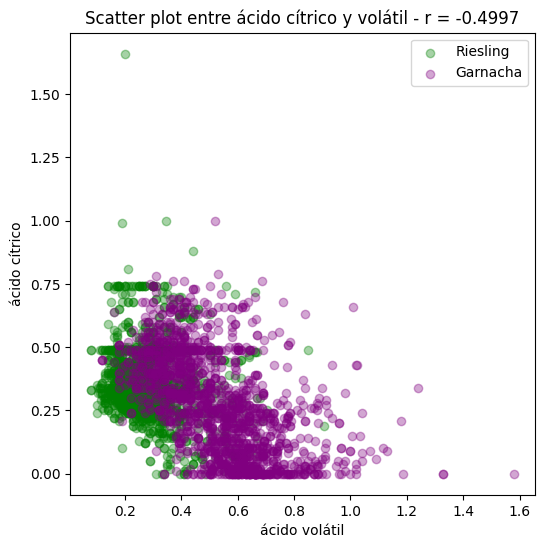

In [568]:
import matplotlib.pyplot as plt

# Se agrupan los datos para cada Tipo de Uva
riesling_data = preprocessed_ds[preprocessed_ds["is_riesling"] == True]
garnacha_data = preprocessed_ds[preprocessed_ds["is_riesling"] == False]

# Se toma el valor de la correlación
correlation = correlations_matrix.loc["volatile acidity", "citric acid"]

# Se establece la escala del gráfico
plt.figure(figsize=(6, 6))
# Se crea el scatter plot para Riesling
plt.scatter(riesling_data["volatile acidity"], riesling_data["citric acid"], color="green", alpha=0.35, label="Riesling")
# Se establece el scatter plot para Garnacha
plt.scatter(garnacha_data["volatile acidity"], garnacha_data["citric acid"], color="purple", alpha=0.35, label="Garnacha")
# Se agrega un titulo
plt.title(f"Scatter plot entre ácido cítrico y volátil - r = {correlation:.4f}")
# Se agregan las etiquetas
plt.xlabel("ácido volátil")
plt.ylabel("ácido cítrico")
# Se agrega leyenda
plt.legend()
# Se muestra
plt.show()

_A simple vista, se ve que en Garnacha hay cierta linealidad. Analizamos cada uva por separado_

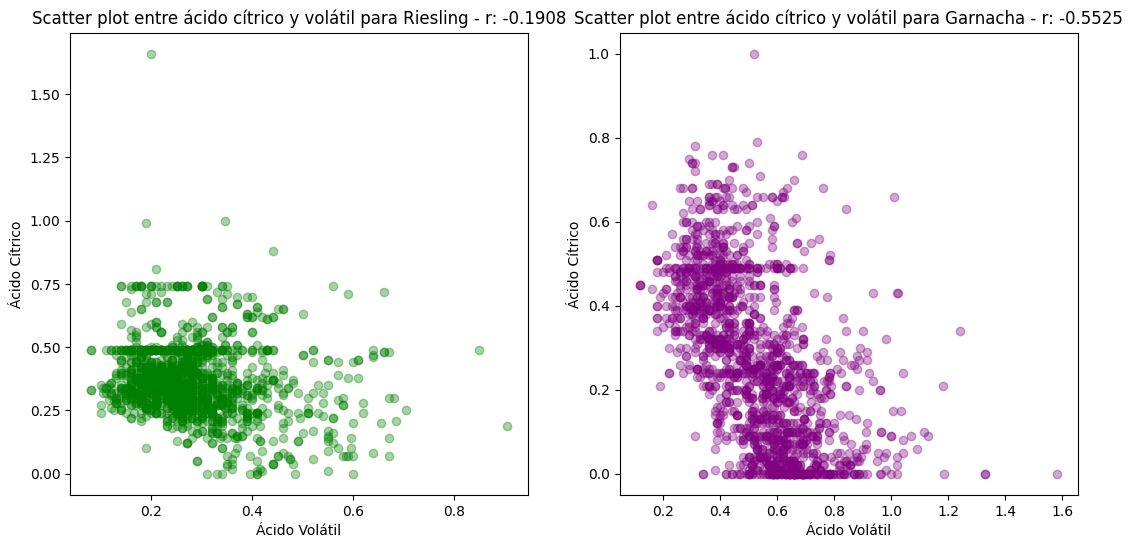

<Figure size 600x600 with 0 Axes>

In [569]:
# Calcula correlaciones para cada uva
correlations_matrix_riesling = riesling_data.drop(columns=["is_riesling", "quality"]).corr()
correlations_matrix_garnacha = garnacha_data.drop(columns=["is_riesling", "quality"]).corr()

# Se crean dos scatter plots, uno para cada uva
# Se establecen sus escalas
fig, (splot1, splot2) = plt.subplots(1, 2, figsize=(13, 6))
plt.figure(figsize=(6, 6))

# Se toma el valor de la correlación
correlation_r = correlations_matrix_riesling.loc["volatile acidity", "citric acid"]
correlation_g = correlations_matrix_garnacha.loc["volatile acidity", "citric acid"]

# Se crea el scatter plot para Riesling y Garnacha
splot1.scatter(riesling_data["volatile acidity"], riesling_data["citric acid"], color="green", alpha=0.35, label="Riesling")
splot2.scatter(garnacha_data["volatile acidity"], garnacha_data["citric acid"], color="purple", alpha=0.35, label="Garnacha")

# Se agregan los titulos
splot1.set_title(f"Scatter plot entre ácido cítrico y volátil para Riesling - r: {correlation_r:.4f}")
splot2.set_title(f"Scatter plot entre ácido cítrico y volátil para Garnacha - r: {correlation_g:.4f}")

# Se agregan las etiquetas
splot1.set_xlabel("Ácido Volátil")
splot1.set_ylabel("Ácido Cítrico")
splot2.set_xlabel("Ácido Volátil")
splot2.set_ylabel("Ácido Cítrico")

# Se muestra
plt.show()

_Ahora si, vemos que las correlaciones cambian y que en realidad, la correlación entre ácido volátil y cítrico solo existe para la uva garnacha. Por esto mismo, podemos visualizar las correlaciones para ambas uvas usando heatmap, y evaluar las diferencias entre ellas._

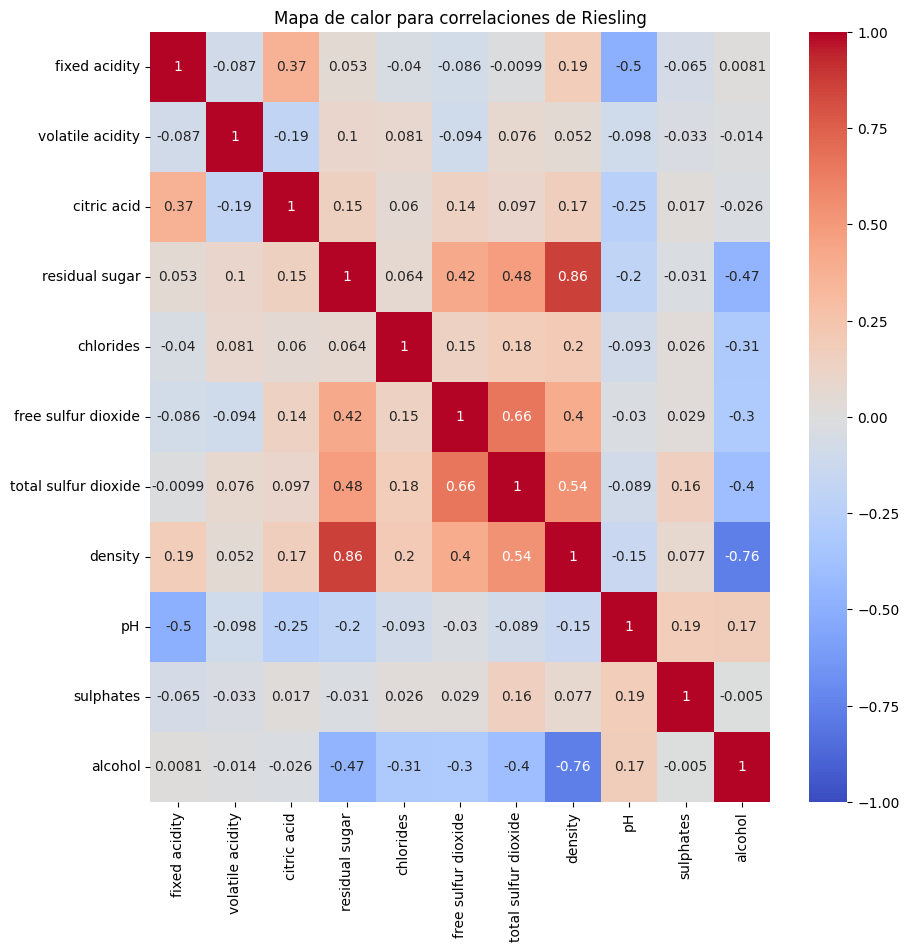

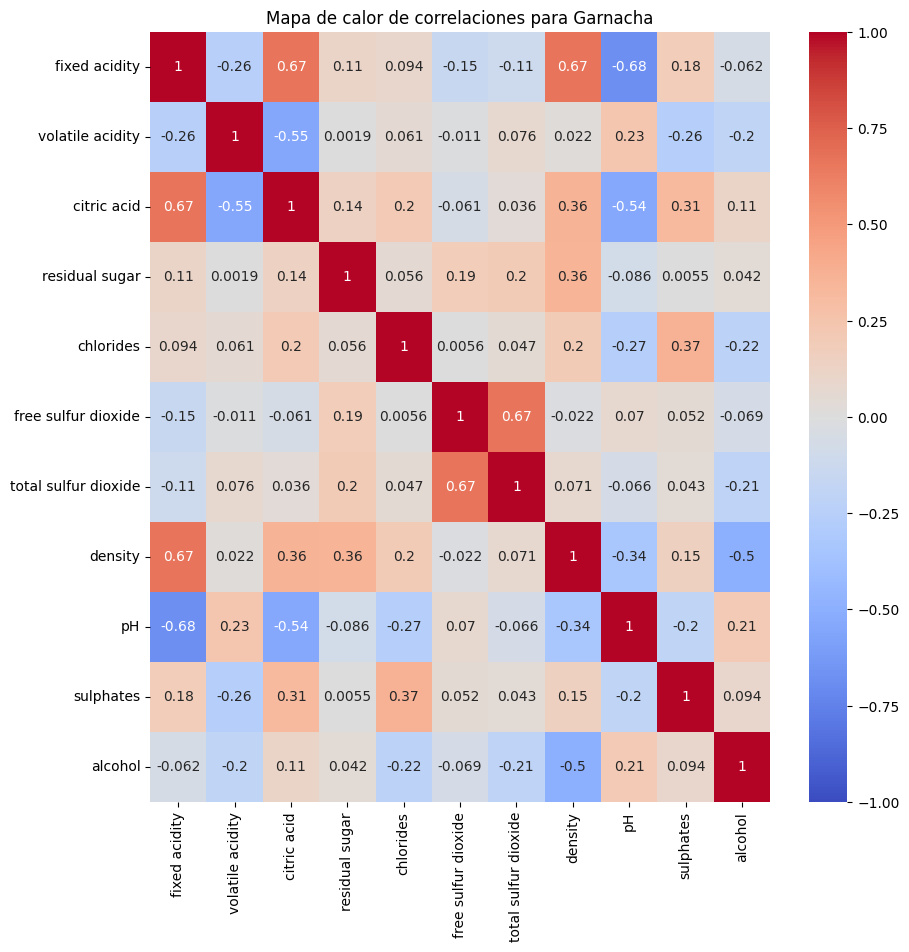

In [570]:
import seaborn as sns

# Se establece la escala
plt.figure(figsize=(10,10))
# Se crea el Heatmap para la matriz de correlaciones de riesling
sns.heatmap(correlations_matrix_riesling, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
# Se agrega el titulo
plt.title("Mapa de calor para correlaciones de Riesling")
# Se muestra
plt.show()
# imprimimos la matriz como un heatmap para garnacha
plt.figure(figsize=(10,10))
# Se crea el Heatmap para la matriz de correlaciones de garnacha
sns.heatmap(correlations_matrix_garnacha, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
# Se agrega el titulo
plt.title("Mapa de calor de correlaciones para Garnacha")
# Se muestra
plt.show()

_Viendo los mapas de calor se observan claras diferencias como en el caso de density y residual sugar_

Buscamos posibles correlaciones en el dataset original o relaciones no lineales:

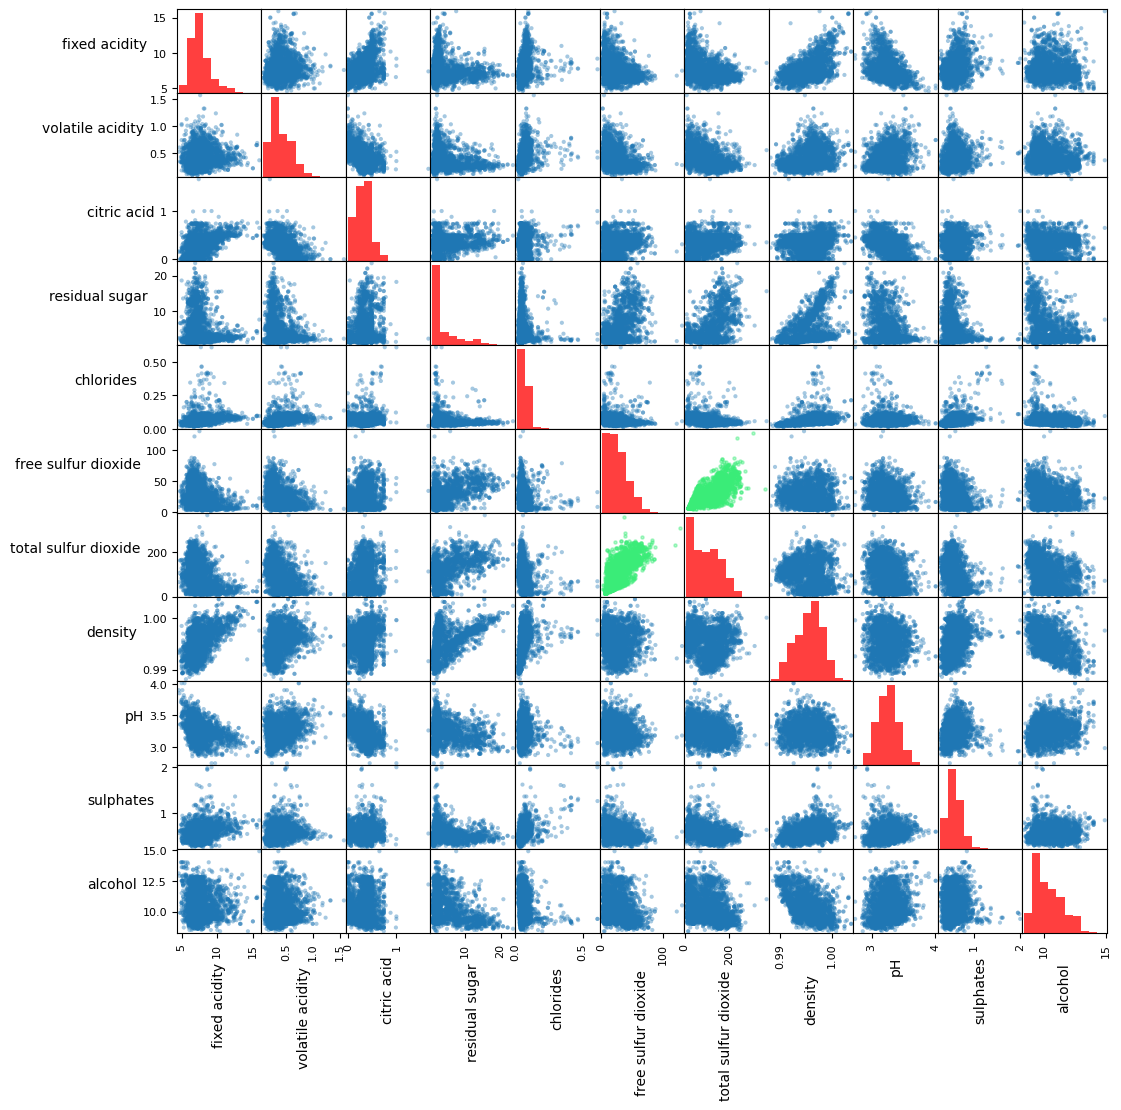

In [571]:
columnas = preprocessed_ds.drop(["is_riesling", "quality"], axis=1)

matrix = pd.plotting.scatter_matrix(columnas, figsize=(12, 12), alpha=.4, hist_kwds={'color':'#ff3f3f'})

for i in range(len(columnas.columns)):
    for j in range(len(columnas.columns)):
        ax = matrix[i, j]
        ax.xaxis.label.set_rotation(90)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.label.set_ha('right')

        if i != j:
            corr_value = correlations_matrix.iloc[i, j]

            if abs(corr_value) > 0.7:
                x_data = columnas.iloc[:, j]
                y_data = columnas.iloc[:, i]
        
                ax.clear()  # Limpiar el gráfico actual
                ax.scatter(x_data, y_data, color='#3aec78', alpha=.4, s=5)
                ax.set_xlabel(columnas.columns[j])
                ax.set_ylabel(columnas.columns[i])        
plt.show()

_Vemos que no hay nada, se puede ver que hay una fuerte correlacion entre total y free sulfur dioxide pero no se ve algo líneal_

### _TYPE_

Lo primero sería ver qué tantas muestras de los grupos _riesling_ y _garnacha_ se tienen, pero de una forma más visual. Ya sabemos por el reporte que hay cantidades similares.

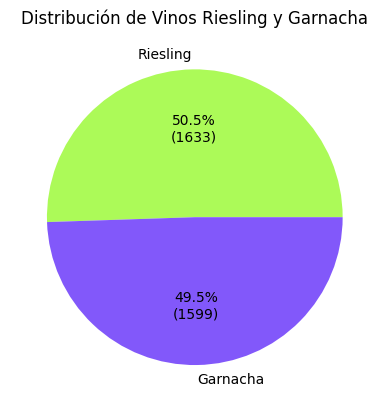

In [572]:
# Se guardan los valores de Riesling y Garnacha
type_couts = preprocessed_ds['is_riesling'].value_counts()

# Calcula la frecuencia del valor y su porcentaje concatenado
def autopct_func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f'{pct:.1f}%\n({absolute})'

# Se crea el gráfico de torta
plt.pie(type_couts, labels=['Riesling', 'Garnacha'], autopct=lambda pct: autopct_func(pct, type_couts), colors=['#ACFA58', '#8258FA'])
# Se agrega un título al gráfico
plt.title('Distribución de Vinos Riesling y Garnacha')
# Se muestran los gráficos
plt.show()

Podríamos, también, probar si existe algún tipo de relación entre el tipo de la uva y la calidad resultante. Por ejemplo, ver si hay alguna uva que tenga más predisposición a tener un puntaje que la otra o si al contrario, la probabilidad de ocurrencia de un puntaje multiplicado por la probabilidad de ocurrencia de una uva, determina la probabilidad de encontrar la uva con el puntaje. Hacemos la prueba de Chi Cuadrado: 

In [573]:
import numpy as np
from scipy.stats import chi2_contingency

# Crear la tabla de contingencia: 'is_riesling' contra 'quality'
tabla = pd.crosstab(preprocessed_ds['quality'], preprocessed_ds['is_riesling'], rownames=['Quality'], colnames=['Is Riesling'])

# Realizar la prueba de chi-cuadrado
chi2_stat, p_value, dof, expected = chi2_contingency(tabla)

# Mostrar los resultados
print("Estadístico Chi-Cuadrado:", chi2_stat)
print("p-value:", p_value)
print("Grados de libertad:", dof)

# Calcular residuos
residuos = (tabla - expected) / np.sqrt(expected)
print("\n", residuos)

Estadístico Chi-Cuadrado: 91.30922490274642
p-value: 1.619617250767187e-17
Grados de libertad: 6

 Is Riesling     False     True 
Quality                        
3            0.033443 -0.033093
4           -0.704042  0.696674
5            4.313167 -4.268030
6           -0.874640  0.865486
7           -3.103763  3.071282
8           -3.763328  3.723945
9           -1.572800  1.556341


_Vemos que el p-valor está muy por debajo de 0.05, por lo que, la hipótesis nula se rechaza y se concluye que no son independientes. Hay una uva más predispuesta a obtener un determinado puntaje que la otra, y mirando los residuos observamos que Riesling suele tener más frecuencia en los puntajes más altos que lo esperado, mientras que Garnacha tiene más muestras de calidad 5 que lo previsto._

### _FIXED ACIDITY_  

Construimos un Box Plot y un Histograma para poder analizar las distribución de la acidez fija en los vinos.

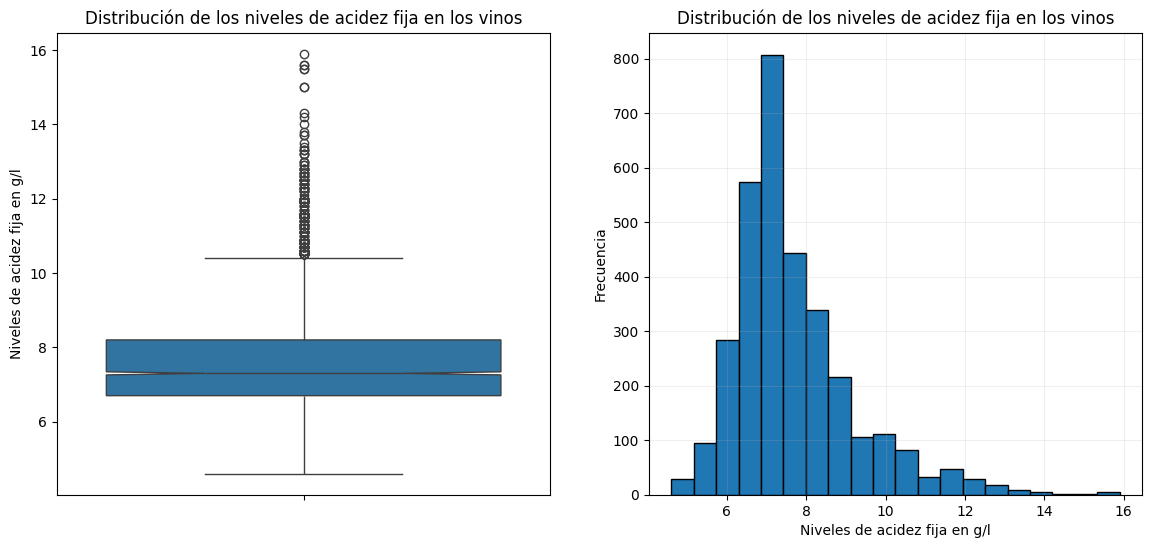

In [574]:
# Se crean dos gráficos: un box plot y un histograma
# Se establecen sus escalas
fig, (bplot, his) = plt.subplots(1, 2, figsize=(14, 6))

# BOX PLOT

# Se crea el boxplot con seaborn. Se establece a que subplot pertenece
sns.boxplot(y="fixed acidity", data=preprocessed_ds, notch=True, ax=bplot)
# Se cambia el nombre de los ejes
bplot.set_ylabel("Niveles de acidez fija en g/l")
# Se agrega un título al gráfico
bplot.set_title("Distribución de los niveles de acidez fija en los vinos")

# HISTOGRAMA

# Se establece un número de bins
bins=20
# Se crea el histograma
his.hist(preprocessed_ds["fixed acidity"], bins=bins, edgecolor="black")
# Se cambia el nombre de los ejes
his.set_xlabel("Niveles de acidez fija en g/l")
his.set_ylabel("Frecuencia")
# Se agrega un título al gráfico
his.set_title("Distribución de los niveles de acidez fija en los vinos")
# Se agrega una grilla al histograma. Se ajusta la transparencia
his.grid(alpha=0.2)

# Se muestran los gráficos
plt.show()

_Podemos comparar ahora como varían las distribuciones según el tipo de uva. Además, como se ve en el gráfico, hay un problema con las escalas debido a los outliers, lo que no permite apreciar bien el resto de la distribución._

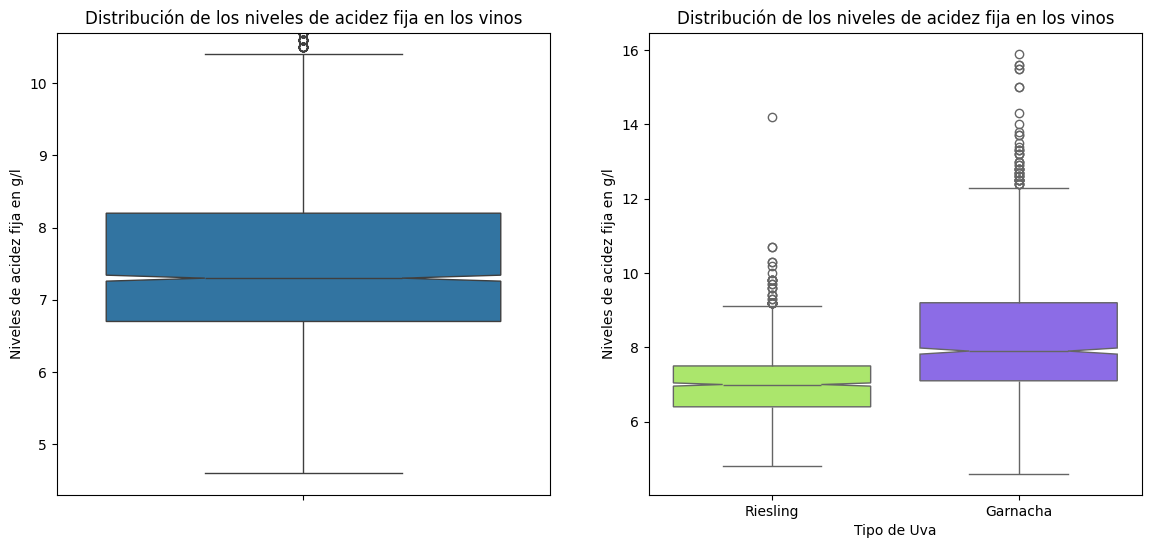

In [575]:
# Se crean dos gráficos: un box plot ampliado y un box plot de dos cajas
# Se establecen sus escalas
fig, (bplot1, bplot2) = plt.subplots(1, 2, figsize=(14, 6))

# BOX PLOT DE 1 CAJA

# Se crea el boxplot con seaborn
sns.boxplot(y="fixed acidity", data=preprocessed_ds, notch=True, ax=bplot1)
# Se cambia el nombre de los ejes
bplot1.set_ylabel("Niveles de acidez fija en g/l")
# Se agrega un título al gráfico
bplot1.set_title("Distribución de los niveles de acidez fija en los vinos")
# Se limita el rango de y
bplot1.set_ylim(4.3, 10.7)

# BOX PLOT DE 2 CAJAS

# Se hace la paleta de colores
colores = ['#ACFA58', '#8258FA']
# Se crea el boxplot con seaborn. Antes se aplica un renombre y se aplican colores
sns.boxplot (
    x=preprocessed_ds['is_riesling'].replace({True : 'Riesling', False : 'Garnacha'}), 
    y=preprocessed_ds['fixed acidity'],
    notch=True, 
    ax=bplot2,
    palette=colores,
    hue=preprocessed_ds['is_riesling'].replace({True : 'Riesling', False : 'Garnacha'}),
    legend=False
)
# Se cambia el nombre de los ejes
bplot2.set_xlabel("Tipo de Uva")
bplot2.set_ylabel("Niveles de acidez fija en g/l")
# Se agrega un título al gráfico
bplot2.set_title("Distribución de los niveles de acidez fija en los vinos")
# Se muestran los gráficos
plt.show()

_Mirando el gráfico, parecieran haber diferencias significativas en los niveles de acidez fija según el tipo de uva, y la distribución general de la ácidez normal. Los outliers según el tipo de uva cambian respecto del original lo que tiene sentido si tenemos en cuenta que cada vino tiene sus propiedades_

Profundizando en las correlaciones...

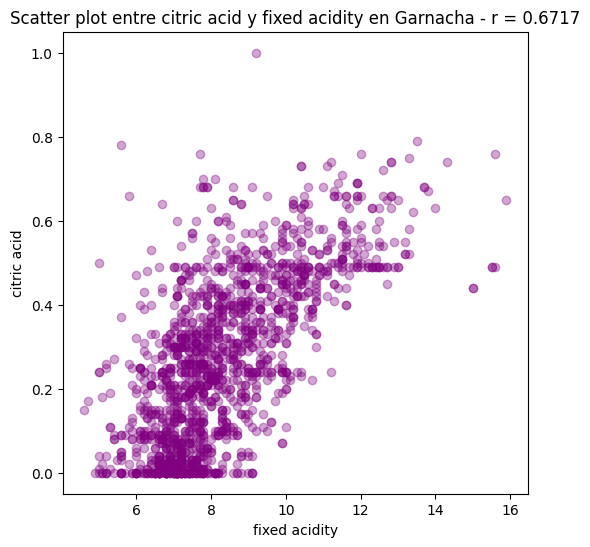

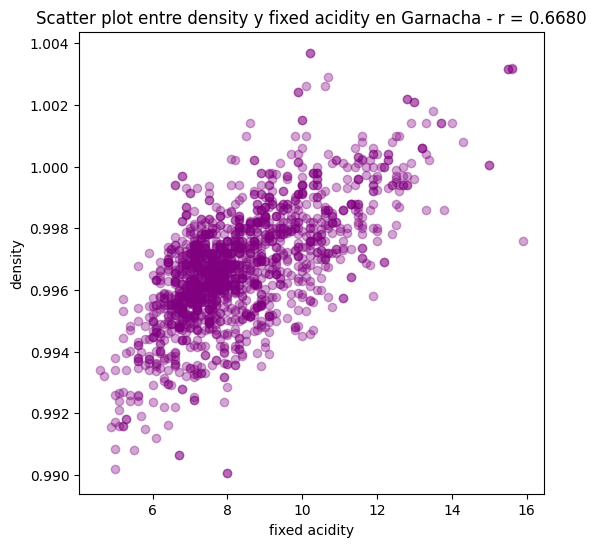

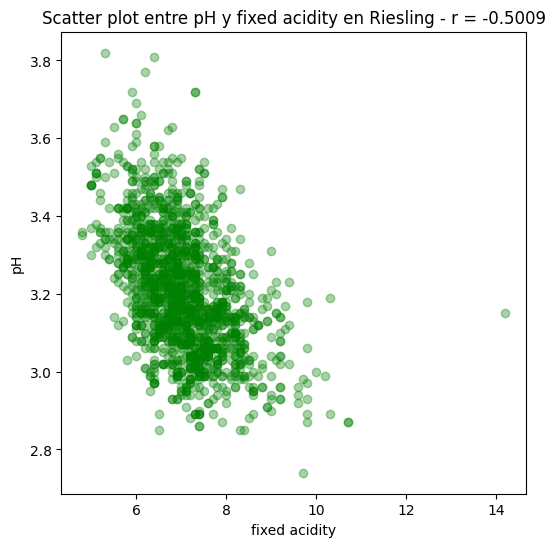

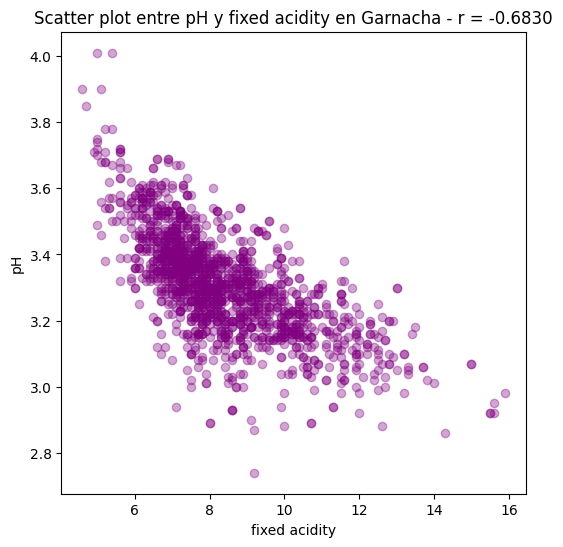

In [576]:
# Por cada columna de la matriz de correlación
for i, col in enumerate(correlations_matrix.columns):
  # Se extrae el valor de correlación
  correlation_r = correlations_matrix_riesling.loc["fixed acidity", col]
  correlation_g = correlations_matrix_garnacha.loc["fixed acidity", col]

  if col != "fixed acidity" :
    if (correlation_r >= 0.5 or correlation_r <= -0.5) :
      # Se establece la escala del gráfico
      plt.figure(figsize=(6, 6))
      # Se crea el scatter plot para Riesling
      plt.scatter(riesling_data["fixed acidity"], riesling_data[col], color="green", alpha=0.35)
      # Se agrega un titulo
      plt.title(f"Scatter plot entre {col} y fixed acidity en Riesling - r = {correlation_r:.4f}")
      # Se agregan las etiquetas
      plt.xlabel("fixed acidity")
      plt.ylabel(col)
      # Se muestra
      plt.show()
    if (correlation_g >= 0.5 or correlation_g <= -0.5) :
      # Se establece la escala del gráfico
      plt.figure(figsize=(6, 6))
      # Se establece el scatter plot para Garnacha
      plt.scatter(garnacha_data["fixed acidity"], garnacha_data[col], color="purple", alpha=0.35)
      # Se agrega un titulo
      plt.title(f"Scatter plot entre {col} y fixed acidity en Garnacha - r = {correlation_g:.4f}")
      # Se agregan las etiquetas
      plt.xlabel("fixed acidity")
      plt.ylabel(col)
      # Se muestra
      plt.show()

_Como vemos, parecieran haber asociaciones lineales entre las variables. Aunque, la relación entre pH y fixed acidity en garnacha tiene un aire de algo más complejo, ya que parece que la variación de pH cambia según el valor de fixed acidity._ 

### _VOLATILE ACIDITY_

Planteamos lo mismo que en _fixed acidity_...

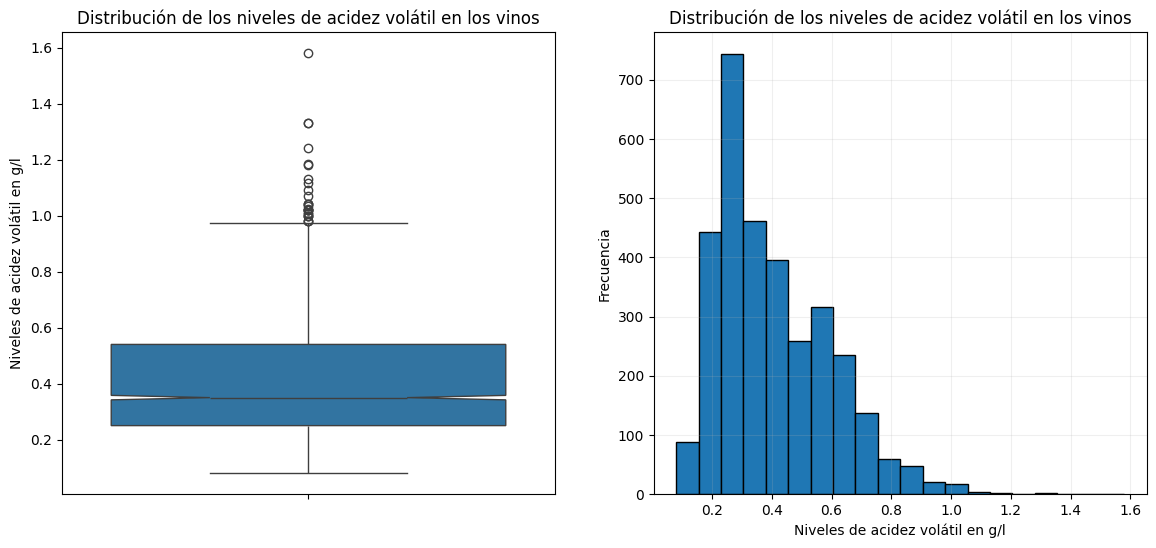

In [577]:
# Se crean dos gráficos: un box plot y un histograma
# Se establecen sus escalas
fig, (bplot, his) = plt.subplots(1, 2, figsize=(14, 6))

# BOX PLOT

# Lo mismo que antes
sns.boxplot(y="volatile acidity", data=preprocessed_ds, notch=True, ax=bplot)
bplot.set_ylabel("Niveles de acidez volátil en g/l")
bplot.set_title("Distribución de los niveles de acidez volátil en los vinos")

# HISTOGRAMA

# Lo mismo que antes
bins=20
his.hist(preprocessed_ds["volatile acidity"], bins=bins, edgecolor="black")
his.set_xlabel("Niveles de acidez volátil en g/l")
his.set_ylabel("Frecuencia")
his.set_title("Distribución de los niveles de acidez volátil en los vinos")
his.grid(alpha=0.2)
plt.show()

_De nuevo, planteamos lo mismo..._

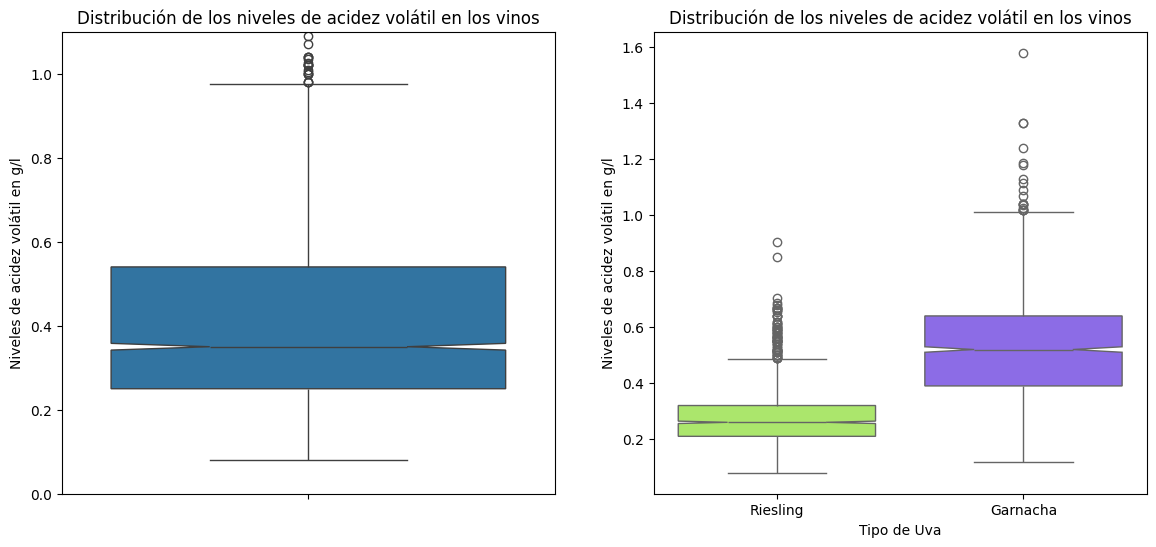

In [578]:
# Se crean dos gráficos: un box plot ampliado y un box plot de dos cajas
# Se establecen sus escalas
fig, (bplot1, bplot2) = plt.subplots(1, 2, figsize=(14, 6))

# BOX PLOT DE 1 CAJA

# Lo mismo que antes
sns.boxplot(y="volatile acidity", data=preprocessed_ds, notch=True, ax=bplot1)
bplot1.set_ylabel("Niveles de acidez volátil en g/l")
bplot1.set_title("Distribución de los niveles de acidez volátil en los vinos")
bplot1.set_ylim(0, 1.1)

# BOX PLOT DE 2 CAJAS

# Lo mismo que antes
colores = ['#ACFA58', '#8258FA']
sns.boxplot (
    x=preprocessed_ds['is_riesling'].replace({True : 'Riesling', False : 'Garnacha'}), 
    y=preprocessed_ds['volatile acidity'],
    notch=True, 
    ax=bplot2,
    palette=colores,
    hue=preprocessed_ds['is_riesling'].replace({True : 'Riesling', False : 'Garnacha'}),
    legend=False
)
bplot2.set_xlabel("Tipo de Uva")
bplot2.set_ylabel("Niveles de acidez volátil en g/l")
bplot2.set_title("Distribución de los niveles de acidez volátil en los vinos")

plt.show()

_Mirando el gráfico, parecieran haber diferencias significativas en los niveles de acidez volátil según el tipo de uva, y la distribución general de la ácidez sesgada. Los outliers según el tipo de uva cambian respecto del original lo que tiene sentido si tenemos en cuenta que cada vino tiene sus propiedades_

Profundizamos en las correlaciones...

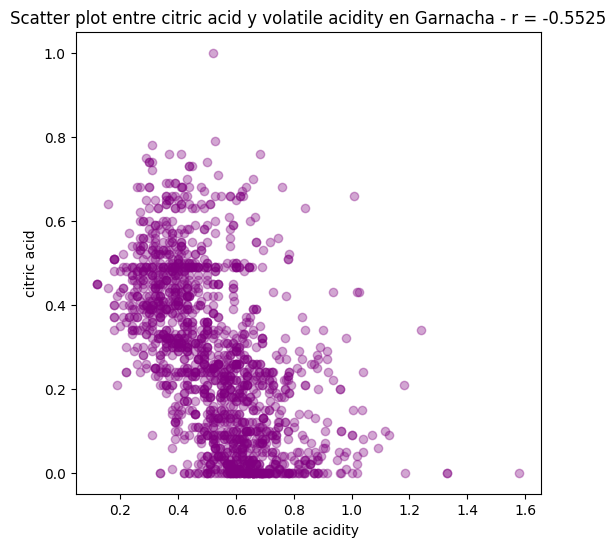

In [579]:
# Por cada columna de la matriz de correlación
for i, col in enumerate(correlations_matrix.columns):
  # Se extrae el valor de correlación
  correlation_r = correlations_matrix_riesling.loc["volatile acidity", col]
  correlation_g = correlations_matrix_garnacha.loc["volatile acidity", col]

  if col != "volatile acidity" :
    if (correlation_r >= 0.5 or correlation_r <= -0.5) :
      # Se establece la escala del gráfico
      plt.figure(figsize=(6, 6))
      # Se crea el scatter plot para Riesling
      plt.scatter(riesling_data["volatile acidity"], riesling_data[col], color="green", alpha=0.35)
      # Se agrega un titulo
      plt.title(f"Scatter plot entre {col} y volatile acidity en Riesling - r = {correlation_r:.4f}")
      # Se agregan las etiquetas
      plt.xlabel("volatile acidity")
      plt.ylabel(col)
      # Se muestra
      plt.show()
    if (correlation_g >= 0.5 or correlation_g <= -0.5) :
      # Se establece la escala del gráfico
      plt.figure(figsize=(6, 6))
      # Se establece el scatter plot para Garnacha
      plt.scatter(garnacha_data["volatile acidity"], garnacha_data[col], color="purple", alpha=0.35)
      # Se agrega un titulo
      plt.title(f"Scatter plot entre {col} y volatile acidity en Garnacha - r = {correlation_g:.4f}")
      # Se agregan las etiquetas
      plt.xlabel("volatile acidity")
      plt.ylabel(col)
      # Se muestra
      plt.show()

_Pareciera haber una linealidad entre citric acid y volatile acidity_

### _CITRIC ACID_

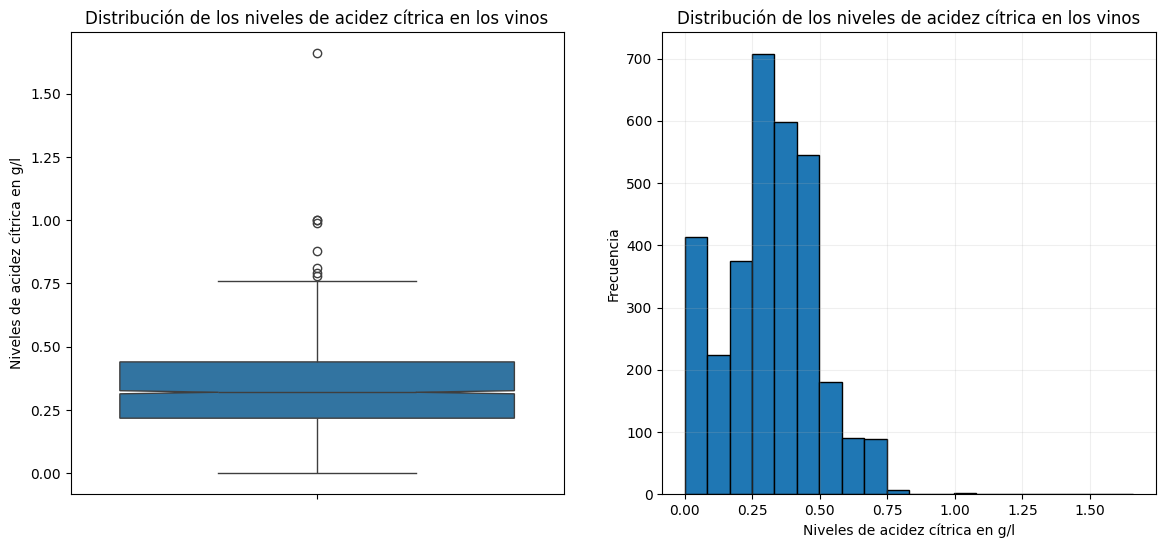

In [580]:
# Se crean dos gráficos: un box plot y un histograma
# Se establecen sus escalas
fig, (bplot, his) = plt.subplots(1, 2, figsize=(14, 6))

# BOX PLOT

# Lo mismo que antes
sns.boxplot(y="citric acid", data=preprocessed_ds, notch=True, ax=bplot)
bplot.set_ylabel("Niveles de acidez cítrica en g/l")
bplot.set_title("Distribución de los niveles de acidez cítrica en los vinos")

# HISTOGRAMA

# Lo mismo que antes
bins=20
his.hist(preprocessed_ds["citric acid"], bins=bins, edgecolor="black")
his.set_xlabel("Niveles de acidez cítrica en g/l")
his.set_ylabel("Frecuencia")
his.set_title("Distribución de los niveles de acidez cítrica en los vinos")
his.grid(alpha=0.2)
plt.show()

_De nuevo, planteamos lo mismo..._

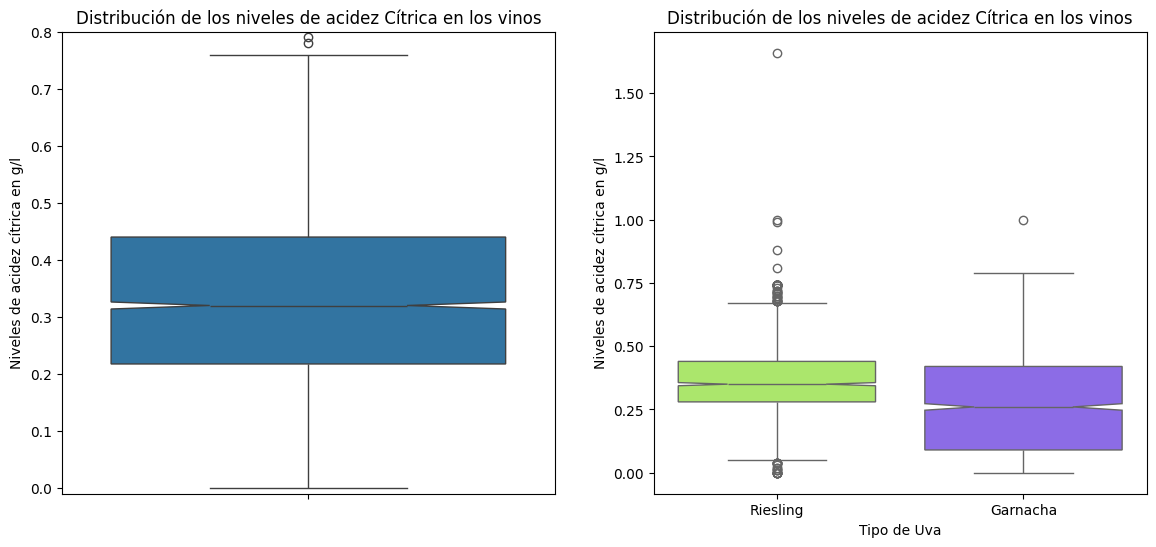

In [581]:
# Se crean dos gráficos: un box plot ampliado y un box plot de dos cajas
# Se establecen sus escalas
fig, (bplot1, bplot2) = plt.subplots(1, 2, figsize=(14, 6))

# BOX PLOT DE 1 CAJA

# Lo mismo que antes
sns.boxplot(y="citric acid", data=preprocessed_ds, notch=True, ax=bplot1)
bplot1.set_ylabel("Niveles de acidez cítrica en g/l")
bplot1.set_title("Distribución de los niveles de acidez Cítrica en los vinos")
bplot1.set_ylim(-0.01, 0.8)

# BOX PLOT DE 2 CAJAS

# Lo mismo que antes
colores = ['#ACFA58', '#8258FA']
sns.boxplot (
    x=preprocessed_ds['is_riesling'].replace({True : 'Riesling', False : 'Garnacha'}), 
    y=preprocessed_ds['citric acid'],
    notch=True, 
    ax=bplot2,
    palette=colores,
    hue=preprocessed_ds['is_riesling'].replace({True : 'Riesling', False : 'Garnacha'}),
    legend=False
)
bplot2.set_xlabel("Tipo de Uva")
bplot2.set_ylabel("Niveles de acidez cítrica en g/l")
bplot2.set_title("Distribución de los niveles de acidez Cítrica en los vinos")

plt.show()

_Mirando el gráfico, parecieran haber diferencias significativas en los niveles de acidez cítrica según el tipo de uva, y la distribución general de la ácidez bimodal. Los outliers según el tipo de uva cambian respecto del original lo que tiene sentido si tenemos en cuenta que cada vino tiene sus propiedades._

Profundizamos en las correlaciones...

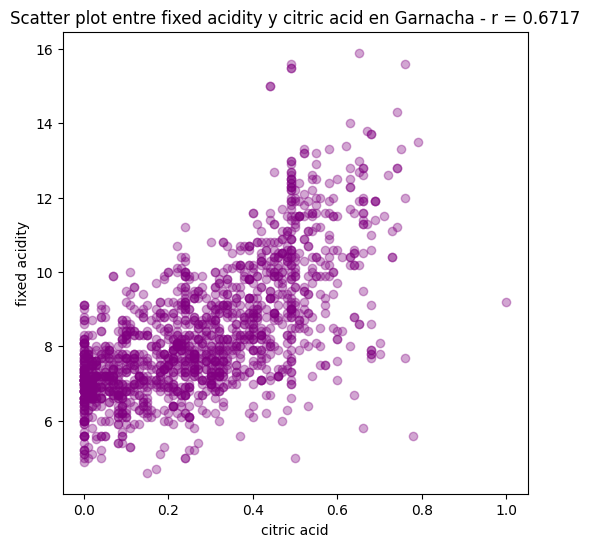

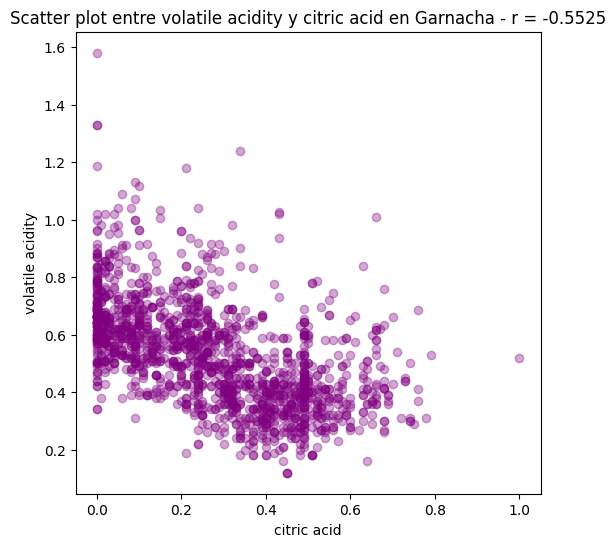

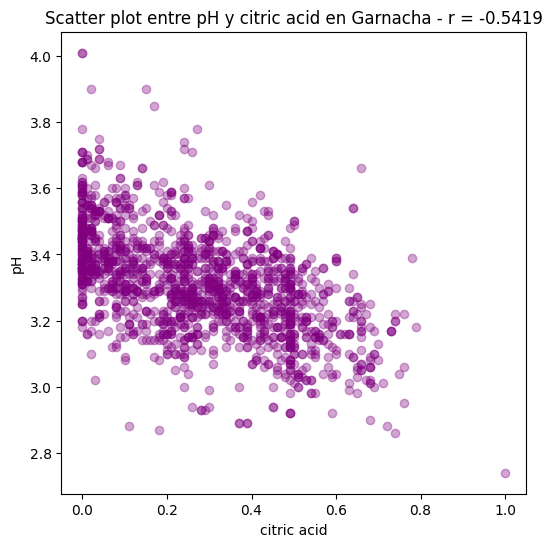

In [582]:
# Por cada columna de la matriz de correlación
for i, col in enumerate(correlations_matrix.columns):
  # Se extrae el valor de correlación
  correlation_r = correlations_matrix_riesling.loc["citric acid", col]
  correlation_g = correlations_matrix_garnacha.loc["citric acid", col]

  if col != "citric acid" :
    if (correlation_r >= 0.5 or correlation_r <= -0.5) :
      # Se establece la escala del gráfico
      plt.figure(figsize=(6, 6))
      # Se crea el scatter plot para Riesling
      plt.scatter(riesling_data["citric acid"], riesling_data[col], color="green", alpha=0.35)
      # Se agrega un titulo
      plt.title(f"Scatter plot entre {col} y citric acid en Riesling - r = {correlation_r:.4f}")
      # Se agregan las etiquetas
      plt.xlabel("citric acid")
      plt.ylabel(col)
      # Se muestra
      plt.show()
    if (correlation_g >= 0.5 or correlation_g <= -0.5) :
      # Se establece la escala del gráfico
      plt.figure(figsize=(6, 6))
      # Se establece el scatter plot para Garnacha
      plt.scatter(garnacha_data["citric acid"], garnacha_data[col], color="purple", alpha=0.35)
      # Se agrega un titulo
      plt.title(f"Scatter plot entre {col} y citric acid en Garnacha - r = {correlation_g:.4f}")
      # Se agregan las etiquetas
      plt.xlabel("citric acid")
      plt.ylabel(col)
      # Se muestra
      plt.show()

_Pareciera haber algo de linealidad pero no es muy evidente. La primera gráfica tiene una leve curva que podría indicar algo más complejo que es más evidente acá que la primera vez que se vió._

### _RESIDUAL SUGAR_

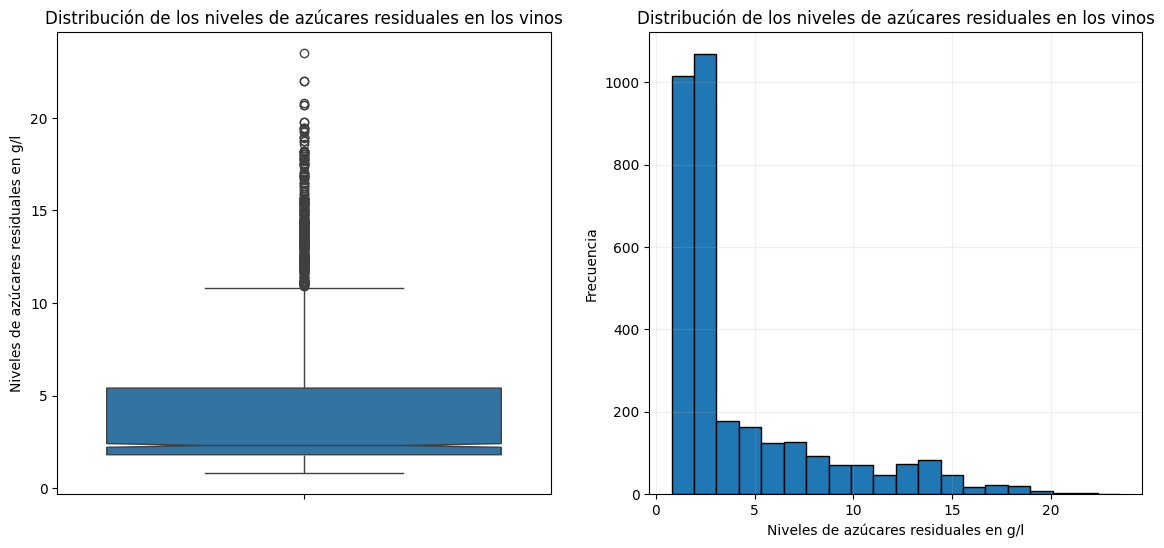

In [583]:
# Se crean dos gráficos: un box plot y un histograma
# Se establecen sus escalas
fig, (bplot, his) = plt.subplots(1, 2, figsize=(14, 6))

# BOX PLOT

# Lo mismo que antes
sns.boxplot(y="residual sugar", data=preprocessed_ds, notch=True, ax=bplot)
bplot.set_ylabel("Niveles de azúcares residuales en g/l")
bplot.set_title("Distribución de los niveles de azúcares residuales en los vinos")

# HISTOGRAMA

# Lo mismo que antes
bins=20
his.hist(preprocessed_ds["residual sugar"], bins=bins, edgecolor="black")
his.set_xlabel("Niveles de azúcares residuales en g/l")
his.set_ylabel("Frecuencia")
his.set_title("Distribución de los niveles de azúcares residuales en los vinos")
his.grid(alpha=0.2)
plt.show()

_De nuevo, planteamos lo mismo..._

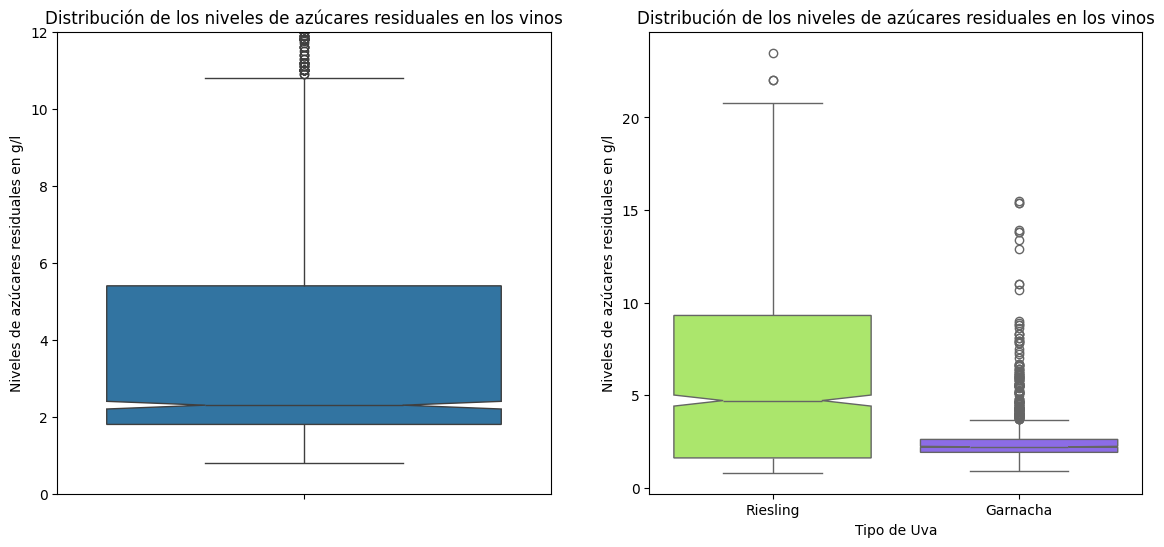

In [584]:
# Se crean dos gráficos: un box plot ampliado y un box plot de dos cajas
# Se establecen sus escalas
fig, (bplot1, bplot2) = plt.subplots(1, 2, figsize=(14, 6))

# BOX PLOT DE 1 CAJA

# Lo mismo que antes
sns.boxplot(y="residual sugar", data=preprocessed_ds, notch=True, ax=bplot1)
bplot1.set_ylabel("Niveles de azúcares residuales en g/l")
bplot1.set_title("Distribución de los niveles de azúcares residuales en los vinos")
bplot1.set_ylim(0, 12)

# BOX PLOT DE 2 CAJAS

# Lo mismo que antes
colores = ['#ACFA58', '#8258FA']
sns.boxplot (
    x=preprocessed_ds['is_riesling'].replace({True : 'Riesling', False : 'Garnacha'}), 
    y=preprocessed_ds['residual sugar'],
    notch=True, 
    ax=bplot2,
    palette=colores,
    hue=preprocessed_ds['is_riesling'].replace({True : 'Riesling', False : 'Garnacha'}),
    legend=False
)
bplot2.set_xlabel("Tipo de Uva")
bplot2.set_ylabel("Niveles de azúcares residuales en g/l")
bplot2.set_title("Distribución de los niveles de azúcares residuales en los vinos")

plt.show()

_Mirando el gráfico, parecieran haber diferencias significativas en los niveles de azúcares residuales según el tipo de uva, y la distribución general de la ácidez sesgada. Los outliers, según el tipo de uva, cambian respecto del original lo que tiene sentido si tenemos en cuenta que cada vino tiene sus propiedades_

Profundizamos en las correlaciones...

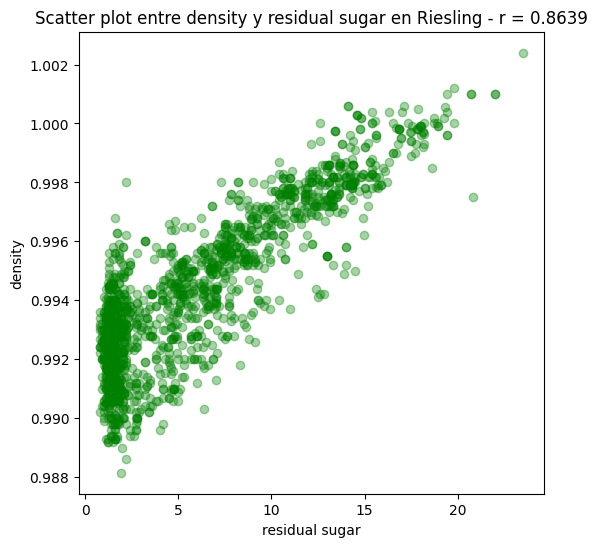

In [585]:
# Por cada columna de la matriz de correlación
for i, col in enumerate(correlations_matrix.columns):
  # Se extrae el valor de correlación
  correlation_r = correlations_matrix_riesling.loc["residual sugar", col]
  correlation_g = correlations_matrix_garnacha.loc["residual sugar", col]

  if col != "residual sugar" :
    if (correlation_r >= 0.5 or correlation_r <= -0.5) :
      # Se establece la escala del gráfico
      plt.figure(figsize=(6, 6))
      # Se crea el scatter plot para Riesling
      plt.scatter(riesling_data["residual sugar"], riesling_data[col], color="green", alpha=0.35)
      # Se agrega un titulo
      plt.title(f"Scatter plot entre {col} y residual sugar en Riesling - r = {correlation_r:.4f}")
      # Se agregan las etiquetas
      plt.xlabel("residual sugar")
      plt.ylabel(col)
      # Se muestra
      plt.show()
    if (correlation_g >= 0.5 or correlation_g <= -0.5) :
      # Se establece la escala del gráfico
      plt.figure(figsize=(6, 6))
      # Se establece el scatter plot para Garnacha
      plt.scatter(garnacha_data["residual sugar"], garnacha_data[col], color="purple", alpha=0.35)
      # Se agrega un titulo
      plt.title(f"Scatter plot entre {col} y residual sugar en Garnacha - r = {correlation_g:.4f}")
      # Se agregan las etiquetas
      plt.xlabel("residual sugar")
      plt.ylabel(col)
      # Se muestra
      plt.show()

_Hay una cierta linealidad pero llama mucho la atención lo que sucede cerca 0. Se ve como una linea vertical._

### _CHLORIDES_

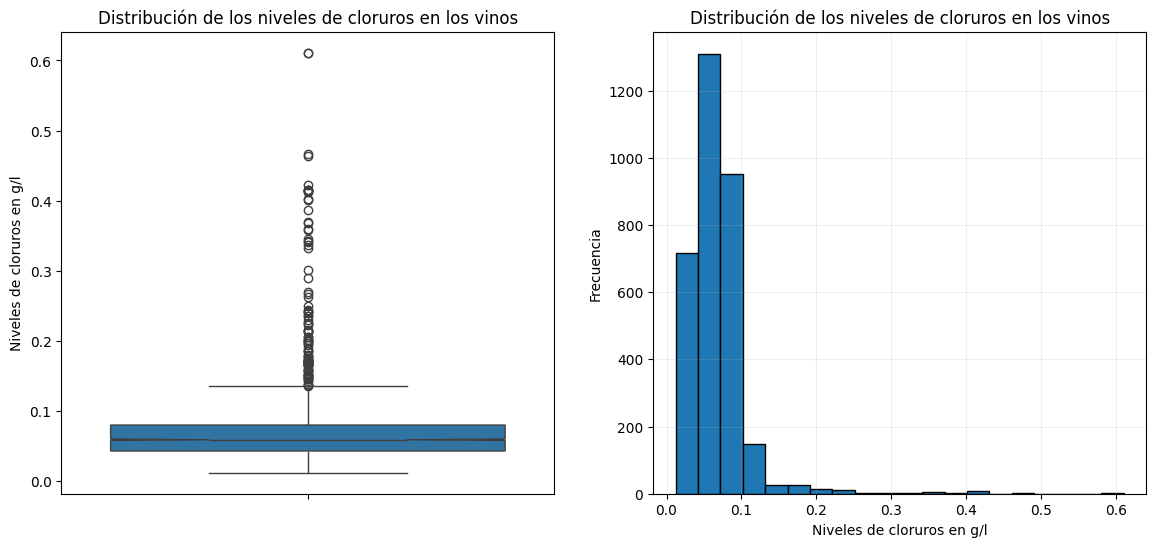

In [586]:
# Se crean dos gráficos: un box plot y un histograma
# Se establecen sus escalas
fig, (bplot, his) = plt.subplots(1, 2, figsize=(14, 6))

# BOX PLOT

# Lo mismo que antes
sns.boxplot(y="chlorides", data=preprocessed_ds, notch=True, ax=bplot)
bplot.set_ylabel("Niveles de cloruros en g/l")
bplot.set_title("Distribución de los niveles de cloruros en los vinos")

# HISTOGRAMA

# Lo mismo que antes
bins=20
his.hist(preprocessed_ds["chlorides"], bins=bins, edgecolor="black")
his.set_xlabel("Niveles de cloruros en g/l")
his.set_ylabel("Frecuencia")
his.set_title("Distribución de los niveles de cloruros en los vinos")
his.grid(alpha=0.2)
plt.show()

_De nuevo, planteamos lo mismo..._

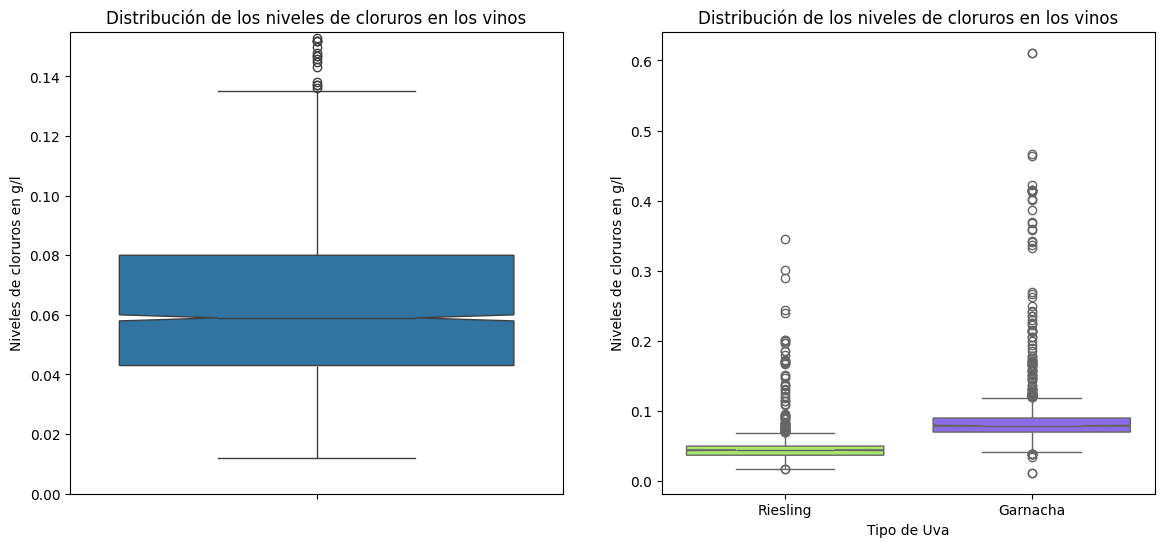

In [587]:
# Se crean dos gráficos: un box plot ampliado y un box plot de dos cajas
# Se establecen sus escalas
fig, (bplot1, bplot2) = plt.subplots(1, 2, figsize=(14, 6))

# BOX PLOT DE 1 CAJA

# Lo mismo que antes
sns.boxplot(y="chlorides", data=preprocessed_ds, notch=True, ax=bplot1)
bplot1.set_ylabel("Niveles de cloruros en g/l")
bplot1.set_title("Distribución de los niveles de cloruros en los vinos")
bplot1.set_ylim(0, 0.155)

# BOX PLOT DE 2 CAJAS

# Lo mismo que antes
colores = ['#ACFA58', '#8258FA']
sns.boxplot (
    x=preprocessed_ds['is_riesling'].replace({True : 'Riesling', False : 'Garnacha'}), 
    y=preprocessed_ds['chlorides'],
    notch=True, 
    ax=bplot2,
    palette=colores,
    hue=preprocessed_ds['is_riesling'].replace({True : 'Riesling', False : 'Garnacha'}),
    legend=False
)
bplot2.set_xlabel("Tipo de Uva")
bplot2.set_ylabel("Niveles de cloruros en g/l")
bplot2.set_title("Distribución de los niveles de cloruros en los vinos")

plt.show()

_Mirando el gráfico, parecieran haber diferencias significativas en los niveles de acidez volátil según el tipo de uva, y la distribución general de la ácidez sesgada. Los outliers según el tipo de uva cambian respecto del original lo que tiene sentido si tenemos en cuenta que cada vino tiene sus propiedades_

No presenta correlaciones fuertes con ninguna variable.

### _FREE SULFUR DIOXIDE_

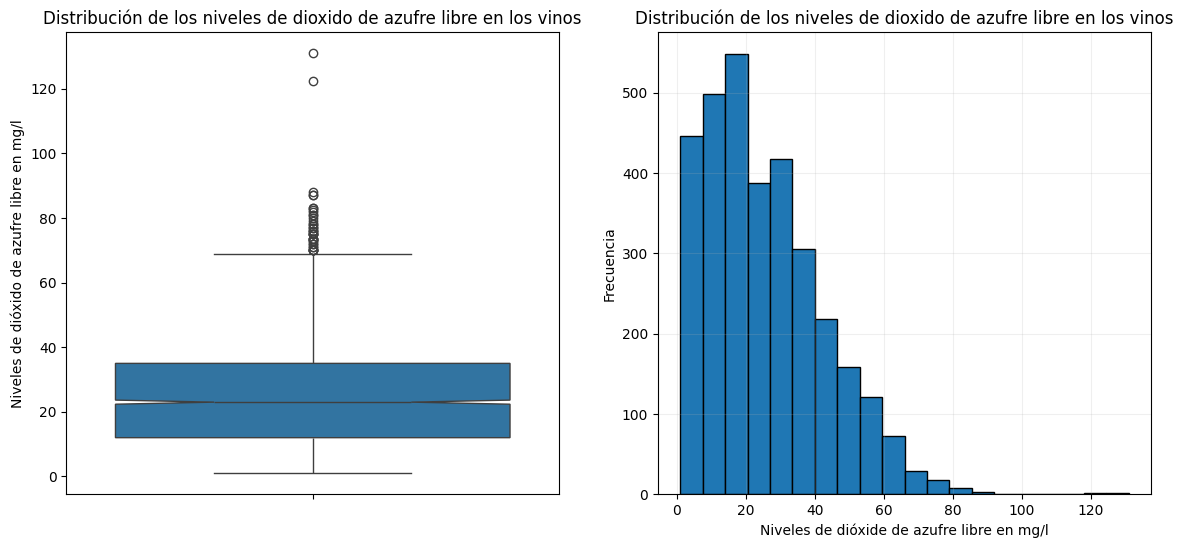

In [588]:
# Se crean dos gráficos: un box plot y un histograma
# Se establecen sus escalas
fig, (bplot, his) = plt.subplots(1, 2, figsize=(14, 6))

# BOX PLOT

# Lo mismo que antes
sns.boxplot(y="free sulfur dioxide", data=preprocessed_ds, notch=True, ax=bplot)
bplot.set_ylabel("Niveles de dióxido de azufre libre en mg/l")
bplot.set_title("Distribución de los niveles de dioxido de azufre libre en los vinos")

# HISTOGRAMA

# Lo mismo que antes
bins=20
his.hist(preprocessed_ds["free sulfur dioxide"], bins=bins, edgecolor="black")
his.set_xlabel("Niveles de dióxide de azufre libre en mg/l")
his.set_ylabel("Frecuencia")
his.set_title("Distribución de los niveles de dioxido de azufre libre en los vinos")
his.grid(alpha=0.2)
plt.show()

_De nuevo, planteamos lo mismo..._

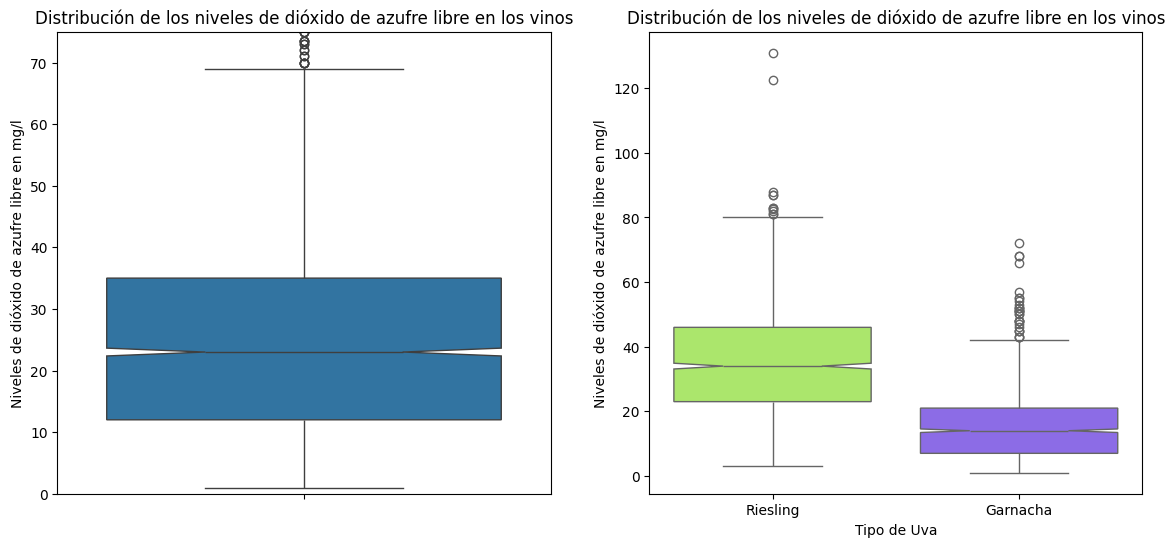

In [589]:
# Se crean dos gráficos: un box plot ampliado y un box plot de dos cajas
# Se establecen sus escalas
fig, (bplot1, bplot2) = plt.subplots(1, 2, figsize=(14, 6))

# BOX PLOT DE 1 CAJA

# Lo mismo que antes
sns.boxplot(y="free sulfur dioxide", data=preprocessed_ds, notch=True, ax=bplot1)
bplot1.set_ylabel("Niveles de dióxido de azufre libre en mg/l")
bplot1.set_title("Distribución de los niveles de dióxido de azufre libre en los vinos")
bplot1.set_ylim(0, 75)

# BOX PLOT DE 2 CAJAS

# Lo mismo que antes
colores = ['#ACFA58', '#8258FA']
sns.boxplot (
    x=preprocessed_ds['is_riesling'].replace({True : 'Riesling', False : 'Garnacha'}), 
    y=preprocessed_ds['free sulfur dioxide'],
    notch=True, 
    ax=bplot2,
    palette=colores,
    hue=preprocessed_ds['is_riesling'].replace({True : 'Riesling', False : 'Garnacha'}),
    legend=False
)
bplot2.set_xlabel("Tipo de Uva")
bplot2.set_ylabel("Niveles de dióxido de azufre libre en mg/l")
bplot2.set_title("Distribución de los niveles de dióxido de azufre libre en los vinos")

plt.show()

_Mirando el gráfico, parecieran haber diferencias significativas en los niveles de SO2 libre según el tipo de uva, y la distribución general del SO2 libre sesgada. Los outliers según el tipo de uva cambian respecto del original lo que tiene sentido si tenemos en cuenta que cada vino tiene sus propiedades_

Profundizamos en las correlaciones...

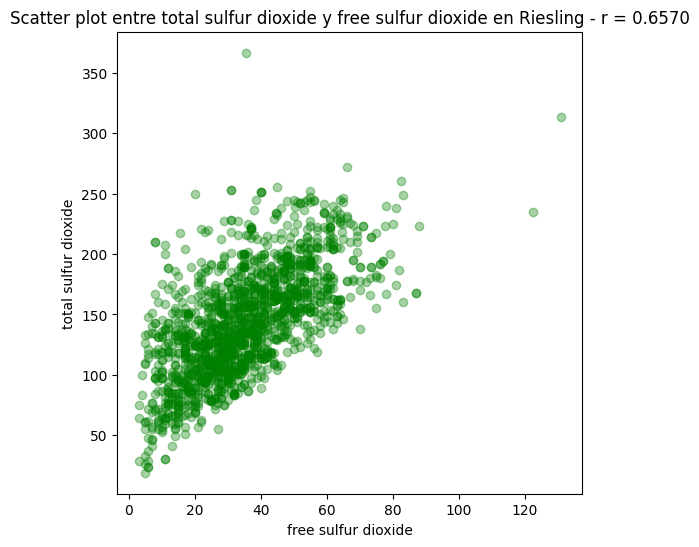

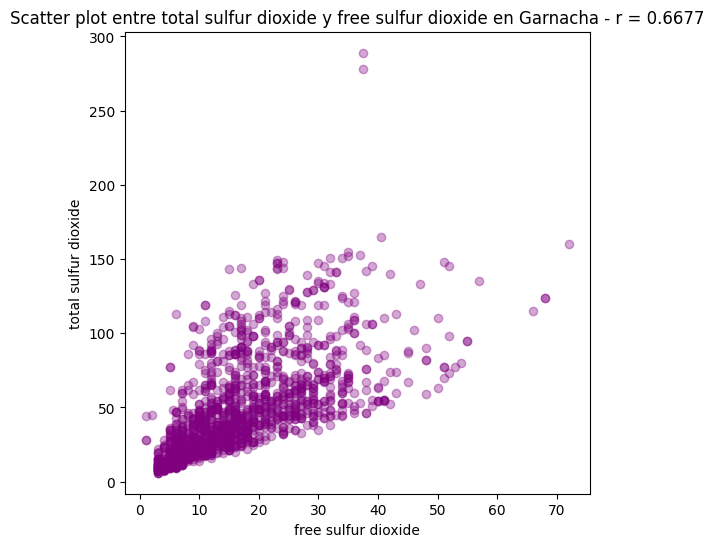

In [590]:
# Por cada columna de la matriz de correlación
for i, col in enumerate(correlations_matrix.columns):
  # Se extrae el valor de correlación
  correlation_r = correlations_matrix_riesling.loc["free sulfur dioxide", col]
  correlation_g = correlations_matrix_garnacha.loc["free sulfur dioxide", col]

  if col != "free sulfur dioxide" :
    if (correlation_r >= 0.5 or correlation_r <= -0.5) :
      # Se establece la escala del gráfico
      plt.figure(figsize=(6, 6))
      # Se crea el scatter plot para Riesling
      plt.scatter(riesling_data["free sulfur dioxide"], riesling_data[col], color="green", alpha=0.35)
      # Se agrega un titulo
      plt.title(f"Scatter plot entre {col} y free sulfur dioxide en Riesling - r = {correlation_r:.4f}")
      # Se agregan las etiquetas
      plt.xlabel("free sulfur dioxide")
      plt.ylabel(col)
      # Se muestra
      plt.show()
    if (correlation_g >= 0.5 or correlation_g <= -0.5) :
      # Se establece la escala del gráfico
      plt.figure(figsize=(6, 6))
      # Se establece el scatter plot para Garnacha
      plt.scatter(garnacha_data["free sulfur dioxide"], garnacha_data[col], color="purple", alpha=0.35)
      # Se agrega un titulo
      plt.title(f"Scatter plot entre {col} y free sulfur dioxide en Garnacha - r = {correlation_g:.4f}")
      # Se agregan las etiquetas
      plt.xlabel("free sulfur dioxide")
      plt.ylabel(col)
      # Se muestra
      plt.show()

_No parece haber una linealidad clara en la segunda. La variación de total sulfur dioxide crece con el aumento de free sulfur dioxide_

### _TOTAL SULFUR DIOXIDE_

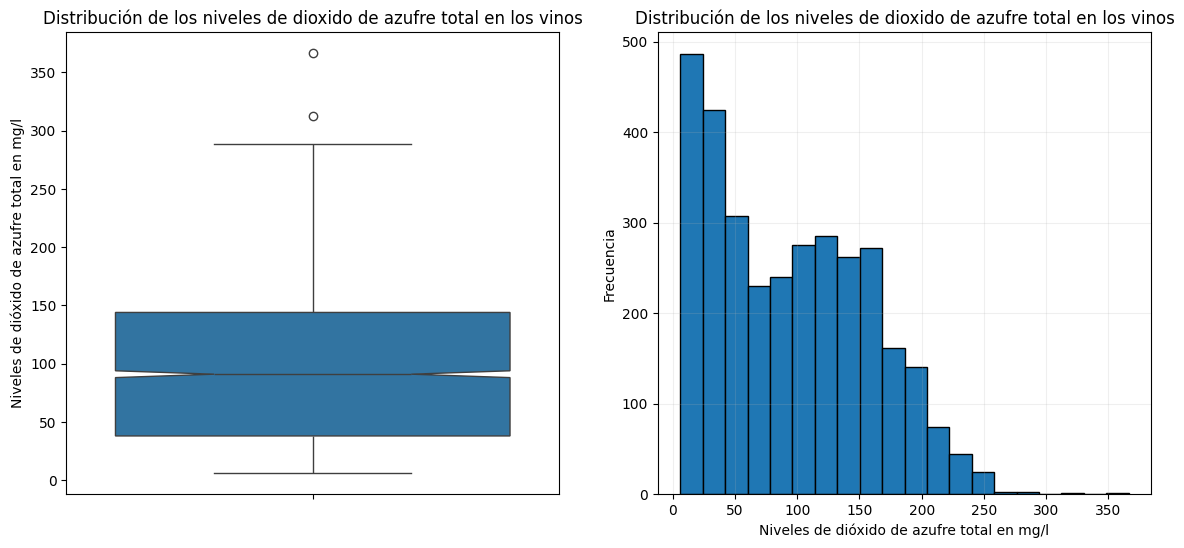

In [591]:
# Se crean dos gráficos: un box plot y un histograma
# Se establecen sus escalas
fig, (bplot, his) = plt.subplots(1, 2, figsize=(14, 6))

# BOX PLOT

# Lo mismo que antes
sns.boxplot(y="total sulfur dioxide", data=preprocessed_ds, notch=True, ax=bplot)
bplot.set_ylabel("Niveles de dióxido de azufre total en mg/l")
bplot.set_title("Distribución de los niveles de dioxido de azufre total en los vinos")

# HISTOGRAMA

# Lo mismo que antes
bins=20
his.hist(preprocessed_ds["total sulfur dioxide"], bins=bins, edgecolor="black")
his.set_xlabel("Niveles de dióxido de azufre total en mg/l")
his.set_ylabel("Frecuencia")
his.set_title("Distribución de los niveles de dioxido de azufre total en los vinos")
his.grid(alpha=0.2)
plt.show()

_D nuevo, planteamos lo mismo..._

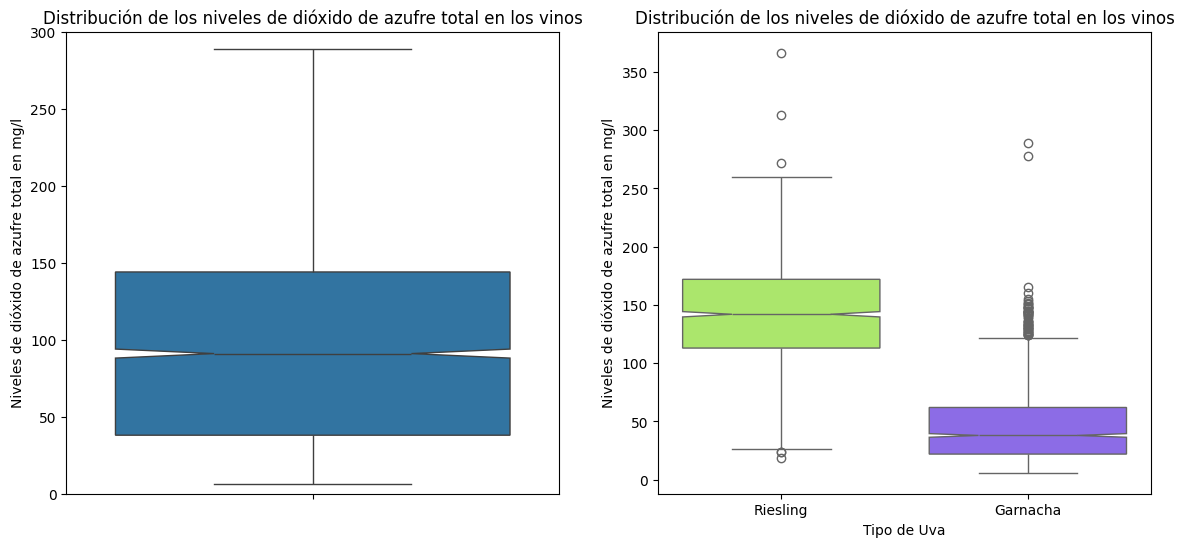

In [592]:
# Se crean dos gráficos: un box plot ampliado y un box plot de dos cajas
# Se establecen sus escalas
fig, (bplot1, bplot2) = plt.subplots(1, 2, figsize=(14, 6))

# BOX PLOT DE 1 CAJA

# Lo mismo que antes
sns.boxplot(y="total sulfur dioxide", data=preprocessed_ds, notch=True, ax=bplot1)
bplot1.set_ylabel("Niveles de dióxido de azufre total en mg/l")
bplot1.set_title("Distribución de los niveles de dióxido de azufre total en los vinos")
bplot1.set_ylim(0, 300)

# BOX PLOT DE 2 CAJAS

# Lo mismo que antes
colores = ['#ACFA58', '#8258FA']
sns.boxplot (
    x=preprocessed_ds['is_riesling'].replace({True : 'Riesling', False : 'Garnacha'}), 
    y=preprocessed_ds['total sulfur dioxide'],
    notch=True, 
    ax=bplot2,
    palette=colores,
    hue=preprocessed_ds['is_riesling'].replace({True : 'Riesling', False : 'Garnacha'}),
    legend=False
)
bplot2.set_xlabel("Tipo de Uva")
bplot2.set_ylabel("Niveles de dióxido de azufre total en mg/l")
bplot2.set_title("Distribución de los niveles de dióxido de azufre total en los vinos")

plt.show()

_Mirando el gráfico, parecieran haber diferencias significativas en los niveles de SO2 total según el tipo de uva, y la distribución general de SO2 total bimodal. Los outliers según el tipo de uva cambian respecto del original lo que tiene sentido si tenemos en cuenta que cada vino tiene sus propiedades_

Profundizamos en las correlaciones...

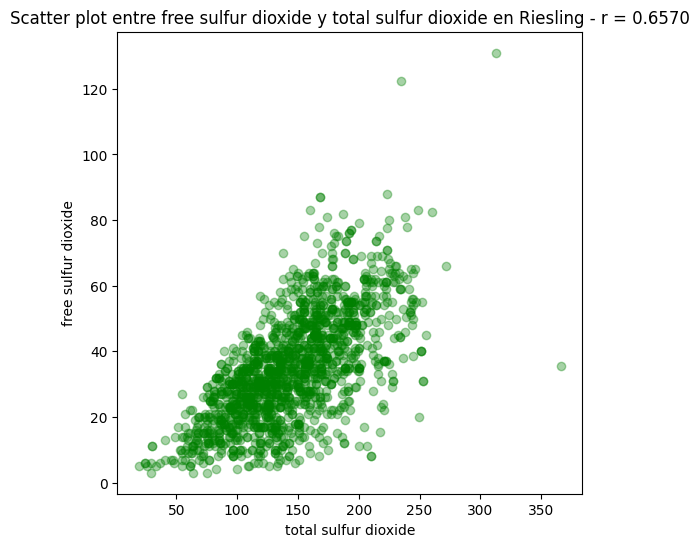

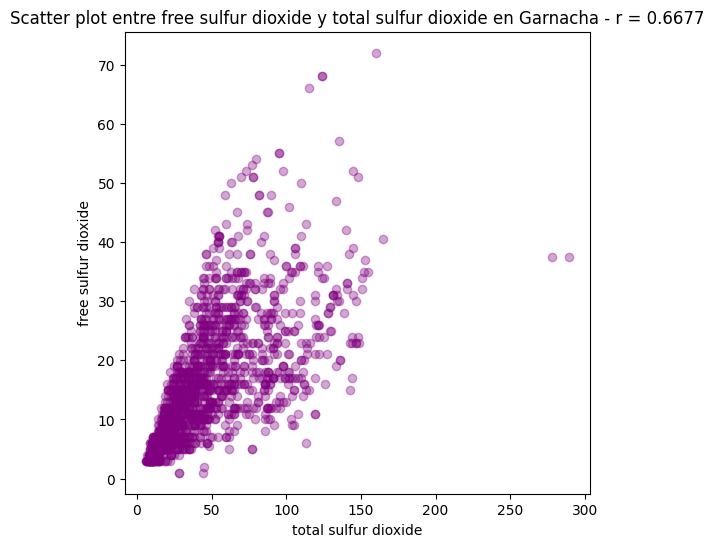

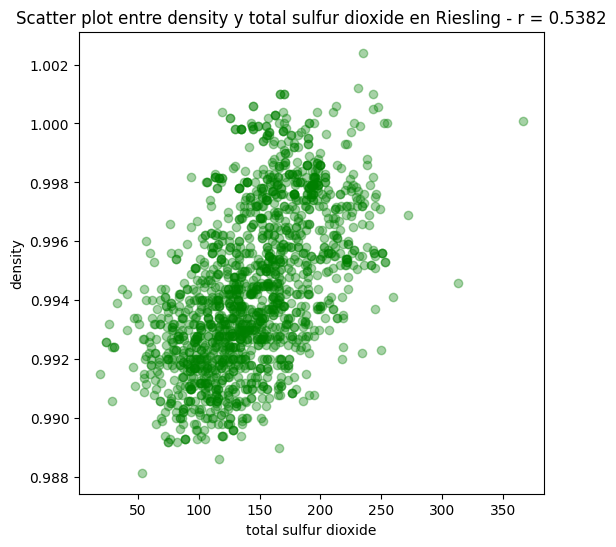

In [593]:
# Por cada columna de la matriz de correlación
for i, col in enumerate(correlations_matrix.columns):
  # Se extrae el valor de correlación
  correlation_r = correlations_matrix_riesling.loc["total sulfur dioxide", col]
  correlation_g = correlations_matrix_garnacha.loc["total sulfur dioxide", col]

  if col != "total sulfur dioxide" :
    if (correlation_r >= 0.5 or correlation_r <= -0.5) :
      # Se establece la escala del gráfico
      plt.figure(figsize=(6, 6))
      # Se crea el scatter plot para Riesling
      plt.scatter(riesling_data["total sulfur dioxide"], riesling_data[col], color="green", alpha=0.35)
      # Se agrega un titulo
      plt.title(f"Scatter plot entre {col} y total sulfur dioxide en Riesling - r = {correlation_r:.4f}")
      # Se agregan las etiquetas
      plt.xlabel("total sulfur dioxide")
      plt.ylabel(col)
      # Se muestra
      plt.show()
    if (correlation_g >= 0.5 or correlation_g <= -0.5) :
      # Se establece la escala del gráfico
      plt.figure(figsize=(6, 6))
      # Se establece el scatter plot para Garnacha
      plt.scatter(garnacha_data["total sulfur dioxide"], garnacha_data[col], color="purple", alpha=0.35)
      # Se agrega un titulo
      plt.title(f"Scatter plot entre {col} y total sulfur dioxide en Garnacha - r = {correlation_g:.4f}")
      # Se agregan las etiquetas
      plt.xlabel("total sulfur dioxide")
      plt.ylabel(col)
      # Se muestra
      plt.show()

_Pareciera haber linealidad. En el caso de total y free sulfur dioxide, se repite lo dicho._

### _DENSITY_

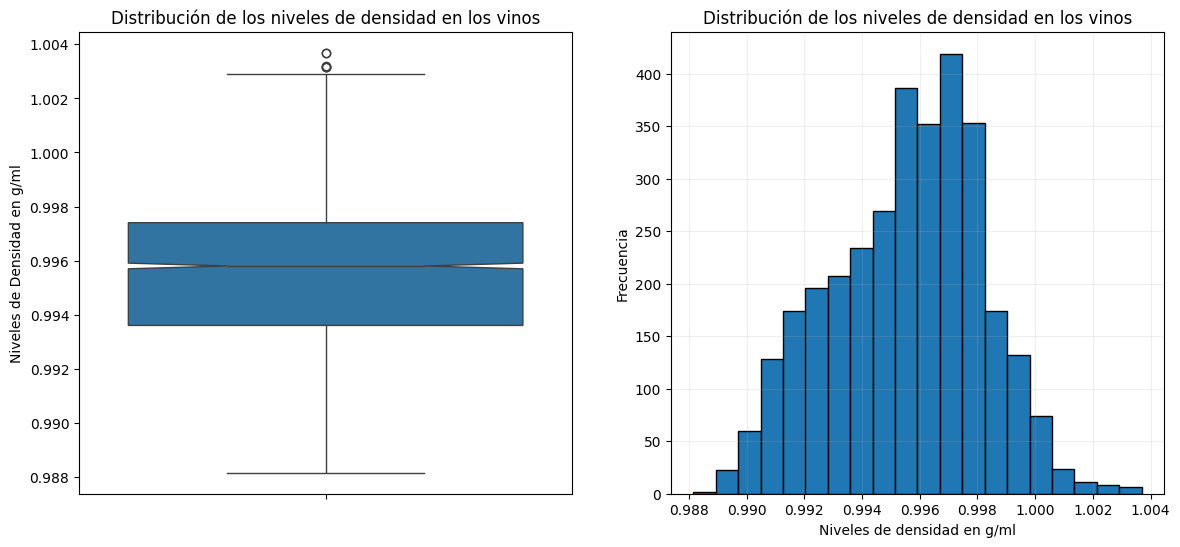

In [594]:
# Se crean dos gráficos: un box plot y un histograma
# Se establecen sus escalas
fig, (bplot, his) = plt.subplots(1, 2, figsize=(14, 6))

# BOX PLOT

# Lo mismo que antes
sns.boxplot(y="density", data=preprocessed_ds, notch=True, ax=bplot)
bplot.set_ylabel("Niveles de Densidad en g/ml")
bplot.set_title("Distribución de los niveles de densidad en los vinos")

# HISTOGRAMA

# Lo mismo que antes
bins=20
his.hist(preprocessed_ds["density"], bins=bins, edgecolor="black")
his.set_xlabel("Niveles de densidad en g/ml")
his.set_ylabel("Frecuencia")
his.set_title("Distribución de los niveles de densidad en los vinos")
his.grid(alpha=0.2)
plt.show()

_Vemos que la densidad no tiene muchos outliers y que el gráfico no se ve afectado por esto. También, parece ser una distribución con aires de normalidad, aunque mirando el histograma, hay un leve sesgo._

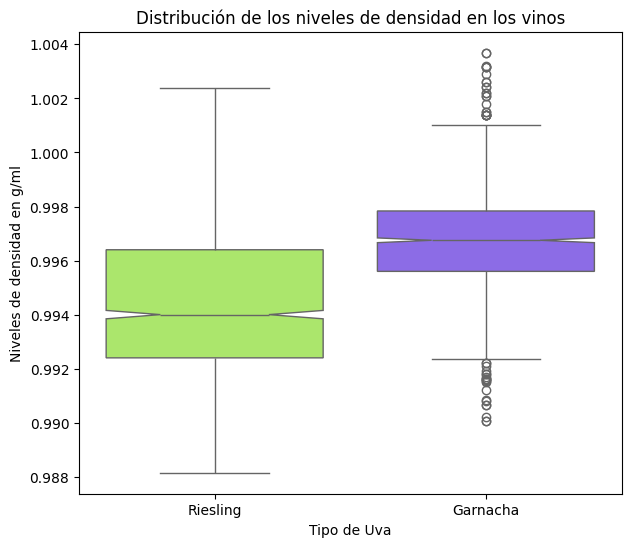

In [595]:
# BOX PLOT DE 2 CAJAS

plt.figure(figsize=(7, 6))

# Lo mismo que antes
colores = ['#ACFA58', '#8258FA']
sns.boxplot (
    x=preprocessed_ds['is_riesling'].replace({True : 'Riesling', False : 'Garnacha'}), 
    y=preprocessed_ds['density'],
    notch=True, 
    palette=colores,
    hue=preprocessed_ds['is_riesling'].replace({True : 'Riesling', False : 'Garnacha'}),
    legend=False
)
plt.xlabel("Tipo de Uva")
plt.ylabel("Niveles de densidad en g/ml")
plt.title("Distribución de los niveles de densidad en los vinos")

plt.show()

_Mirando el gráfico, parecieran haber diferencias significativas en los niveles de densidad según el tipo de uva. Los outliers según el tipo de uva cambian respecto del original lo que tiene sentido si tenemos en cuenta que cada vino tiene sus propiedades_

Profundizamos en las correlaciones...

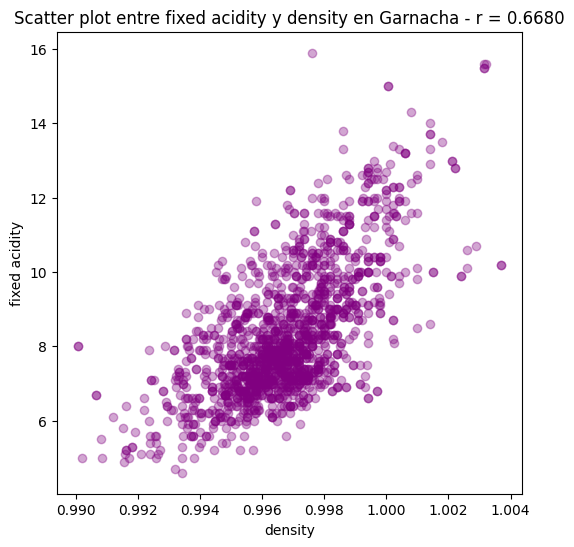

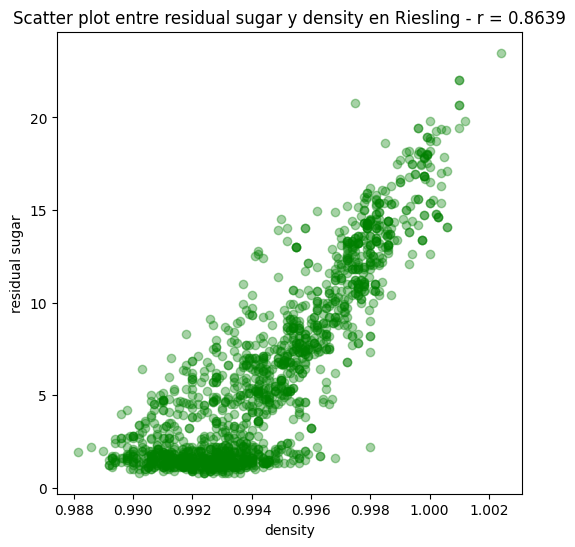

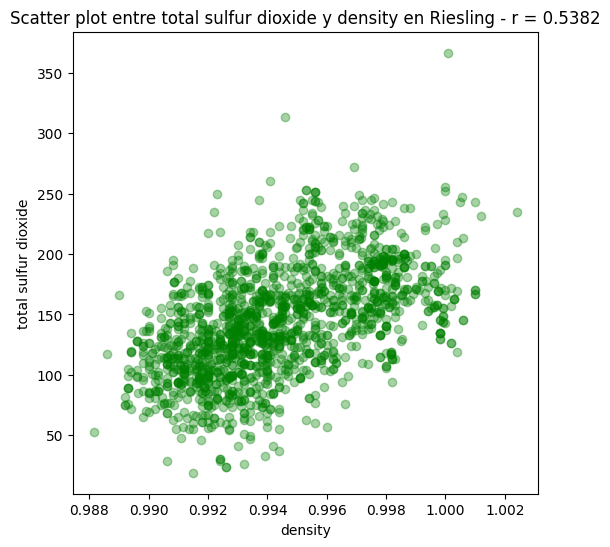

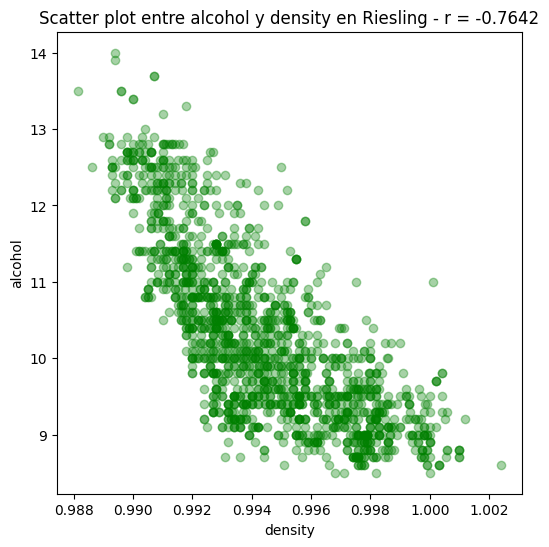

In [596]:
# Por cada columna de la matriz de correlación
for i, col in enumerate(correlations_matrix.columns):
  # Se extrae el valor de correlación
  correlation_r = correlations_matrix_riesling.loc["density", col]
  correlation_g = correlations_matrix_garnacha.loc["density", col]

  if col != "density" :
    if (correlation_r >= 0.5 or correlation_r <= -0.5) :
      # Se establece la escala del gráfico
      plt.figure(figsize=(6, 6))
      # Se crea el scatter plot para Riesling
      plt.scatter(riesling_data["density"], riesling_data[col], color="green", alpha=0.35)
      # Se agrega un titulo
      plt.title(f"Scatter plot entre {col} y density en Riesling - r = {correlation_r:.4f}")
      # Se agregan las etiquetas
      plt.xlabel("density")
      plt.ylabel(col)
      # Se muestra
      plt.show()
    if (correlation_g >= 0.5 or correlation_g <= -0.5) :
      # Se establece la escala del gráfico
      plt.figure(figsize=(6, 6))
      # Se establece el scatter plot para Garnacha
      plt.scatter(garnacha_data["density"], garnacha_data[col], color="purple", alpha=0.35)
      # Se agrega un titulo
      plt.title(f"Scatter plot entre {col} y density en Garnacha - r = {correlation_g:.4f}")
      # Se agregan las etiquetas
      plt.xlabel("density")
      plt.ylabel(col)
      # Se muestra
      plt.show()

_Aparte de lo ya visto, hay cierta linealidad con alcohol. La variación de densidad para cada valor alcohol parece cambiar para porcentajes más bajos de este._

### _pH_

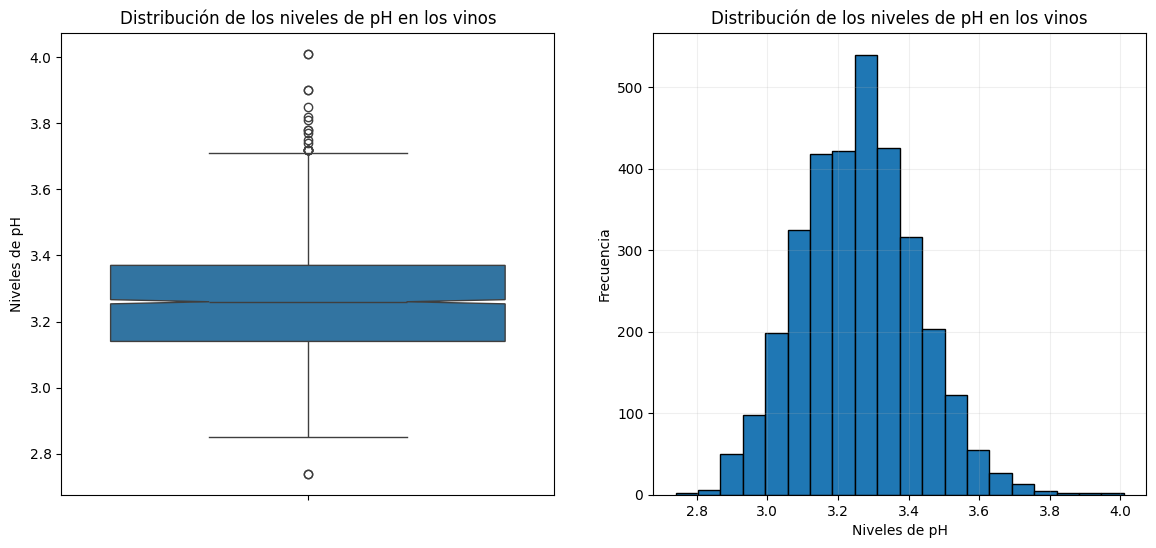

In [597]:
# Se crean dos gráficos: un box plot y un histograma
# Se establecen sus escalas
fig, (bplot, his) = plt.subplots(1, 2, figsize=(14, 6))

# BOX PLOT

# Lo mismo que antes
sns.boxplot(y="pH", data=preprocessed_ds, notch=True, ax=bplot)
bplot.set_ylabel("Niveles de pH")
bplot.set_title("Distribución de los niveles de pH en los vinos")

# HISTOGRAMA

# Lo mismo que antes
bins=20
his.hist(preprocessed_ds["pH"], bins=bins, edgecolor="black")
his.set_xlabel("Niveles de pH")
his.set_ylabel("Frecuencia")
his.set_title("Distribución de los niveles de pH en los vinos")
his.grid(alpha=0.2)
plt.show()

_Vemos que la densidad no tiene muchos outliers y que el gráfico no se ve afectado por esto. También, parece ser una distribución con aires de normalidad._

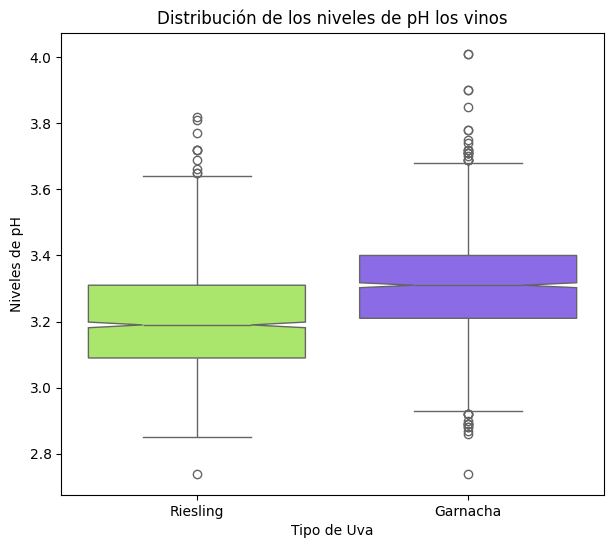

In [598]:
# BOX PLOT DE 2 CAJAS

plt.figure(figsize=(7, 6))

# Lo mismo que antes
colores = ['#ACFA58', '#8258FA']
sns.boxplot (
    x=preprocessed_ds['is_riesling'].replace({True : 'Riesling', False : 'Garnacha'}), 
    y=preprocessed_ds['pH'],
    notch=True, 
    palette=colores,
    hue=preprocessed_ds['is_riesling'].replace({True : 'Riesling', False : 'Garnacha'}),
    legend=False
)
plt.xlabel("Tipo de Uva")
plt.ylabel("Niveles de pH")
plt.title("Distribución de los niveles de pH los vinos")

plt.show()

_Mirando el gráfico, parecieran haber diferencias significativas en los niveles de densidad según el tipo de uva. Los outliers no cambian tanto respecto de los valores altos de pH, lo que indica que es raro que un vino no sea ácido en general._

Profundizamos en las correlaciones...

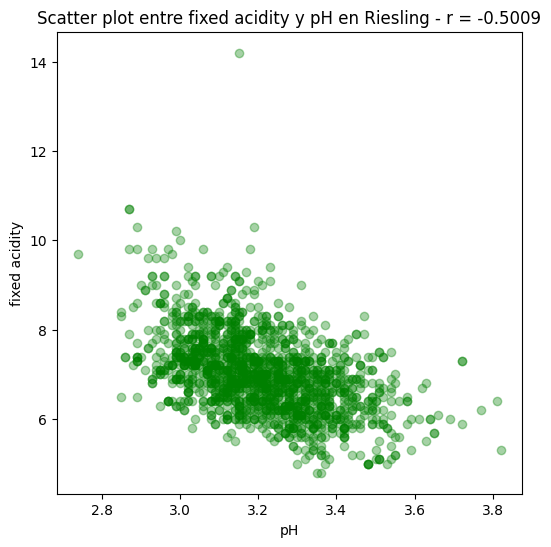

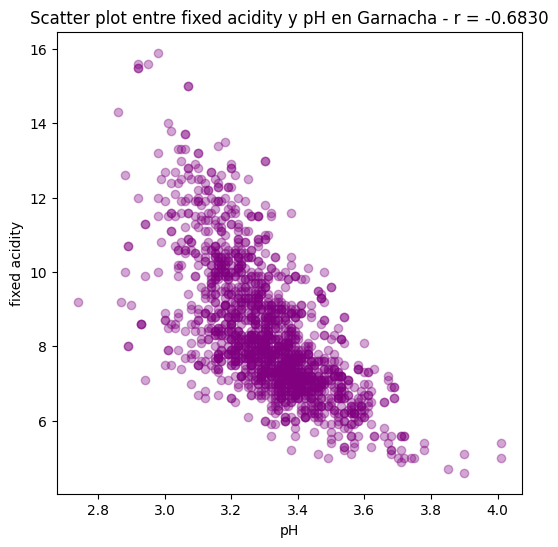

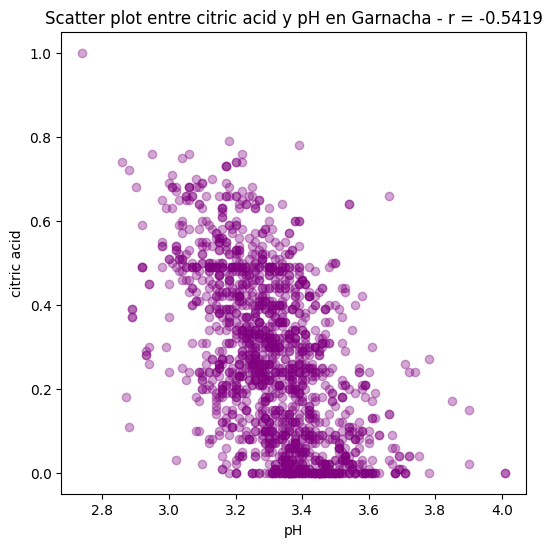

In [599]:
# Por cada columna de la matriz de correlación
for i, col in enumerate(correlations_matrix.columns):
  # Se extrae el valor de correlación
  correlation_r = correlations_matrix_riesling.loc["pH", col]
  correlation_g = correlations_matrix_garnacha.loc["pH", col]

  if col != "pH" :
    if (correlation_r >= 0.5 or correlation_r <= -0.5) :
      # Se establece la escala del gráfico
      plt.figure(figsize=(6, 6))
      # Se crea el scatter plot para Riesling
      plt.scatter(riesling_data["pH"], riesling_data[col], color="green", alpha=0.35)
      # Se agrega un titulo
      plt.title(f"Scatter plot entre {col} y pH en Riesling - r = {correlation_r:.4f}")
      # Se agregan las etiquetas
      plt.xlabel("pH")
      plt.ylabel(col)
      # Se muestra
      plt.show()
    if (correlation_g >= 0.5 or correlation_g <= -0.5) :
      # Se establece la escala del gráfico
      plt.figure(figsize=(6, 6))
      # Se establece el scatter plot para Garnacha
      plt.scatter(garnacha_data["pH"], garnacha_data[col], color="purple", alpha=0.35)
      # Se agrega un titulo
      plt.title(f"Scatter plot entre {col} y pH en Garnacha - r = {correlation_g:.4f}")
      # Se agregan las etiquetas
      plt.xlabel("pH")
      plt.ylabel(col)
      # Se muestra
      plt.show()

_Quizá se hace más evidente que la linealidad con fixed acidity es casi inexistente_

### _SULPHATES_

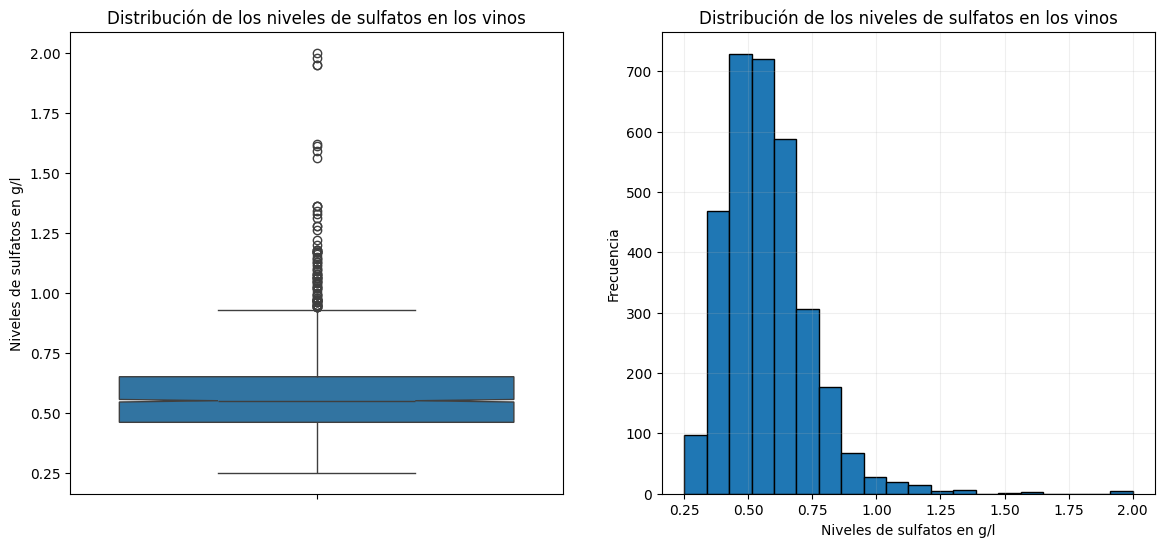

In [600]:
# Se crean dos gráficos: un box plot y un histograma
# Se establecen sus escalas
fig, (bplot, his) = plt.subplots(1, 2, figsize=(14, 6))

# BOX PLOT

# Lo mismo que antes
sns.boxplot(y="sulphates", data=preprocessed_ds, notch=True, ax=bplot)
bplot.set_ylabel("Niveles de sulfatos en g/l")
bplot.set_title("Distribución de los niveles de sulfatos en los vinos")

# HISTOGRAMA

# Lo mismo que antes
bins=20
his.hist(preprocessed_ds["sulphates"], bins=bins, edgecolor="black")
his.set_xlabel("Niveles de sulfatos en g/l")
his.set_ylabel("Frecuencia")
his.set_title("Distribución de los niveles de sulfatos en los vinos")
his.grid(alpha=0.2)
plt.show()

De nuevo, planteamos lo mismo...

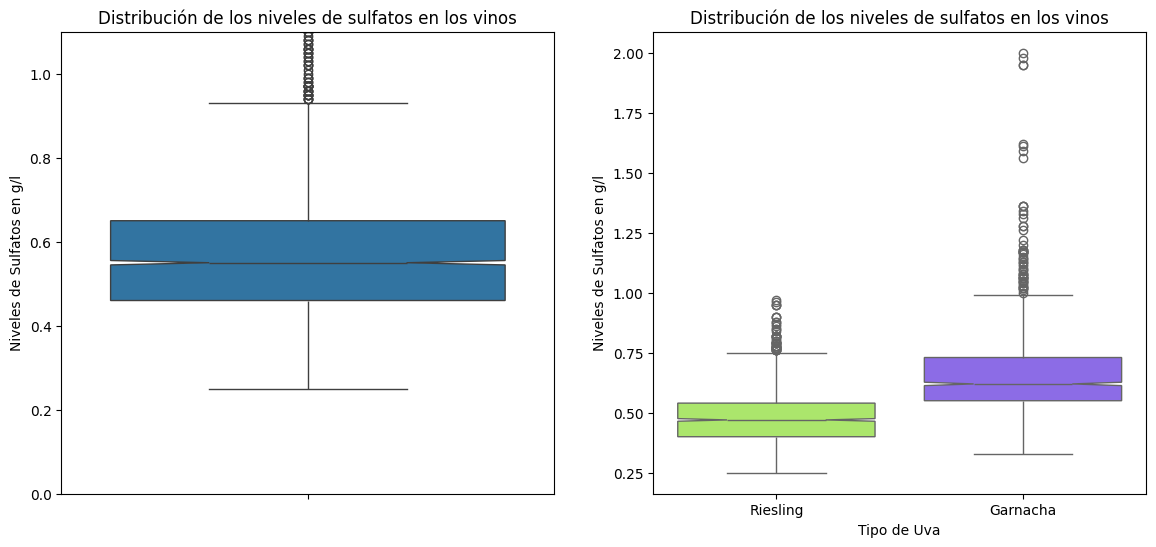

In [601]:
# Se crean dos gráficos: un box plot ampliado y un box plot de dos cajas
# Se establecen sus escalas
fig, (bplot1, bplot2) = plt.subplots(1, 2, figsize=(14, 6))

# BOX PLOT DE 1 CAJA

# Lo mismo que antes
sns.boxplot(y="sulphates", data=preprocessed_ds, notch=True, ax=bplot1)
bplot1.set_ylabel("Niveles de Sulfatos en g/l")
bplot1.set_title("Distribución de los niveles de sulfatos en los vinos")
bplot1.set_ylim(0, 1.1)

# BOX PLOT DE 2 CAJAS

# Lo mismo que antes
colores = ['#ACFA58', '#8258FA']
sns.boxplot (
    x=preprocessed_ds['is_riesling'].replace({True : 'Riesling', False : 'Garnacha'}), 
    y=preprocessed_ds['sulphates'],
    notch=True, 
    ax=bplot2,
    palette=colores,
    hue=preprocessed_ds['is_riesling'].replace({True : 'Riesling', False : 'Garnacha'}),
    legend=False
)
bplot2.set_xlabel("Tipo de Uva")
bplot2.set_ylabel("Niveles de Sulfatos en g/l")
bplot2.set_title("Distribución de los niveles de sulfatos en los vinos")

plt.show()

_Mirando el gráfico, parecieran haber diferencias significativas en los niveles de sulfatos según el tipo de uva y la distribución general de sulfatos sesgada. Los outliers según el tipo de uva cambian respecto del original lo que tiene sentido si tenemos en cuenta que cada vino tiene sus propiedades_

### _ALCOHOL_

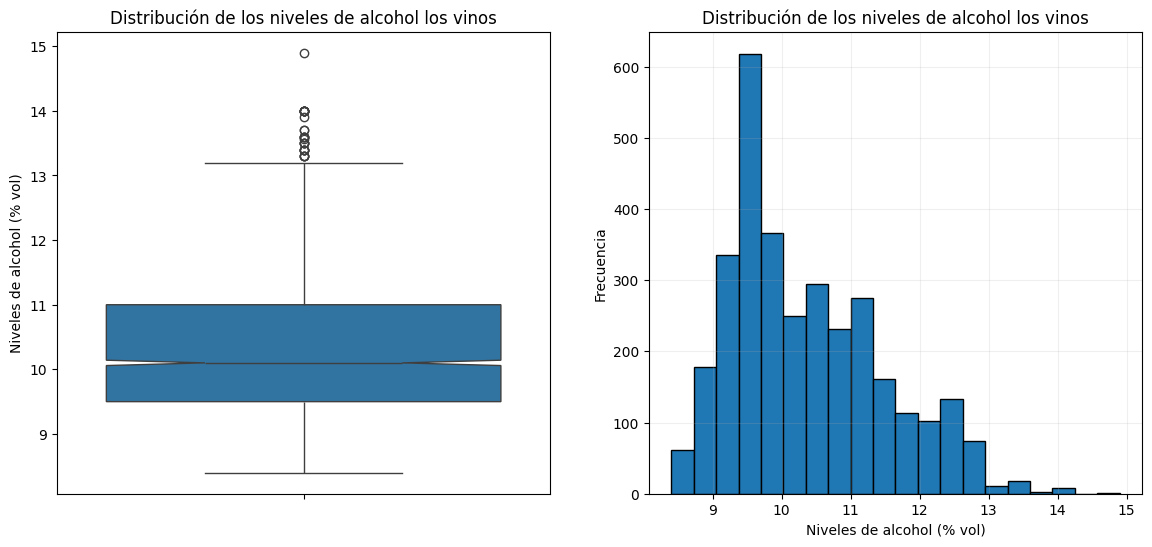

In [602]:
# Se crean dos gráficos: un box plot y un histograma
# Se establecen sus escalas
fig, (bplot, his) = plt.subplots(1, 2, figsize=(14, 6))

# BOX PLOT

# Lo mismo que antes
sns.boxplot(y="alcohol", data=preprocessed_ds, notch=True, ax=bplot)
bplot.set_ylabel("Niveles de alcohol (% vol)")
bplot.set_title("Distribución de los niveles de alcohol los vinos")

# HISTOGRAMA

# Lo mismo que antes
bins=20
his.hist(preprocessed_ds["alcohol"], bins=bins, edgecolor="black")
his.set_xlabel("Niveles de alcohol (% vol)")
his.set_ylabel("Frecuencia")
his.set_title("Distribución de los niveles de alcohol los vinos")
his.grid(alpha=0.2)
plt.show()

_De nuevo, planteamos lo mismo..._

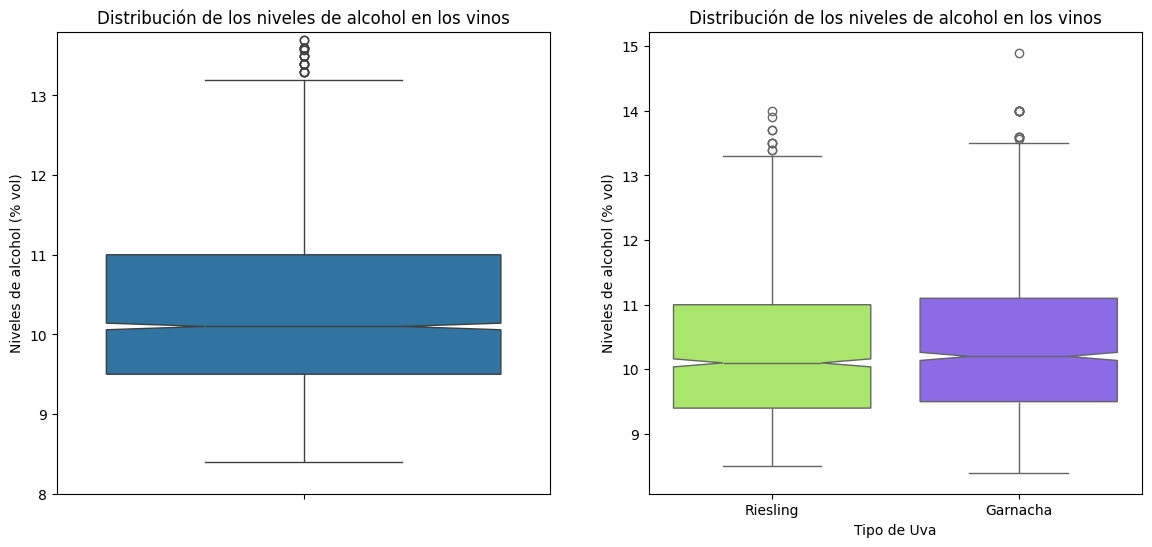

In [603]:
# Se crean dos gráficos: un box plot ampliado y un box plot de dos cajas
# Se establecen sus escalas
fig, (bplot1, bplot2) = plt.subplots(1, 2, figsize=(14, 6))

# BOX PLOT DE 1 CAJA

# Lo mismo que antes
sns.boxplot(y="alcohol", data=preprocessed_ds, notch=True, ax=bplot1)
bplot1.set_ylabel("Niveles de alcohol (% vol)")
bplot1.set_title("Distribución de los niveles de alcohol en los vinos")
bplot1.set_ylim(8, 13.8)

# BOX PLOT DE 2 CAJAS

# Lo mismo que antes
colores = ['#ACFA58', '#8258FA']
sns.boxplot (
    x=preprocessed_ds['is_riesling'].replace({True : 'Riesling', False : 'Garnacha'}), 
    y=preprocessed_ds['alcohol'],
    notch=True, 
    ax=bplot2,
    palette=colores,
    hue=preprocessed_ds['is_riesling'].replace({True : 'Riesling', False : 'Garnacha'}),
    legend=False
)
bplot2.set_xlabel("Tipo de Uva")
bplot2.set_ylabel("Niveles de alcohol (% vol)")
bplot2.set_title("Distribución de los niveles de alcohol en los vinos")

plt.show()

_Mirando el gráfico, no parecieran haber diferencias significativas en los niveles de alcohol según el tipo de uva y la distribución del alchol en general parece sesgada. Los outliers según el tipo de uva no cambian respecto del original. Esto se debe a que el grado del alcohol en los vinos es similar sin importar si es Riesling o Garnacha_

Ya fueron analizadas todas las correlaciones.

### _QUALITY_

Podemos ver cuáles son las frecuencias más comunes de _Quality_ según el tipo de uva para ver la distribución de la calidad en las muestras.

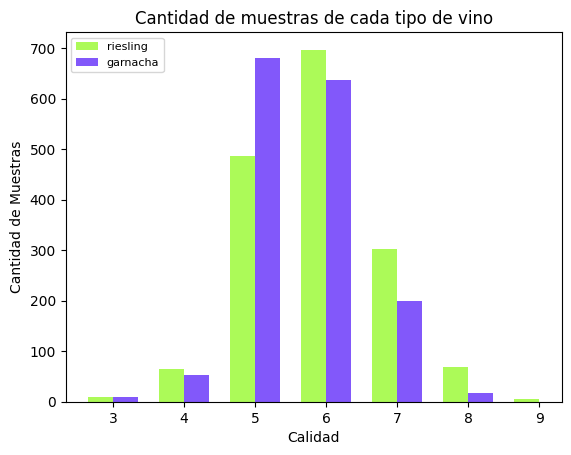

In [604]:
# Se extraen los datos de tipo de uva. Se agrupa por calidad y se cuenta el número de muestras. 
# Se deja el índice como columna
group_riesling_data = preprocessed_ds[preprocessed_ds["is_riesling"] == True].groupby("quality").count().reset_index()
group_garnacha_data = preprocessed_ds[preprocessed_ds["is_riesling"] == False].groupby("quality").count().reset_index()

# Se hace un ensamble según la calidad
merged_data = group_riesling_data.merge(group_garnacha_data, on="quality", how="outer", suffixes=('_riesling', '_garnacha'))

# Los diferentes valores de calidad se dejan en x
x = merged_data["quality"]

# Se establece un ancho de barra
width = 0.35

# Se crean las barras para Riesling y Garnacha
plt.bar([i - width/2 for i in range(len(x))], merged_data["citric acid_riesling"], width, label='riesling', color="#ACFA58")
plt.bar([i + width/2 for i in range(len(x))], merged_data["citric acid_garnacha"], width, label='garnacha', color="#8258FA")

# Se agregan etiquetas a los ejes
plt.xlabel("Calidad")
plt.ylabel("Cantidad de Muestras")

# Se agrega un titulo al gráfico
plt.title("Cantidad de muestras de cada tipo de vino")
plt.xticks(range(len(x)), merged_data["quality"]) 

# Se agrega una leyenda
plt.legend()

# Se agrega una leyenda
plt.legend(fontsize=8)

# Se muestra el grafico
plt.show()

 _Mirando el gráfico, vemos que no se puede decir mucho sobre si hay un tipo de uva que destaque en terminos de calidad. Podríamos comparar las medias de cada grupo para ver cuál es la candidata. De todas formas, esto requiere de un test para poder hacer una afirmación. Lo que sí sabemos, por la prueba de Chi cuadrado es que la cantidad de puntajes altos obtenidos en las uvas Riesling son significativamente superiores a los de Garnacha, haciendonos pensar que existe un factor que explica esta diferencia._

In [605]:
print("La media de calidad para la uva Garnacha es: ", garnacha_data['quality'].mean())
print("La media de calidad para la uva Riesling es: ", riesling_data['quality'].mean())

La media de calidad para la uva Garnacha es:  5.6360225140712945
La media de calidad para la uva Riesling es:  5.881812614819351


Podemos, tambien, hacer un analisis multivariado, ver como se agrupan las variables y de esta manera determinar si hay grupos reales que se diferencien en calidad. Con esto, se dejaría en evidencia que hay una clara composición química o tendencia que determina la calidad de un vino. Analizamos cada uva por separado. 

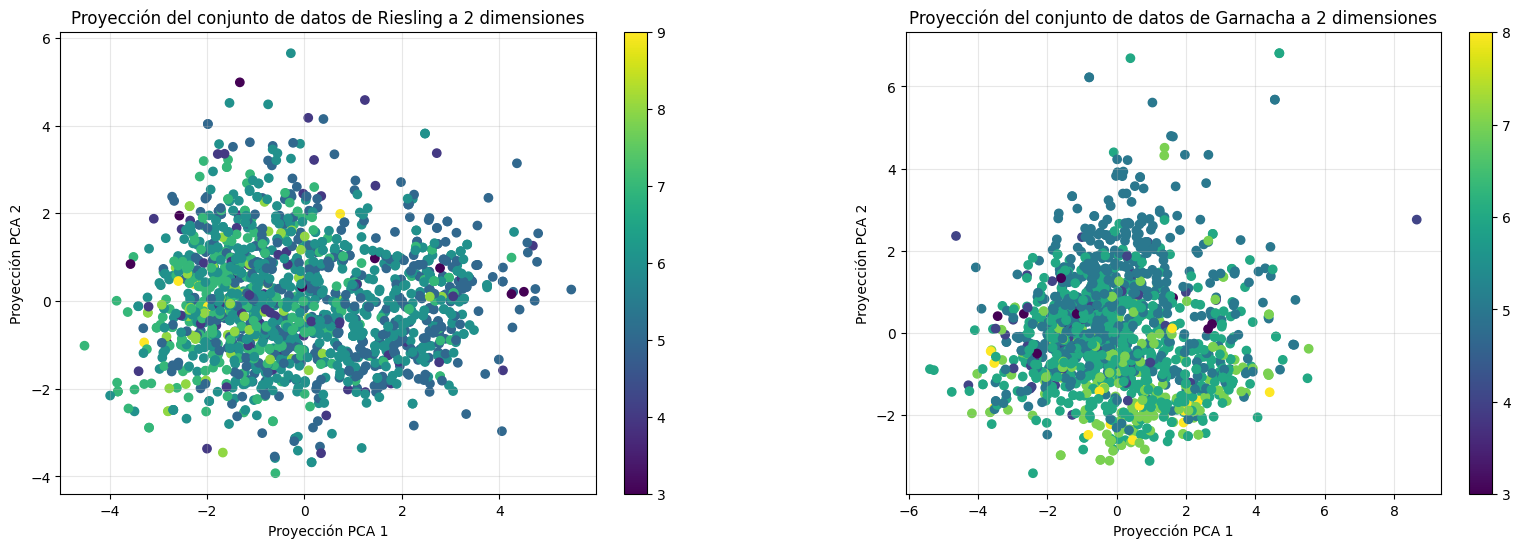

In [606]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Se estandarizan riesling_data y garnacha_data
scaler = StandardScaler()
riesling_data_scaled = scaler.fit_transform(riesling_data.drop(["is_riesling", "quality"], axis=1))
garnacha_data_scaled = scaler.fit_transform(garnacha_data.drop(["is_riesling", "quality"], axis=1))

# Se crean objetos de tipo PCA para reducir dimensionalidad a 2 componentes
pca1 = PCA(n_components=2)
pca2 = PCA(n_components=2)

# Se aplica PCA para ambos datasets
riesling_data_pca = pca1.fit_transform(riesling_data_scaled)
garnacha_data_pca = pca2.fit_transform(garnacha_data_scaled)

# Se crean los subplots
fig, (pcar, pcag) = plt.subplots(1, 2, figsize=(20, 6))

# Se crean los scatter
scatter_riesling = pcar.scatter(riesling_data_pca[:,0], riesling_data_pca[:,1], c=riesling_data['quality'], cmap='viridis')
scatter_garnacha = pcag.scatter(garnacha_data_pca[:,0], garnacha_data_pca[:,1], c=garnacha_data['quality'], cmap='viridis')

# Se ajusta una grilla
pcar.grid(True, alpha=0.3)
pcag.grid(True, alpha=0.3)

# Se agregan etiquetas
pcar.set_xlabel('Proyección PCA 1')
pcar.set_ylabel('Proyección PCA 2')
pcag.set_xlabel('Proyección PCA 1')
pcag.set_ylabel('Proyección PCA 2')

# Se agrega titulo
pcar.set_title('Proyección del conjunto de datos de Riesling a 2 dimensiones')
pcag.set_title('Proyección del conjunto de datos de Garnacha a 2 dimensiones')

# Se agrega una colorbar
cbar = fig.colorbar(scatter_riesling, ax=pcar, orientation='vertical', fraction=0.2, pad=0.04)
cbar = fig.colorbar(scatter_garnacha, ax=pcag, orientation='vertical', fraction=0.2, pad=0.04)

# Se muestra
plt.show()

_Vemos en primera instancia que los datos no estan agrupados segun la calidad. En el caso de Garnacha pareciera haber una mejora de calidad cuando disminuye el PCA 2 (pero muy apenas). Nada concluyente_

Buscamos cual es el porcentaje de varianza explicada, para entender la significancia de los gráficos anteriores

In [607]:
print('Varianza explicada para el PCA de la uva Riesling: ', pca1.explained_variance_ratio_)
print('Varianza explicada para el PCA de la uva Garnacha: ', pca2.explained_variance_ratio_)

Varianza explicada para el PCA de la uva Riesling:  [0.30223487 0.15976171]
Varianza explicada para el PCA de la uva Garnacha:  [0.28173956 0.17508173]


_Dado que los valores de varianza explicada son muy bajos, no es posible confiar en la información que vemos en las gráficas._

Buscamos cuál sería el número de componentes que expliquen más del 70% de la varianza, utilizando el "Elbow Plot"

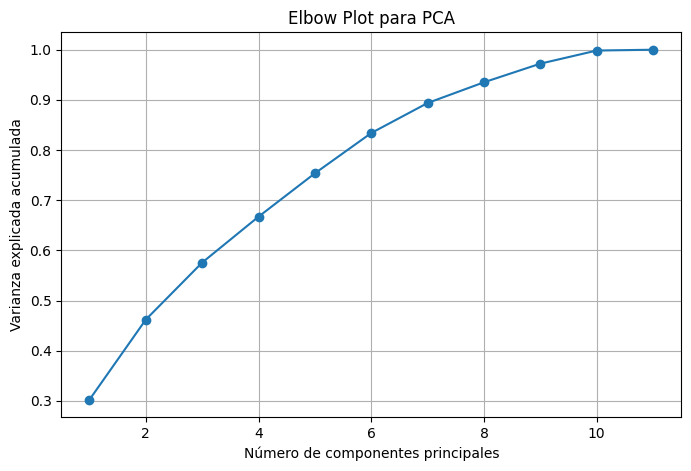

In [608]:
# Se crean objetos PCA sin numero de componentes
pcar_2 = PCA()
pcag_2 = PCA()

# Se aplica el PCA para ambos datasets
pcar_2.fit(riesling_data_scaled)
pcag_2.fit(garnacha_data_scaled)

# Se obtiene la frecuencia acumulada por cada varianza explicada
varianza_explicada_r = np.cumsum(pcar_2.explained_variance_ratio_)
varianza_explicada_g = np.cumsum(pcag_2.explained_variance_ratio_)

# Se crea el gráfico
plt.figure(figsize=(8, 5))
# Se crea un gráfico de línea
plt.plot(range(1, len(varianza_explicada_r) + 1), varianza_explicada_r, marker='o', linestyle='-')
# Se agregan etiquetas
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
# Se agrega un titulo
plt.title('Elbow Plot para PCA')
# Se agrega una grilla
plt.grid(True)
# Se muestra
plt.show()

_Mirando el gráfico, observamos que se requieren un número muy grande de componentes. Optamos por otro método._

Aplicamos t-SNE para poder visualizar los datos, sabiendo que es capaz de detectar relaciones no lineales.

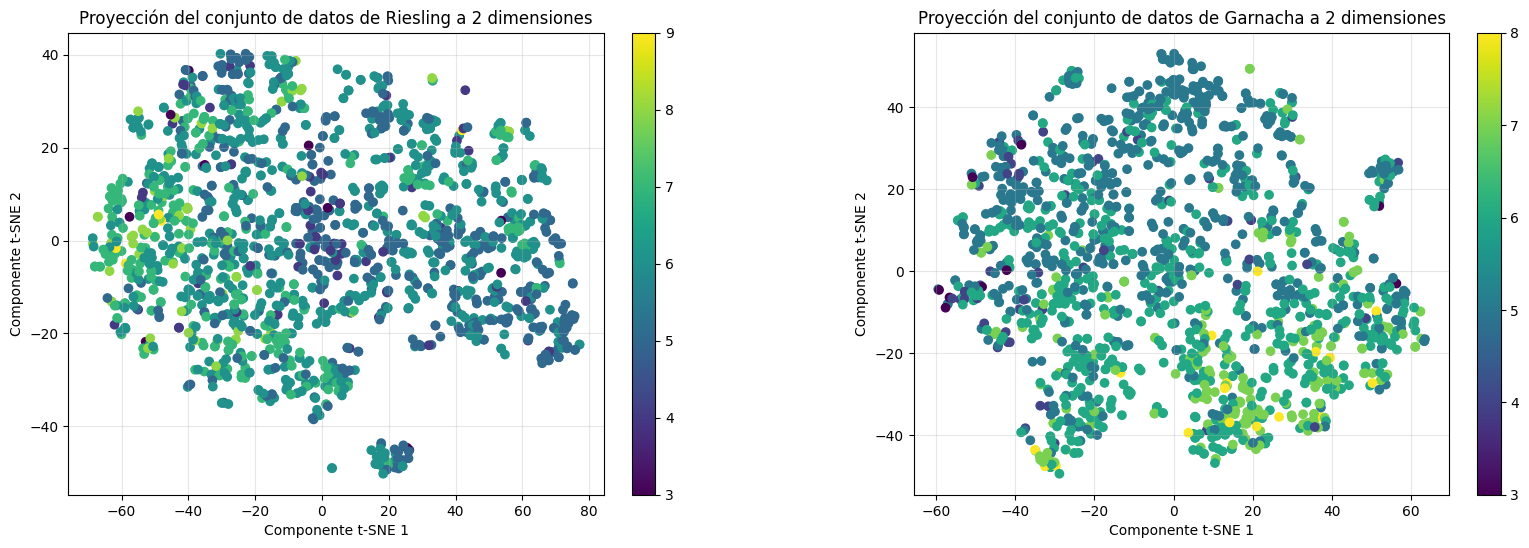

In [609]:
from sklearn.manifold import TSNE

# Se crean objetos de tipo t-SNE para reducir dimensionalidad a 2 componentes
riesling_tsne = TSNE(n_components=2, random_state=5).fit_transform(riesling_data_scaled)
garnacha_tsne = TSNE(n_components=2, random_state=5).fit_transform(garnacha_data_scaled)

# Se reliza el mismo procedimiento que antes
fig, (sner, sneg) = plt.subplots(1, 2, figsize=(20, 6))

scatter_riesling = sner.scatter(riesling_tsne[:,0], riesling_tsne[:,1], c=riesling_data['quality'], cmap='viridis')
scatter_garnacha = sneg.scatter(garnacha_tsne[:,0], garnacha_tsne[:,1], c=garnacha_data['quality'], cmap='viridis')

sner.grid(True, alpha=0.3)
sneg.grid(True, alpha=0.3)

sner.set_xlabel('Componente t-SNE 1')
sner.set_ylabel('Componente t-SNE 2')
sneg.set_xlabel('Componente t-SNE 1')
sneg.set_ylabel('Componente t-SNE 2')

sner.set_title('Proyección del conjunto de datos de Riesling a 2 dimensiones')
sneg.set_title('Proyección del conjunto de datos de Garnacha a 2 dimensiones')

cbar = fig.colorbar(scatter_riesling, ax=sner, orientation='vertical', fraction=0.2, pad=0.04)
cbar = fig.colorbar(scatter_garnacha, ax=sneg, orientation='vertical', fraction=0.2, pad=0.04)

_Viendo los gráficos, podemos observar que la calidad de un vino está determinada en cierta medida por las componentes químicas del mismo (más que nada en el caso de Garnacha). No se ve un patrón exacto, pero de todas formas parece existir alguno._

Probamos UMAP como otra alternativa para ver si encontramos algo distinto. Al saber que hay correlaciones y UMAP encuentra principalmente relaciones complejas, puede que no sea la mejor alternativa.

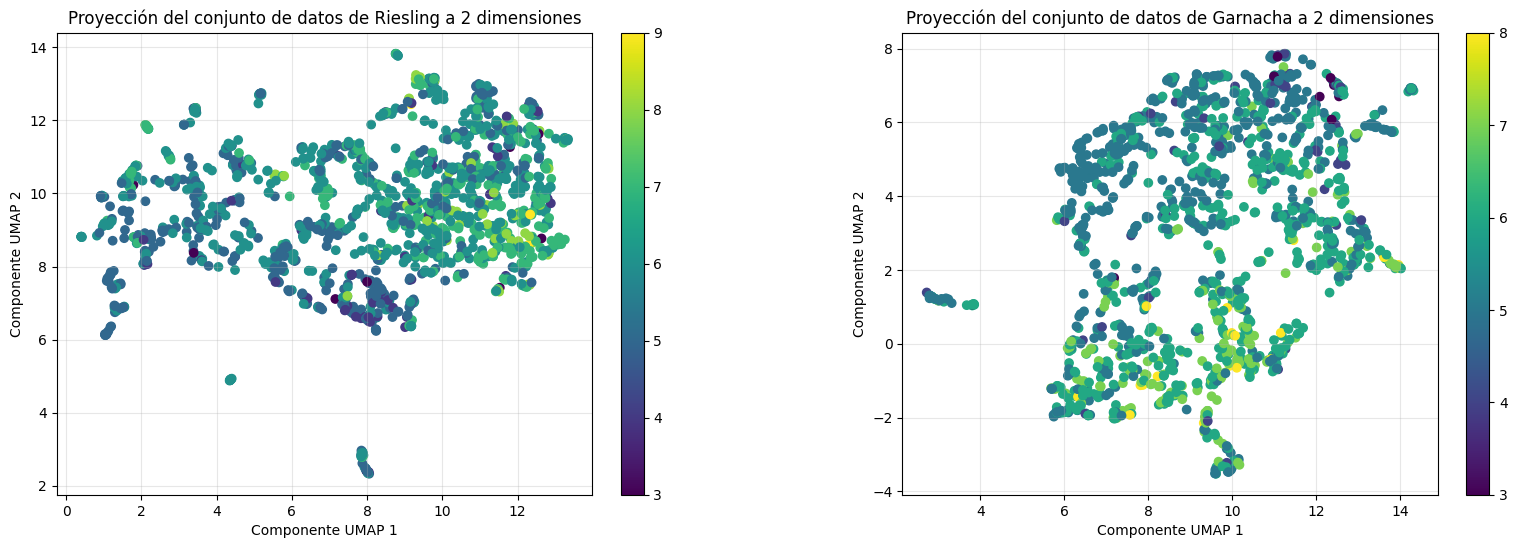

In [610]:
import umap

# Se crean objetos de tipo UMAP para reducir dimensionalidad a 2 componentes
riesling_umap = umap.UMAP(n_components=2).fit_transform(riesling_data_scaled)
garnacha_umap = umap.UMAP(n_components=2).fit_transform(garnacha_data_scaled)

# Se reliza el mismo procedimiento que antes
fig, (umapr, umapg) = plt.subplots(1, 2, figsize=(20, 6))

scatter_riesling = umapr.scatter(riesling_umap[:,0], riesling_umap[:,1], c=riesling_data['quality'], cmap='viridis')
scatter_garnacha = umapg.scatter(garnacha_umap[:,0], garnacha_umap[:,1], c=garnacha_data['quality'], cmap='viridis')

umapr.grid(True, alpha=0.3)
umapg.grid(True, alpha=0.3)

umapr.set_xlabel('Componente UMAP 1')
umapr.set_ylabel('Componente UMAP 2')
umapg.set_xlabel('Componente UMAP 1')
umapg.set_ylabel('Componente UMAP 2')

umapr.set_title('Proyección del conjunto de datos de Riesling a 2 dimensiones')
umapg.set_title('Proyección del conjunto de datos de Garnacha a 2 dimensiones')

cbar = fig.colorbar(scatter_riesling, ax=umapr, orientation='vertical', fraction=0.2, pad=0.04)
cbar = fig.colorbar(scatter_garnacha, ax=umapg, orientation='vertical', fraction=0.2, pad=0.04)

_De nuevo, algo parece haber. Quizá haya variables que casi no afecten en nada al resultado de un vino y que provocan la dispersión._

Una idea que fue encontrada durante la exploración del dominio fue la de que cantidades altas de ácido cítrico en los vinos se traducían en vinos de baja calidad (cercanas a 1 g/l). Podemos crear un gráfico que por cada tipo de uva y puntaje de calidad, se muestren las medias en los niveles de ácido cítrico. De esta manera, nos hacemos una idea de lo que está pasando.

### _PRIMERAS HIPÓTESIS_

A modo general, podemos crear gráficos Box Plot, para ir viendo si hay diferencias significativas entre las medias de las variables, según el grupo de calidad. Podemos agrupar los vinos según calidad y comparar las medias de cada población. Podemos crear 3 grupos: buena [7, 10], mediana [5, 6] y baja calidad[1, 4].  

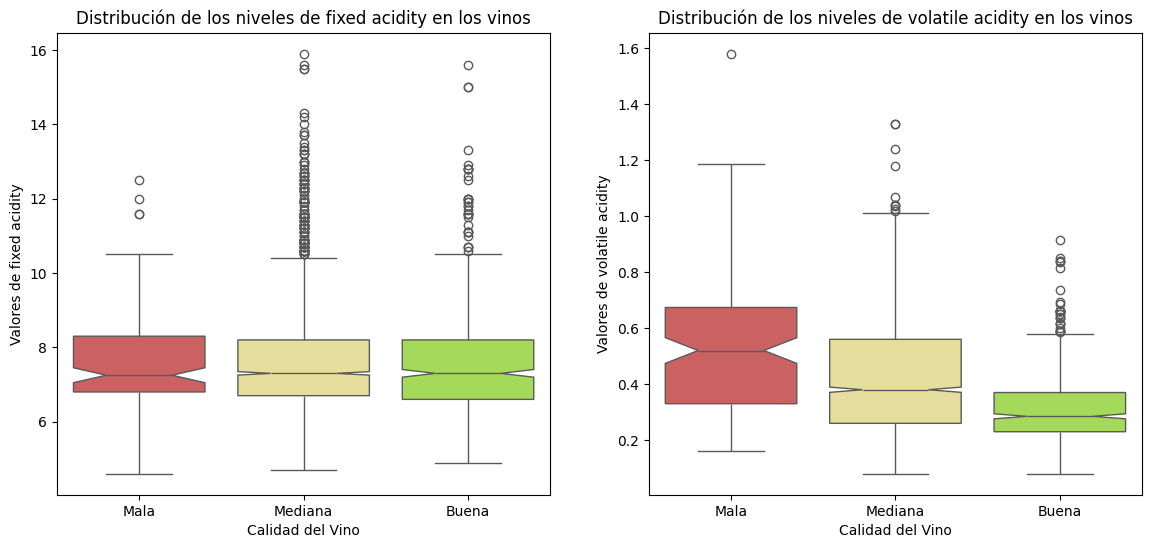

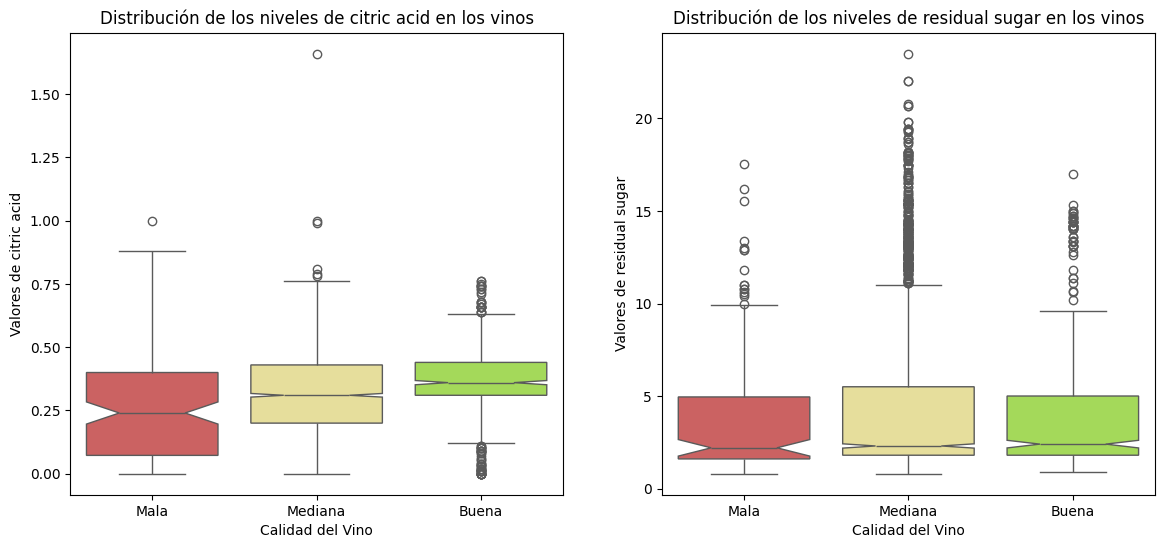

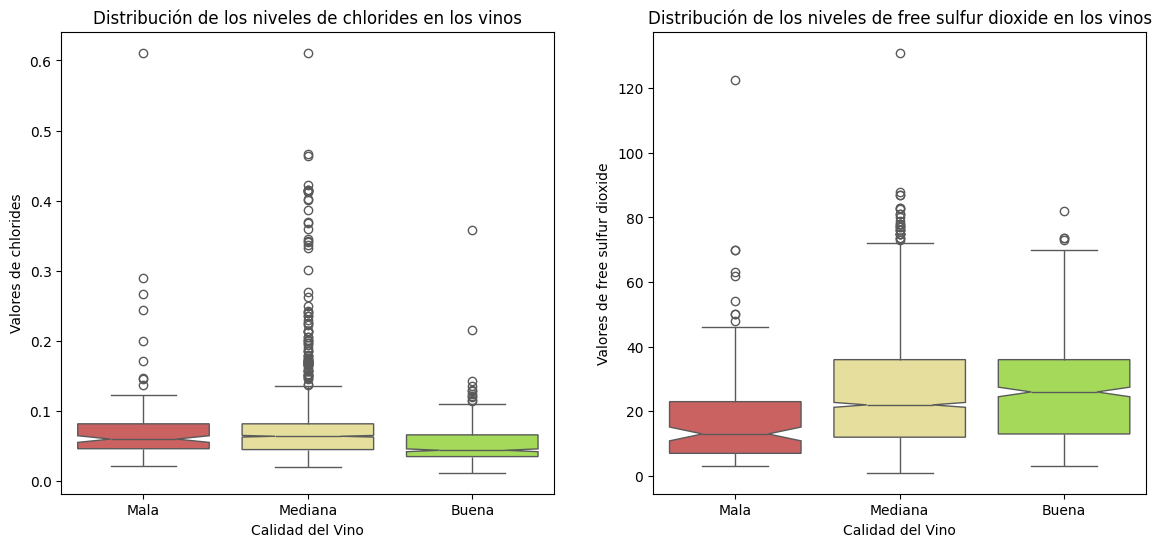

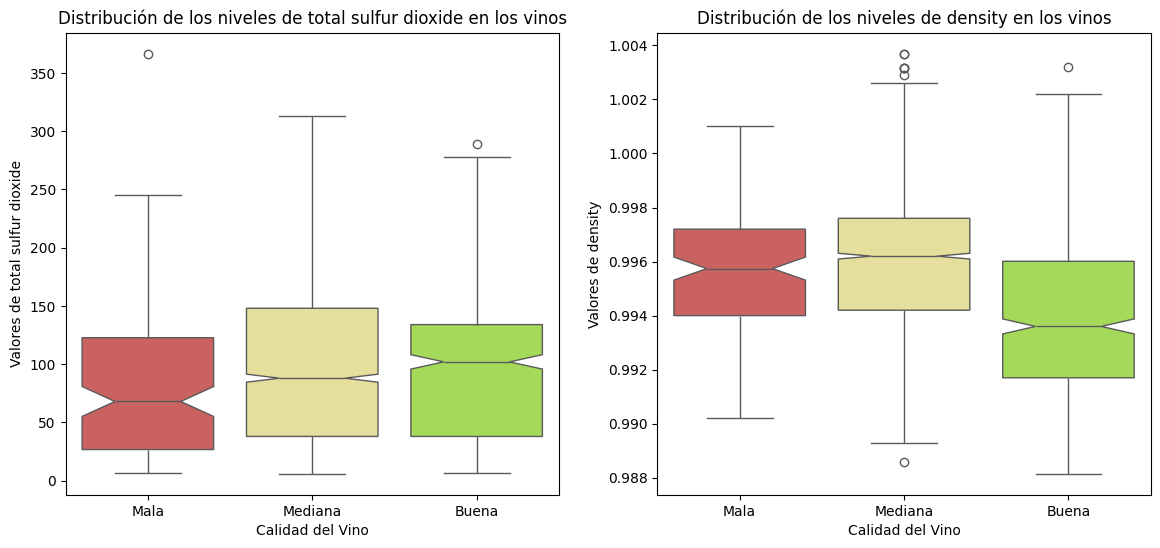

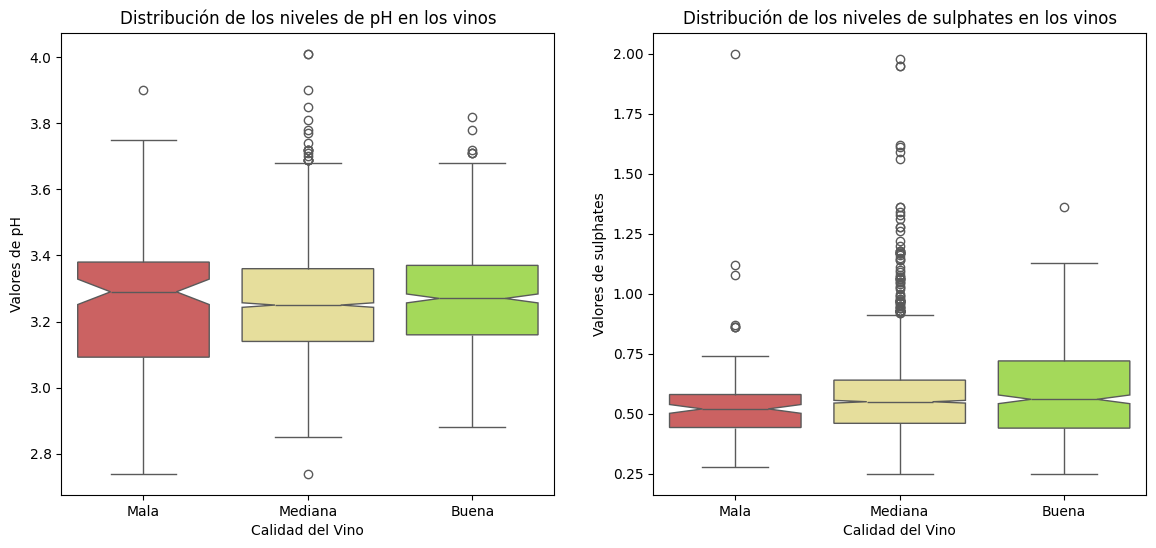

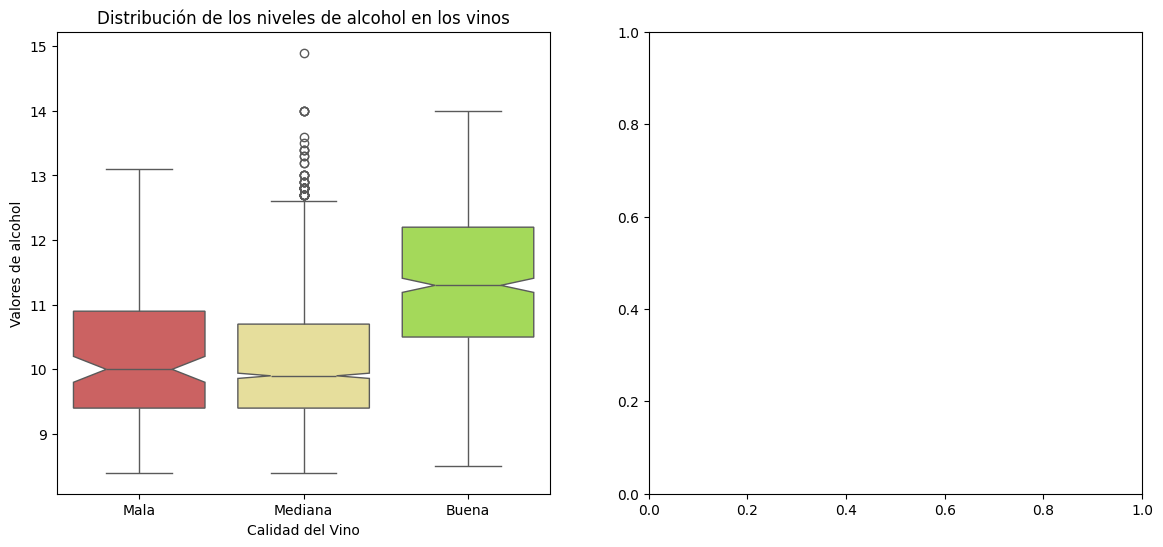

In [611]:
# Se hace la paleta de colores
colores = ["#dd5050", "#f3e88f", "#a7ee45"]

fig, axis = plt.subplots(1, 2, figsize=(14, 6))
for i, col in enumerate(preprocessed_ds.drop(['is_riesling', 'quality'], axis=1).columns) :

    # Se crea el boxplot con seaborn. Antes se aplica un renombre y se aplican colores
    sns.boxplot (
        x=preprocessed_ds['quality'].apply(lambda x : 'Mala' if x in [1, 2, 3, 4] else ('Mediana' if x in [5, 6] else 'Buena')), 
        y=preprocessed_ds[col],
        ax=axis[i % 2],
        notch=True, 
        palette=colores,
        hue=preprocessed_ds['quality'].apply(lambda x : 'Mala' if x in [1, 2, 3, 4] else ('Mediana' if x in [5, 6] else 'Buena')),
        hue_order=['Mala', 'Mediana', 'Buena'],
        legend=False,
        order=['Mala', 'Mediana', 'Buena']
    )
    # Se cambia el nombre de los ejes
    axis[i % 2].set_xlabel("Calidad del Vino")
    axis[i % 2].set_ylabel(f"Valores de {col}")

    # Se agrega un título al gráfico
    axis[i % 2].set_title(f"Distribución de los niveles de {col} en los vinos")

    if (i % 2 != 0) :
        # Se muestran los gráficos
        plt.show()
        fig, axis = plt.subplots(1, 2, figsize=(14, 6))

_Vemos cosas interesantes, como por ejemplo, que parece haber una diferencia significativa entre la media de valores de alcohol, chlorides y density en los vinos de buena calidad respecto del resto.     
En otros como en volatile acidity, free/total sulphur dioxide y citric acid parecen haber diferencias entre todos los grupos. Estaría bueno, probar con un test, toda esta información._

Probamos ahora, para Riesling...

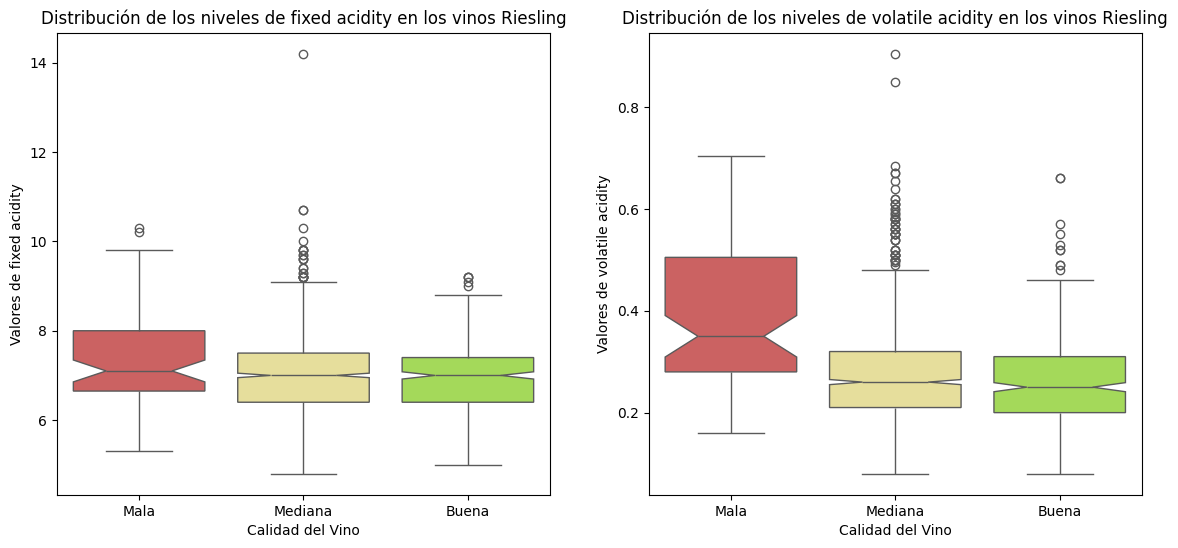

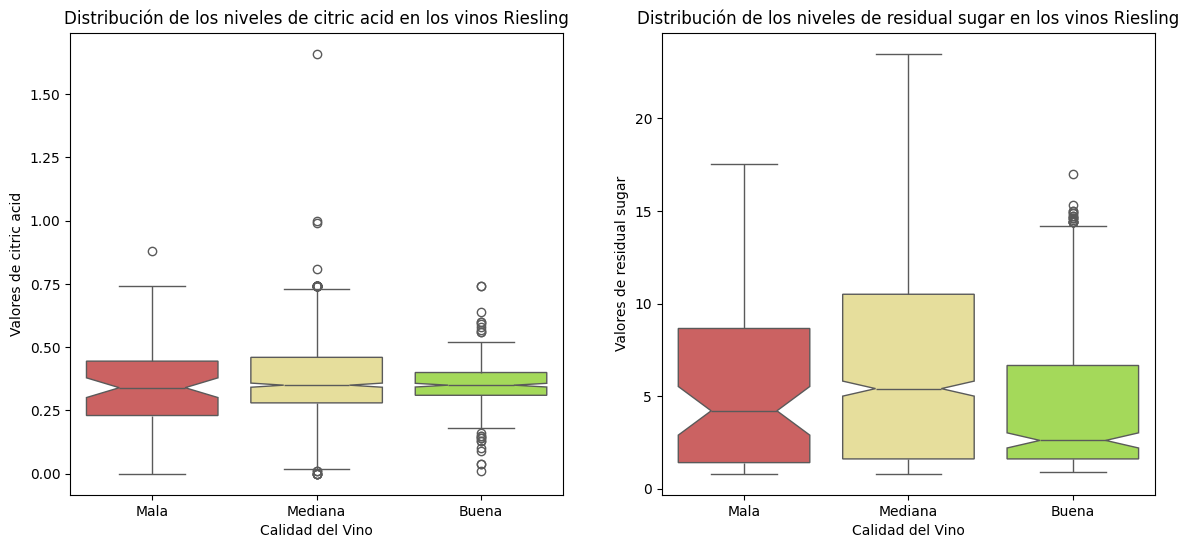

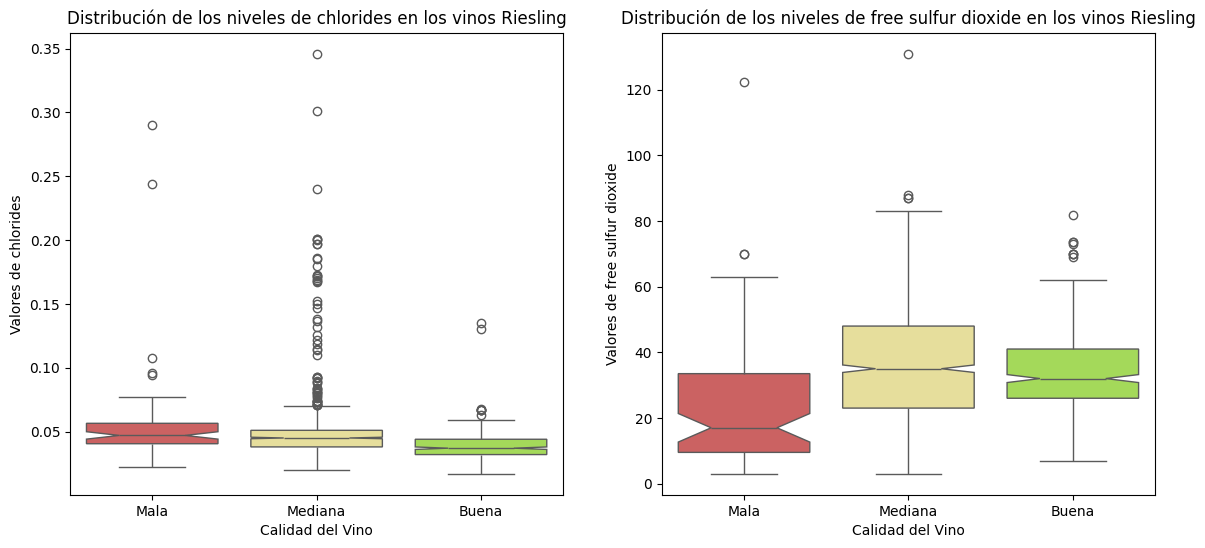

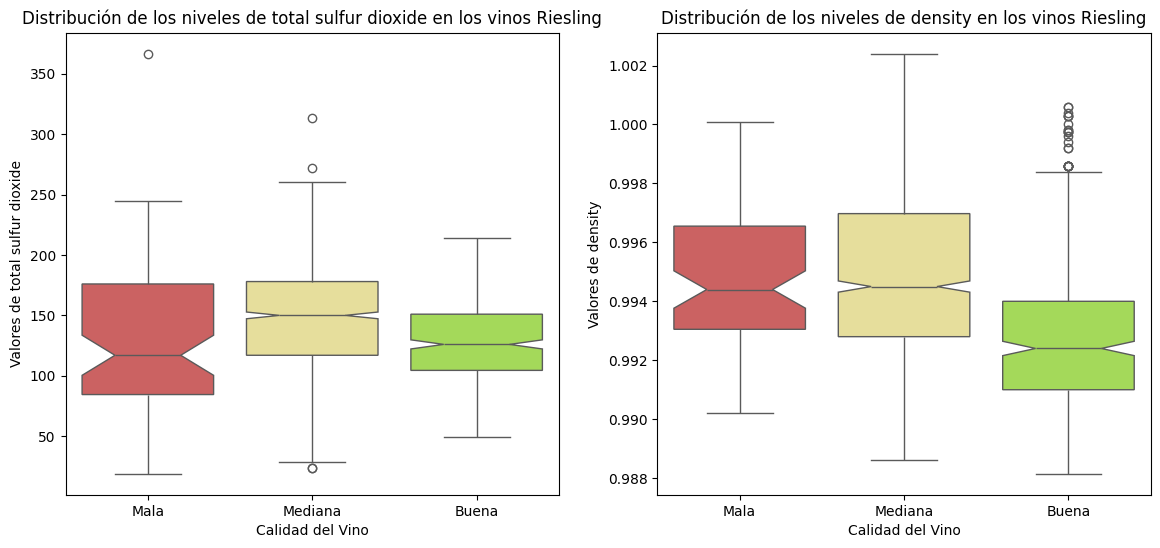

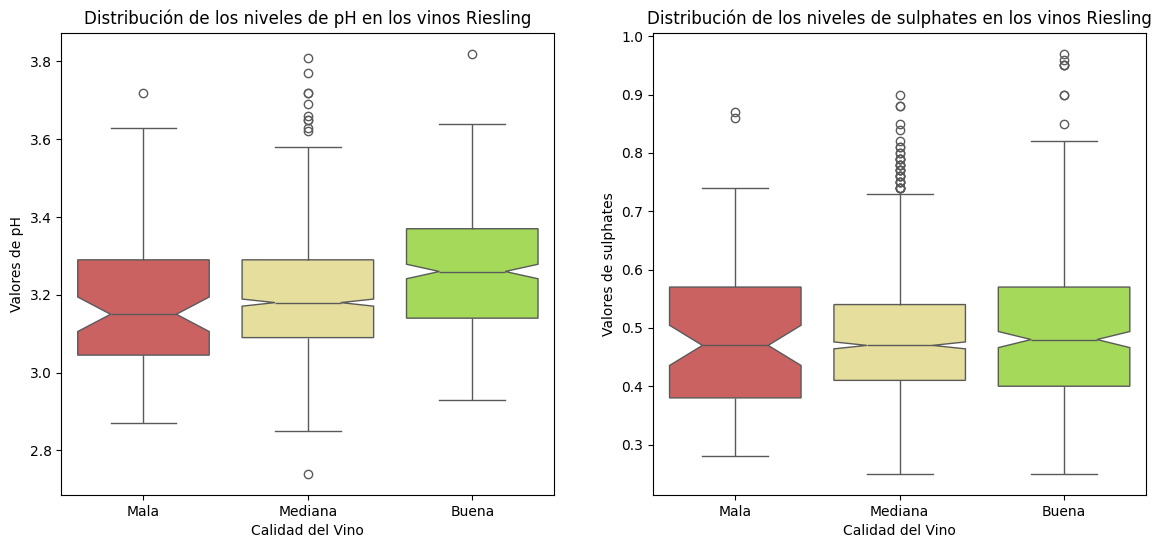

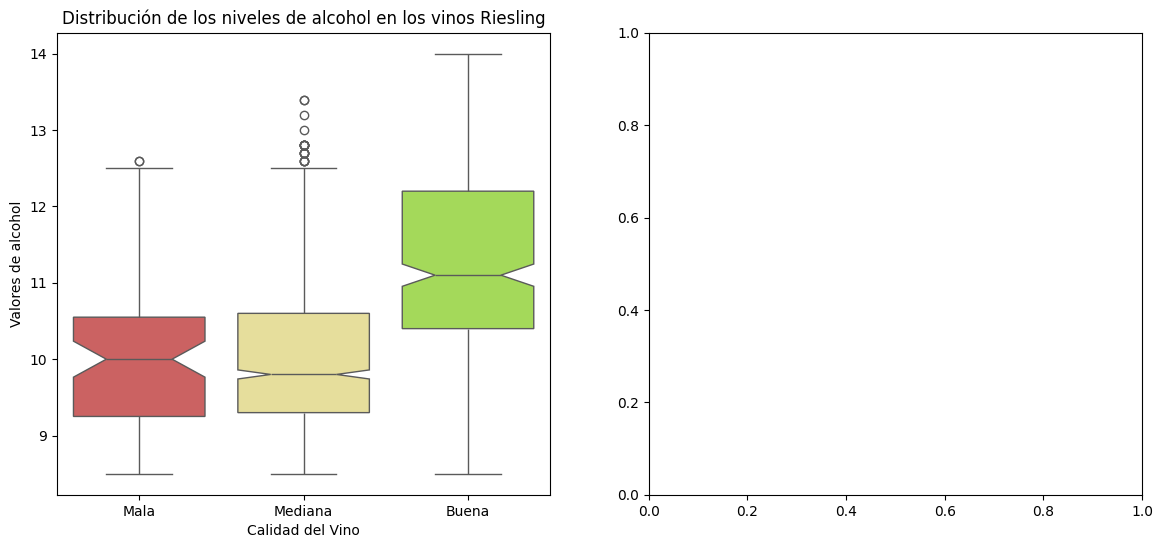

In [612]:
# Se hace la paleta de colores
colores = ["#dd5050", "#f3e88f", "#a7ee45"]

fig, axis = plt.subplots(1, 2, figsize=(14, 6))
for i, col in enumerate(riesling_data.drop(['is_riesling', 'quality'], axis=1).columns) :

    # Se crea el boxplot con seaborn. Antes se aplica un renombre y se aplican colores
    sns.boxplot (
        x=riesling_data['quality'].apply(lambda x : 'Mala' if x in [1, 2, 3, 4] else ('Mediana' if x in [5, 6] else 'Buena')), 
        y=riesling_data[col],
        ax=axis[i % 2],
        notch=True, 
        palette=colores,
        hue=riesling_data['quality'].apply(lambda x : 'Mala' if x in [1, 2, 3, 4] else ('Mediana' if x in [5, 6] else 'Buena')),
        hue_order=['Mala', 'Mediana', 'Buena'],
        legend=False,
        order=['Mala', 'Mediana', 'Buena']
    )
    # Se cambia el nombre de los ejes
    axis[i % 2].set_xlabel("Calidad del Vino")
    axis[i % 2].set_ylabel(f"Valores de {col}")

    # Se agrega un título al gráfico
    axis[i % 2].set_title(f"Distribución de los niveles de {col} en los vinos Riesling")

    if (i % 2 != 0) :
        # Se muestran los gráficos
        plt.show()
        fig, axis = plt.subplots(1, 2, figsize=(14, 6))

_Aparecen discrepancias, por ejemplo, en pH parece haber una diferencia significativa de la media del grupo de buena calidad respecto de las otras.    
La amplitud de los intervalos de confianza de la mediana de los grupos de baja y buena calidad hacen evidente la diferencia de muestras que hay entre los grupos, lo que podría afectar al poder estadístico del test (en Quality se había visto la frecuencia de cada valor de calidad, también en el reporte). Quizá, lo mejor sería dividir en 2 grupos: media/alta calidad y media/baja calidad._

Probamos para Garnacha...

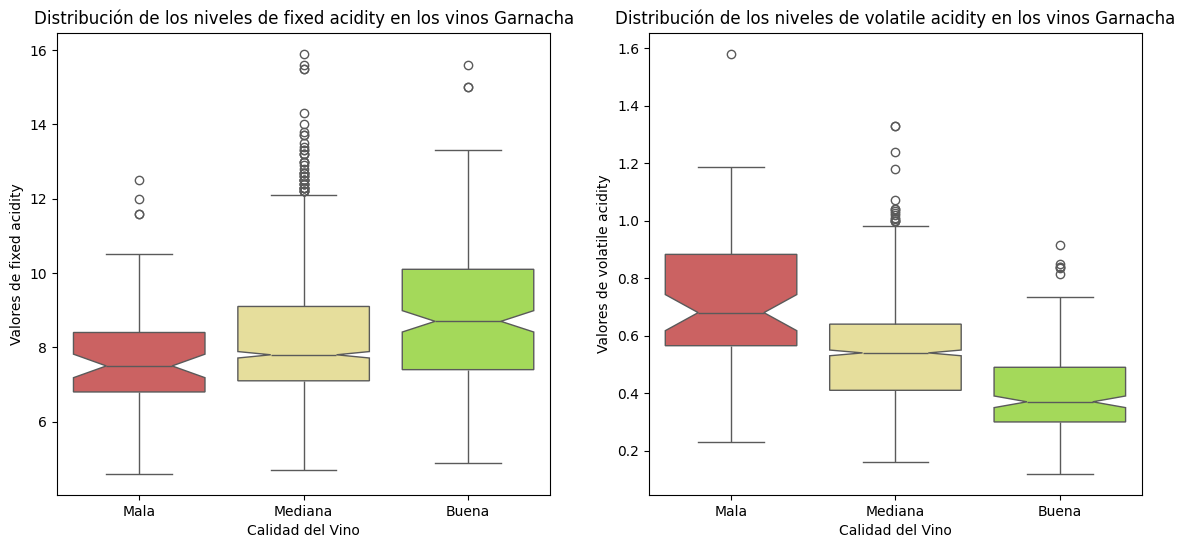

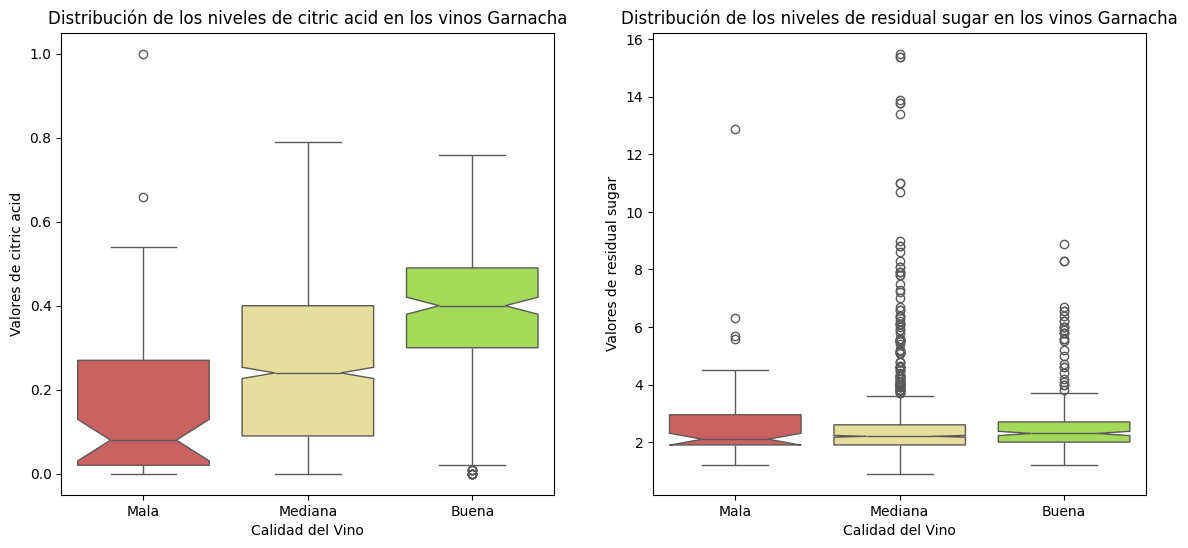

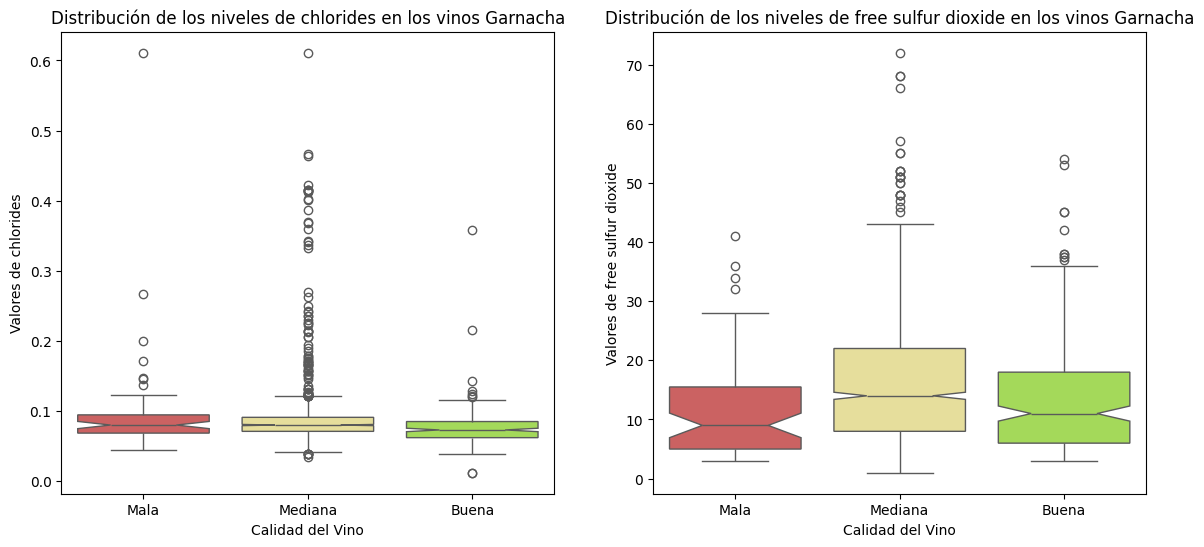

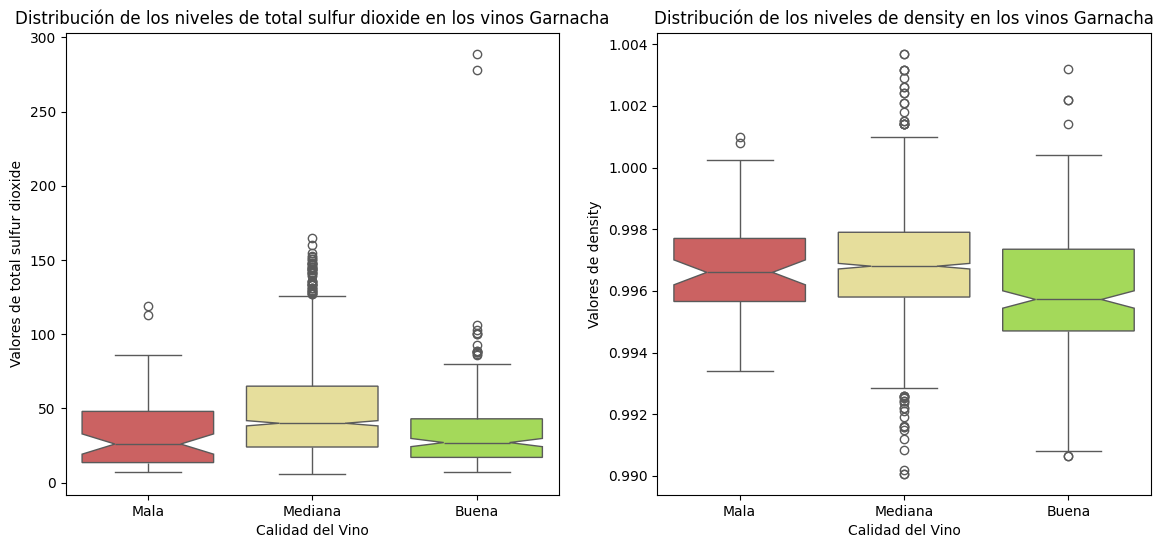

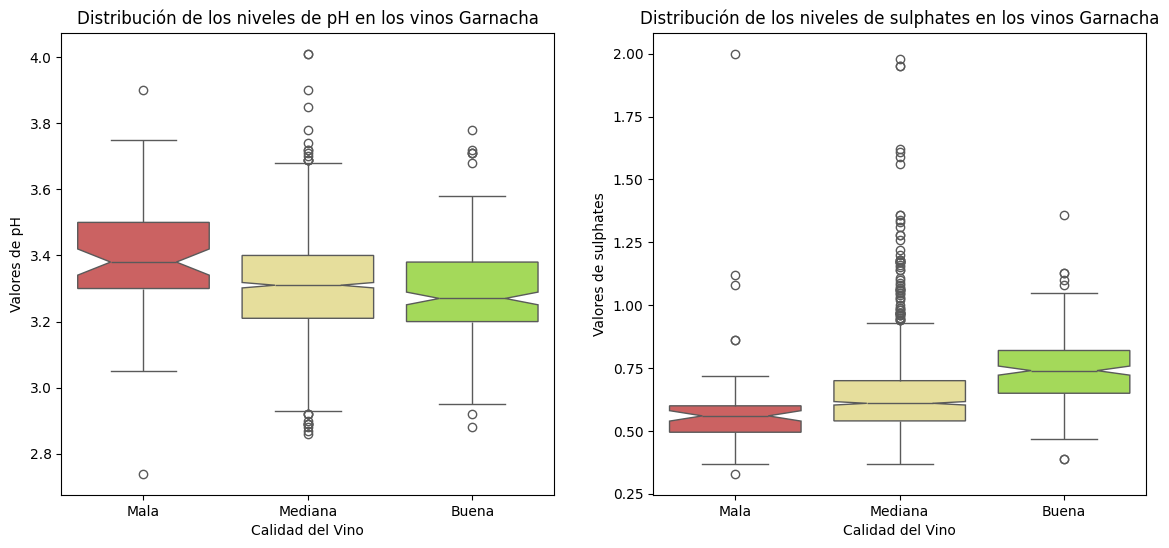

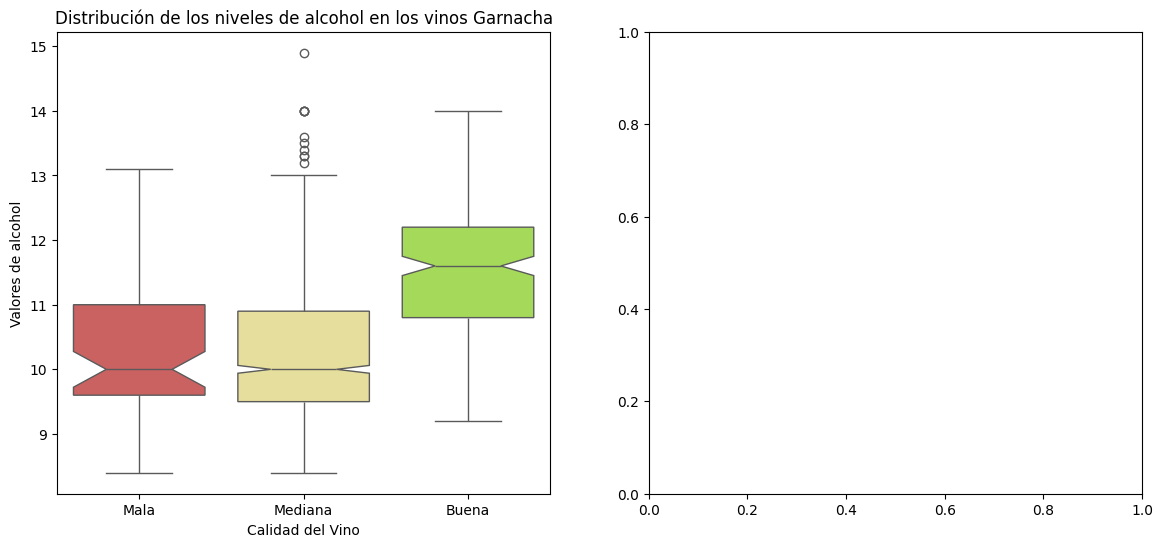

In [613]:
# Se hace la paleta de colores
colores = ["#dd5050", "#f3e88f", "#a7ee45"]

fig, axis = plt.subplots(1, 2, figsize=(14, 6))
for i, col in enumerate(garnacha_data.drop(['is_riesling', 'quality'], axis=1).columns) :

    # Se crea el boxplot con seaborn. Antes se aplica un renombre y se aplican colores
    sns.boxplot (
        x=garnacha_data['quality'].apply(lambda x : 'Mala' if x in [1, 2, 3, 4] else ('Mediana' if x in [5, 6] else 'Buena')), 
        y=garnacha_data[col],
        ax=axis[i % 2],
        notch=True, 
        palette=colores,
        hue=garnacha_data['quality'].apply(lambda x : 'Mala' if x in [1, 2, 3, 4] else ('Mediana' if x in [5, 6] else 'Buena')),
        hue_order=['Mala', 'Mediana', 'Buena'],
        legend=False,
        order=['Mala', 'Mediana', 'Buena']
    )
    # Se cambia el nombre de los ejes
    axis[i % 2].set_xlabel("Calidad del Vino")
    axis[i % 2].set_ylabel(f"Valores de {col}")

    # Se agrega un título al gráfico
    axis[i % 2].set_title(f"Distribución de los niveles de {col} en los vinos Garnacha")

    if (i % 2 != 0) :
        # Se muestran los gráficos
        plt.show()
        fig, axis = plt.subplots(1, 2, figsize=(14, 6))

_Se ven cosas interesantes como las diferencias entre las medias en sulphates o citric acid. Sin embargo, recaemos en lo mismo, hay un problema con la confianza que nos ofrece esta división en grupos.  
Cabe destacar que la información de Riesling y Garnacha concuerda con lo visto anteriormente en el gráfico de citric acid y quality._

### _REGRESIÓN_

Procedemos a crear un arbol de decisión para conocer cuáles son las variables más influyentes en la calidad del vino:

In [614]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Se definen los datos a analizar
X = preprocessed_ds.drop(['quality', 'is_riesling'], axis=1)    # Características (atributos)
y = preprocessed_ds['quality']                                  # Variable objetivo 

# Se dividen los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Se crea el modelo de árbol de decisión
modelo = DecisionTreeClassifier(random_state=42)

# Se entrenar el modelo
modelo.fit(X_train, y_train)

# Se evalua la importancia de las características
importancias = modelo.feature_importances_

# Se crea un DataFrame con la importancia de las características
df_importancias = pd.DataFrame({
    'Atributo': X.columns,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Se muestran las características más influyentes
print("Características influyentes en la calidad del vino:")
print(df_importancias)

Características influyentes en la calidad del vino:
                Atributo  Importancia
10               alcohol     0.136979
1       volatile acidity     0.106136
9              sulphates     0.103739
3         residual sugar     0.098256
8                     pH     0.092524
6   total sulfur dioxide     0.091525
4              chlorides     0.080687
7                density     0.080670
5    free sulfur dioxide     0.076326
2            citric acid     0.069238
0          fixed acidity     0.063919


### _PREGUNTAR POR ESCALADO_

In [615]:
# reporte = ProfileReport(preprocessed_ds)
# reporte.to_notebook_iframe()

Como vemos en el reporte, el _pH_ es la única _feature_ que parece seguir una distribución parecida a la normal y que podría ser "estandarizable". El resto de distribuciones, no tienen suficientes outliers como para aplicar una estandarización robusta, por lo que normalizamos y no hacemos suposiciones.

In [616]:
"""
from sklearn.preprocessing import MinMaxScaler

# Inicializar el MinMaxScaler
scaler = MinMaxScaler()

col_excluidas = ["pH", "type_Riesling", "chlorides"]

col_normalizar = list(preprocessed_ds.columns)

for col in col_excluidas :
    col_normalizar.remove(col)

preprocessed_ds[col_normalizar] = scaler.fit_transform(preprocessed_ds[col_normalizar])

preprocessed_ds.head()

"""

'\nfrom sklearn.preprocessing import MinMaxScaler\n\n# Inicializar el MinMaxScaler\nscaler = MinMaxScaler()\n\ncol_excluidas = ["pH", "type_Riesling", "chlorides"]\n\ncol_normalizar = list(preprocessed_ds.columns)\n\nfor col in col_excluidas :\n    col_normalizar.remove(col)\n\npreprocessed_ds[col_normalizar] = scaler.fit_transform(preprocessed_ds[col_normalizar])\n\npreprocessed_ds.head()\n\n'

## Prueba de Hipótesis

### _Mientras más alto es el ácido volátil, peor es la calidad de un vino._

Esta hipótesis fue extraída de información del dominio en un principio y, mirando los box plot, hay indicios de que se cumpla. Aunque, no parece haber ni normalidad (porque las cajas no están centradas) ni homocedasticidad (por la diferencia de longitudes entre los bigotes).   
Graficamos para ver cómo se distribuyen los datos y tener una idea general.

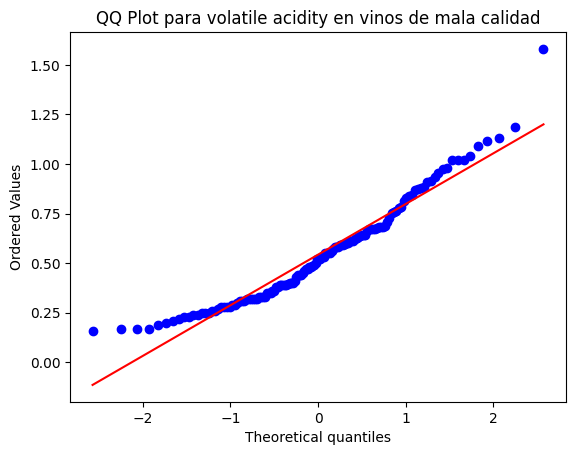

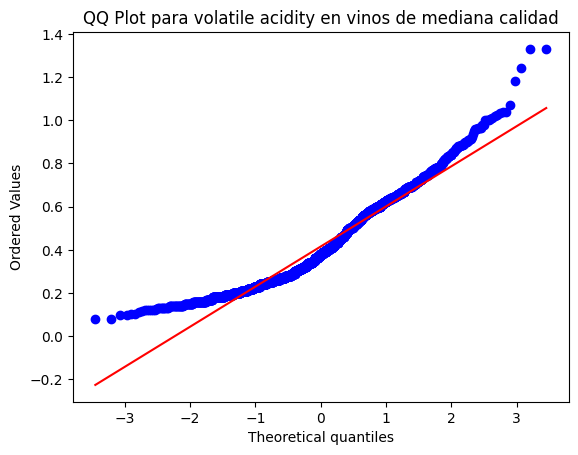

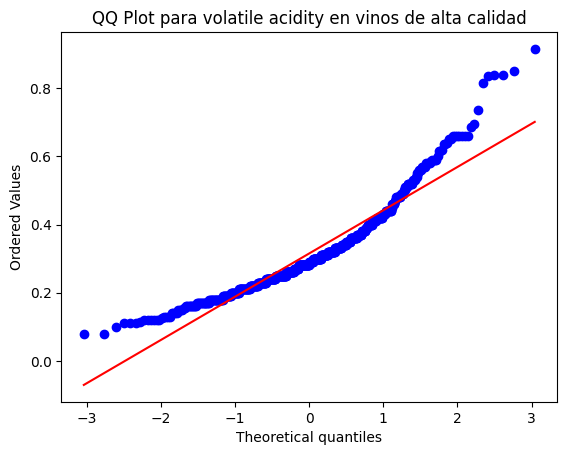

In [617]:
import scipy.stats as stats

# Se crean los 3 grupos de vinos 
mala_calidad = preprocessed_ds[preprocessed_ds['quality'].isin([1, 2, 3, 4])]['volatile acidity']
mediana_calidad = preprocessed_ds[preprocessed_ds['quality'].isin([5, 6])]['volatile acidity']
buena_calidad = preprocessed_ds[preprocessed_ds['quality'].isin([7, 8, 9, 10])]['volatile acidity']

# Se crea el QQ Plot para baja calidad
stats.probplot(mala_calidad, dist="norm", plot=plt)
plt.title("QQ Plot para volatile acidity en vinos de mala calidad")
plt.show()

# Se crea el QQ Plot para mediana calidad
stats.probplot(mediana_calidad, dist="norm", plot=plt)
plt.title("QQ Plot para volatile acidity en vinos de mediana calidad")
plt.show()

# Se crea el QQ Plot para alta calidad
stats.probplot(buena_calidad, dist="norm", plot=plt)
plt.title("QQ Plot para volatile acidity en vinos de alta calidad")
plt.show()

_Viendo el QQ Plot las distribuciones no son normales. Aplicamos la prueba de Shapiro-Wilk para probar normalidad..._

In [618]:
from scipy.stats import shapiro

stat, p = shapiro(mala_calidad)
print(f"Test de Shapiro-Wilk para vinos de mala calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(mediana_calidad)
print(f"Test de Shapiro-Wilk para vinos de mediana calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(buena_calidad)
print(f"Test de Shapiro-Wilk para vinos de buena calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos de mala calidad: Estadístico=0.940, p-valor=0.000
Test de Shapiro-Wilk para vinos de mediana calidad: Estadístico=0.946, p-valor=0.000
Test de Shapiro-Wilk para vinos de buena calidad: Estadístico=0.909, p-valor=0.000


_No hay normalidad. Probamos homocedasticidad..._

In [619]:
stat, p = stats.levene(mala_calidad, mediana_calidad, buena_calidad)
print(f"Test de Levene para volatile acidity: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para volatile acidity: Estadístico=85.038, p-valor=0.000


_Dado que no hay homocedasticidad entre todos los grupos pero podría haberlo entre pares_

In [620]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = pd.DataFrame({
    'value': np.concatenate([mala_calidad, mediana_calidad, buena_calidad]),
    'group': ['mala']*len(mala_calidad) + ['media']*len(mediana_calidad) + ['buena']*len(buena_calidad)
})
tukey_results = pairwise_tukeyhsd(data['value'], data['group'], alpha=0.05)
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
 buena   mala   0.2274   0.0  0.1864  0.2684   True
 buena  media   0.1001   0.0  0.0803  0.1199   True
  mala  media  -0.1273   0.0 -0.1652 -0.0894   True
---------------------------------------------------


_No hay homocedasticidad entre ninguno de los grupos, aplicamos Kruskal-Wallis_

In [621]:
stat, p = stats.kruskal(mala_calidad, mediana_calidad)
print(f"Test de Kruskal-Wallis para volatile acidity: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.kruskal(mediana_calidad, buena_calidad)
print(f"Test de Kruskal-Wallis para volatile acidity: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.kruskal(mala_calidad, buena_calidad)
print(f"Test de Kruskal-Wallis para volatile acidity: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Kruskal-Wallis para volatile acidity: Estadístico=33.149, p-valor=0.000
Test de Kruskal-Wallis para volatile acidity: Estadístico=135.211, p-valor=0.000
Test de Kruskal-Wallis para volatile acidity: Estadístico=109.179, p-valor=0.000


Habiendo hecho el test de Kruskal-Wallis, vemos que en realidad, el ácido volatil afecta a la calidad resultante de un vino en general, y viendo el gráfico planteado con anterioridad, se hace notar que el aumento de ácido volátil empeora la calidad.  
Otro detalle es que, según el tipo de uva, podrían cambiar las propiedades. Además, si se miran las frecuencias, tenemos ciertos problemas con las precisiones de los vino de buena y mala calidad en general. La prueba es más precisa si los datos se agrupan en vinos de media/alta y media/baja calidad:

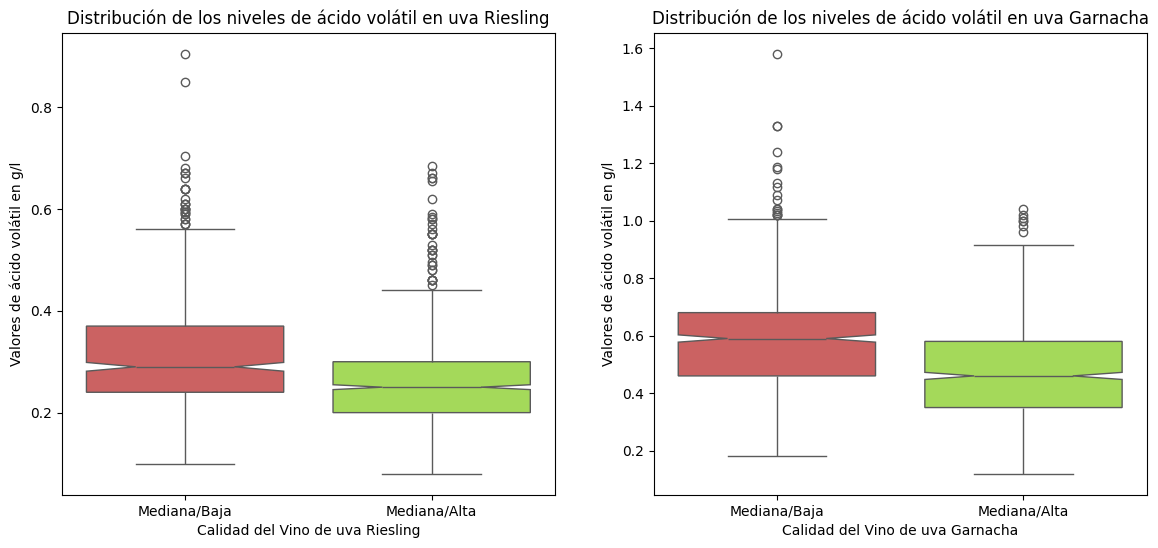

In [622]:
# Se hace la paleta de colores
colores = ["#dd5050", "#a7ee45"]

fig, axis = plt.subplots(1, 2, figsize=(14, 6))

# Se crea el boxplot con seaborn. Antes se aplica un renombre y se aplican colores
sns.boxplot (
    x=riesling_data['quality'].apply(lambda x : 'Mediana/Baja' if x in [1, 2, 3, 4, 5] else 'Mediana/Alta'), 
    y=riesling_data['volatile acidity'],
    ax=axis[0],
    notch=True, 
    palette=colores,
    hue=riesling_data['quality'].apply(lambda x : 'Mediana/Baja' if x in [1, 2, 3, 4, 5] else 'Mediana/Alta'),
    hue_order=['Mediana/Baja', 'Mediana/Alta'],
    legend=False,
    order=['Mediana/Baja', 'Mediana/Alta']
)
# Se cambia el nombre de los ejes
axis[0].set_xlabel("Calidad del Vino de uva Riesling")
axis[0].set_ylabel(f"Valores de ácido volátil en g/l")

# Se agrega un título al gráfico
axis[0].set_title(f"Distribución de los niveles de ácido volátil en uva Riesling")

# Se crea el boxplot con seaborn. Antes se aplica un renombre y se aplican colores
sns.boxplot (
    x=garnacha_data['quality'].apply(lambda x : 'Mediana/Baja' if x in [1, 2, 3, 4, 5] else 'Mediana/Alta'), 
    y=garnacha_data['volatile acidity'],
    ax=axis[1],
    notch=True, 
    palette=colores,
    hue=garnacha_data['quality'].apply(lambda x : 'Mediana/Baja' if x in [1, 2, 3, 4, 5] else 'Mediana/Alta'),
    hue_order=['Mediana/Baja', 'Mediana/Alta'],
    legend=False,
    order=['Mediana/Baja', 'Mediana/Alta']
)
# Se cambia el nombre de los ejes
axis[1].set_xlabel("Calidad del Vino de uva Garnacha")
axis[1].set_ylabel(f"Valores de ácido volátil en g/l")

# Se agrega un título al gráfico
axis[1].set_title(f"Distribución de los niveles de ácido volátil en uva Garnacha")

plt.show()

_Vemos que pareciera haber homocedasticidad en el caso de Garnacha, y en ambos, parecen haber diferencias_

In [623]:
med_mala_calidad_r = riesling_data[riesling_data['quality'].isin([1, 2, 3, 4, 5])]['volatile acidity']
med_buena_calidad_r = riesling_data[riesling_data['quality'].isin([6, 7, 8, 9, 10])]['volatile acidity']

med_mala_calidad_g = garnacha_data[garnacha_data['quality'].isin([1, 2, 3, 4, 5])]['volatile acidity']
med_buena_calidad_g = garnacha_data[garnacha_data['quality'].isin([6, 7, 8, 9, 10])]['volatile acidity']

stat, p = shapiro(med_mala_calidad_r)
print(f"Test de Shapiro-Wilk para vinos de uva Riesling de mediana/baja calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = shapiro(med_buena_calidad_r)
print(f"Test de Shapiro-Wilk para vinos de uva Riesling de mediana/alta calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(med_mala_calidad_g)
print(f"\nTest de Shapiro-Wilk para vinos de uva Garnacha de mediana/baja calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = shapiro(med_buena_calidad_g)
print(f"Test de Shapiro-Wilk para vinos de uva Garnacha de mediana/alta calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos de uva Riesling de mediana/baja calidad: Estadístico=0.913, p-valor=0.000
Test de Shapiro-Wilk para vinos de uva Riesling de mediana/alta calidad: Estadístico=0.925, p-valor=0.000

Test de Shapiro-Wilk para vinos de uva Garnacha de mediana/baja calidad: Estadístico=0.965, p-valor=0.000
Test de Shapiro-Wilk para vinos de uva Garnacha de mediana/alta calidad: Estadístico=0.977, p-valor=0.000


_No hay normalidad, probamos homocedasticidad_

In [624]:
stat, p = stats.levene(med_mala_calidad_r, med_buena_calidad_r)
print(f"\nTest de Levene para volatile acidity para uva Riesling: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = stats.levene(med_mala_calidad_g, med_buena_calidad_g)
print(f"Test de Levene para volatile acidity para uva Garnacha: Estadístico={stat:.3f}, p-valor={p:.3f}")


Test de Levene para volatile acidity para uva Riesling: Estadístico=30.343, p-valor=0.000
Test de Levene para volatile acidity para uva Garnacha: Estadístico=0.217, p-valor=0.642


_Hay homocedasticidad, para el caso de Garnacha podemos aplicar Mann-Whitney_

In [625]:
stat, p = stats.kruskal(med_mala_calidad_r, med_buena_calidad_r)
print(f"\nTest de Kruskal-Wallis para volatile acidity de uva Riesling: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = stats.mannwhitneyu(med_mala_calidad_g, med_buena_calidad_g)
print(f"Test de Mann-Whitney para volatile acidity de uva Garnacha: Estadístico={stat:.3f}, p-valor={p:.3f}")


Test de Kruskal-Wallis para volatile acidity de uva Riesling: Estadístico=110.086, p-valor=0.000
Test de Mann-Whitney para volatile acidity de uva Garnacha: Estadístico=438912.000, p-valor=0.000


_Las hipótesis son rechazadas, por tanto, si hay diferencias significativas. Los vinos de peor calidad tienen más ácido volátil en ambas uvas._

### _Los vinos de buena calidad tienen menos cloruros_

Esta hipótesis fue extraida por el análisis realizado anteriormente, donde se veía gráficamente la diferencia entre las medias de las calidades con relación a los niveles de cloruros en el vino. Mejoramos las escalas de los gráficos...

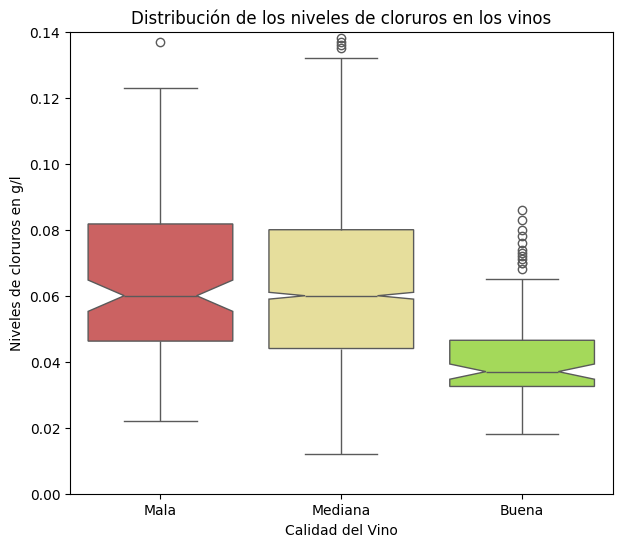

In [626]:
# Se hace la paleta de colores
colores = ["#dd5050", "#f3e88f", "#a7ee45"]

# Se generan los boxplots
plt.figure(figsize=(7,6))
sns.boxplot (
    x=preprocessed_ds['quality'].apply(lambda x : 'Mala' if x in [1, 2, 3, 4] else ('Mediana' if x in [5, 6, 7] else 'Buena')), 
    y=preprocessed_ds['chlorides'],
    notch=True, 
    palette=colores,
    hue=preprocessed_ds['quality'].apply(lambda x : 'Mala' if x in [1, 2, 3, 4] else ('Mediana' if x in [5, 6, 7] else 'Buena')),
    hue_order=['Mala', 'Mediana', 'Buena'],
    legend=False,
    order=['Mala', 'Mediana', 'Buena']
)
plt.title("Distribución de los niveles de cloruros en los vinos")
plt.ylabel("Niveles de cloruros en g/l")
plt.xlabel("Calidad del Vino")
plt.ylim(0, 0.14)
plt.show()

_No parece haber ni normalidad (porque las cajas no están centradas) ni homocedasticidad (por la diferencia de longitudes entre los bigotes)_

Probamos primeramente visualizar gráficamente la normalidad de los datos con un QQ Plot:

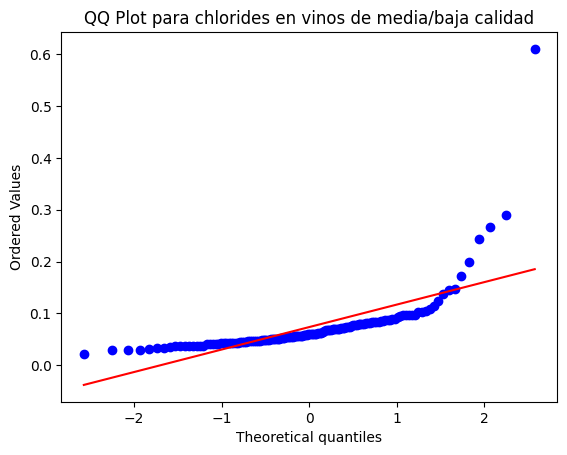

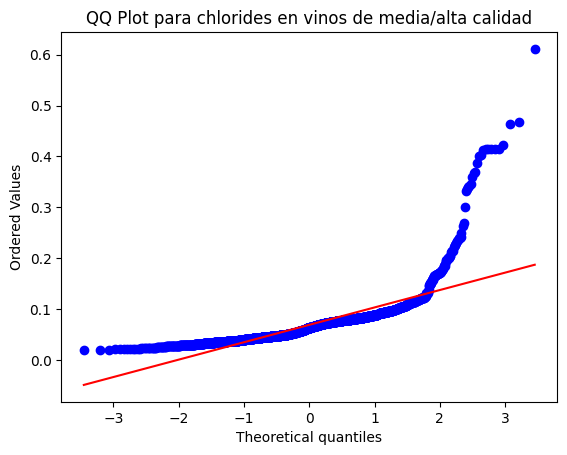

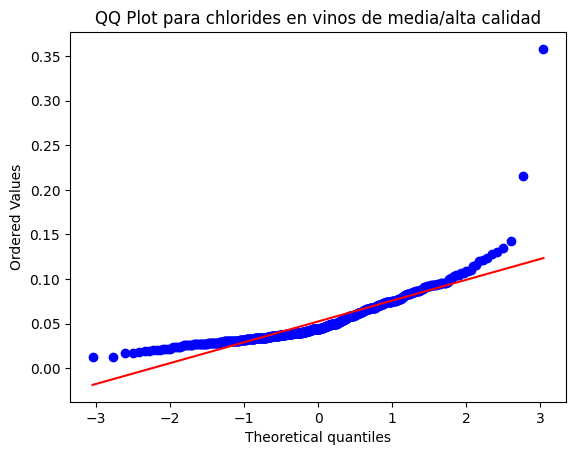

In [627]:
mala_calidad = preprocessed_ds[preprocessed_ds['quality'].isin([1, 2, 3, 4])]['chlorides']
mediana_calidad = preprocessed_ds[preprocessed_ds['quality'].isin([5, 6])]['chlorides']
buena_calidad = preprocessed_ds[preprocessed_ds['quality'].isin([7, 8, 9, 10])]['chlorides']

stats.probplot(mala_calidad, dist="norm", plot=plt)
plt.title("QQ Plot para chlorides en vinos de media/baja calidad")
plt.show()

stats.probplot(mediana_calidad, dist="norm", plot=plt)
plt.title("QQ Plot para chlorides en vinos de media/alta calidad")
plt.show()

stats.probplot(buena_calidad, dist="norm", plot=plt)
plt.title("QQ Plot para chlorides en vinos de media/alta calidad")
plt.show()

_No parece haber normalidad. Aplicamos Shapiro-Wilk_

In [628]:
stat, p = shapiro(mala_calidad)
print(f"Test de Shapiro-Wilk para vinos de mala calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(mediana_calidad)
print(f"Test de Shapiro-Wilk para vinos de mediana calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(buena_calidad)
print(f"Test de Shapiro-Wilk para vinos de buena calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos de mala calidad: Estadístico=0.503, p-valor=0.000
Test de Shapiro-Wilk para vinos de mediana calidad: Estadístico=0.621, p-valor=0.000
Test de Shapiro-Wilk para vinos de buena calidad: Estadístico=0.779, p-valor=0.000


_No hay normalidad, probamos homocedasticidad_

In [629]:
stat, p = stats.levene(mala_calidad, mediana_calidad, buena_calidad)
print(f"\nTest de Levene para volatile acidity para uva Riesling: Estadístico={stat:.3f}, p-valor={p:.3f}")


Test de Levene para volatile acidity para uva Riesling: Estadístico=10.075, p-valor=0.000


_No hay homocedasticidad entre los tres grupos, pero podría haber entre pares_

In [630]:
data = pd.DataFrame({
    'value': np.concatenate([mala_calidad, mediana_calidad, buena_calidad]),
    'group': ['mala']*len(mala_calidad) + ['media']*len(mediana_calidad) + ['buena']*len(buena_calidad)
})
tukey_results = pairwise_tukeyhsd(data['value'], data['group'], alpha=0.05)
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
 buena   mala   0.0213    0.0   0.012 0.0305   True
 buena  media   0.0174    0.0  0.0129 0.0219   True
  mala  media  -0.0039 0.5368 -0.0124 0.0047  False
---------------------------------------------------


_hay homocedasticidad entre el grupo de mala calidad y mediana calidad. Podemos aplicar Mann-Whitney_

In [631]:
stat, p = stats.mannwhitneyu(mala_calidad, mediana_calidad)
print(f"Test de Mann-Whitney para volatile acidity: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.kruskal(mediana_calidad, buena_calidad)
print(f"Test de Kruskal-Wallis para volatile acidity: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.kruskal(mala_calidad, buena_calidad)
print(f"Test de Kruskal-Wallis para volatile acidity: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Mann-Whitney para volatile acidity: Estadístico=171261.000, p-valor=0.875
Test de Kruskal-Wallis para volatile acidity: Estadístico=182.560, p-valor=0.000
Test de Kruskal-Wallis para volatile acidity: Estadístico=41.700, p-valor=0.000


_Se rechazan dos hipótesis nulas: hay diferencias significativas entre las medias de los vinos de buena y mala, y buena y mediana calidad. El grupo de buena calidad de vinos tiene una media de cloruros más baja que la del resto como podemos ver en el gráfico.  
 Se acepta la hipótesis nula para los vinos de mediana y baja calidad, por lo tanto, sus medias no tienen diferencias significativas.  
 Podemos profundizar más en esta hipótesis porque podemos comparar dos grupos que tienen una cantidad de muestras muy similar para cada uva, y de esta manera, mejorar la precisión del test_

Comenzamos, mostrando ambos grupos para cada uva

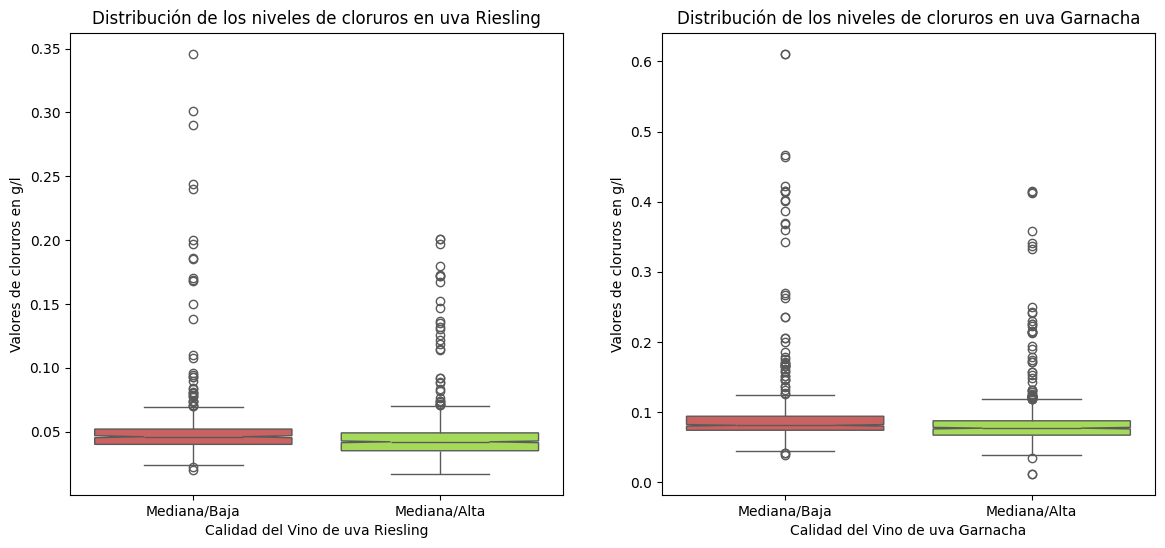

In [632]:
# Se hace la paleta de colores
colores = ["#dd5050", "#a7ee45"]

fig, axis = plt.subplots(1, 2, figsize=(14, 6))

# Se crea el boxplot con seaborn. Antes se aplica un renombre y se aplican colores
sns.boxplot (
    x=riesling_data['quality'].apply(lambda x : 'Mediana/Baja' if x in [1, 2, 3, 4, 5] else 'Mediana/Alta'), 
    y=riesling_data['chlorides'],
    ax=axis[0],
    notch=True, 
    palette=colores,
    hue=riesling_data['quality'].apply(lambda x : 'Mediana/Baja' if x in [1, 2, 3, 4, 5] else 'Mediana/Alta'),
    hue_order=['Mediana/Baja', 'Mediana/Alta'],
    legend=False,
    order=['Mediana/Baja', 'Mediana/Alta']
)
# Se cambia el nombre de los ejes
axis[0].set_xlabel("Calidad del Vino de uva Riesling")
axis[0].set_ylabel(f"Valores de cloruros en g/l")

# Se agrega un título al gráfico
axis[0].set_title(f"Distribución de los niveles de cloruros en uva Riesling")

# Se crea el boxplot con seaborn. Antes se aplica un renombre y se aplican colores
sns.boxplot (
    x=garnacha_data['quality'].apply(lambda x : 'Mediana/Baja' if x in [1, 2, 3, 4, 5] else 'Mediana/Alta'), 
    y=garnacha_data['chlorides'],
    ax=axis[1],
    notch=True, 
    palette=colores,
    hue=garnacha_data['quality'].apply(lambda x : 'Mediana/Baja' if x in [1, 2, 3, 4, 5] else 'Mediana/Alta'),
    hue_order=['Mediana/Baja', 'Mediana/Alta'],
    legend=False,
    order=['Mediana/Baja', 'Mediana/Alta']
)
# Se cambia el nombre de los ejes
axis[1].set_xlabel("Calidad del Vino de uva Garnacha")
axis[1].set_ylabel(f"Valores de cloruros en g/l")

# Se agrega un título al gráfico
axis[1].set_title(f"Distribución de los niveles de cloruros en uva Garnacha")

plt.show()

_Vemos que los box plots se encuentran aplastados. Mejoramos las escalas_

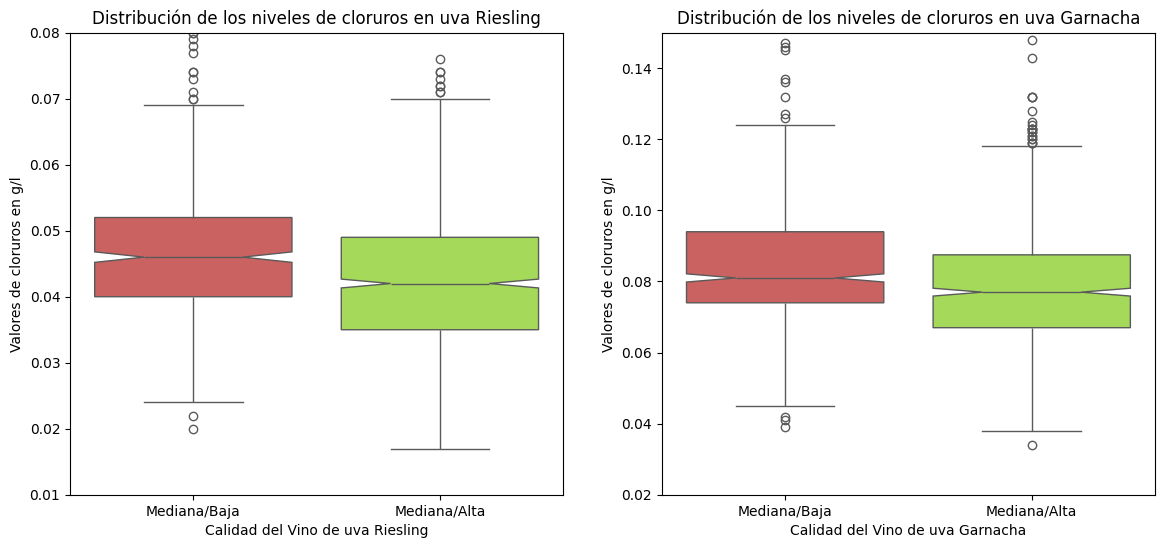

In [633]:
# Se hace la paleta de colores
colores = ["#dd5050", "#a7ee45"]

fig, axis = plt.subplots(1, 2, figsize=(14, 6))

# Se crea el boxplot con seaborn. Antes se aplica un renombre y se aplican colores
sns.boxplot (
    x=riesling_data['quality'].apply(lambda x : 'Mediana/Baja' if x in [1, 2, 3, 4, 5] else 'Mediana/Alta'), 
    y=riesling_data['chlorides'],
    ax=axis[0],
    notch=True, 
    palette=colores,
    hue=riesling_data['quality'].apply(lambda x : 'Mediana/Baja' if x in [1, 2, 3, 4, 5] else 'Mediana/Alta'),
    hue_order=['Mediana/Baja', 'Mediana/Alta'],
    legend=False,
    order=['Mediana/Baja', 'Mediana/Alta']
)
# Se cambia el nombre de los ejes
axis[0].set_xlabel("Calidad del Vino de uva Riesling")
axis[0].set_ylabel(f"Valores de cloruros en g/l")

# Se agrega un título al gráfico
axis[0].set_title(f"Distribución de los niveles de cloruros en uva Riesling")
axis[0].set_ylim(0.01, 0.08)

# Se crea el boxplot con seaborn. Antes se aplica un renombre y se aplican colores
sns.boxplot (
    x=garnacha_data['quality'].apply(lambda x : 'Mediana/Baja' if x in [1, 2, 3, 4, 5] else 'Mediana/Alta'), 
    y=garnacha_data['chlorides'],
    ax=axis[1],
    notch=True, 
    palette=colores,
    hue=garnacha_data['quality'].apply(lambda x : 'Mediana/Baja' if x in [1, 2, 3, 4, 5] else 'Mediana/Alta'),
    hue_order=['Mediana/Baja', 'Mediana/Alta'],
    legend=False,
    order=['Mediana/Baja', 'Mediana/Alta']
)
# Se cambia el nombre de los ejes
axis[1].set_xlabel("Calidad del Vino de uva Garnacha")
axis[1].set_ylabel(f"Valores de cloruros en g/l")

# Se agrega un título al gráfico
axis[1].set_title(f"Distribución de los niveles de cloruros en uva Garnacha")
axis[1].set_ylim(0.02, 0.15)

plt.show()

_Pareciera haber homocedasticidad en el caso de Garnacha. Podría haber normalidad si no hubieran tantos outliers_

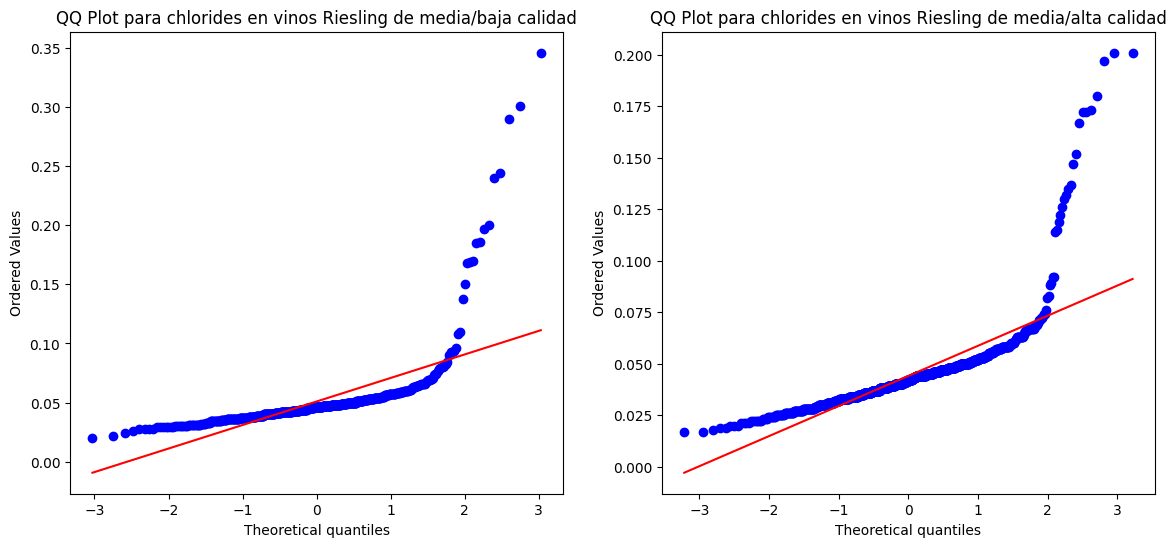

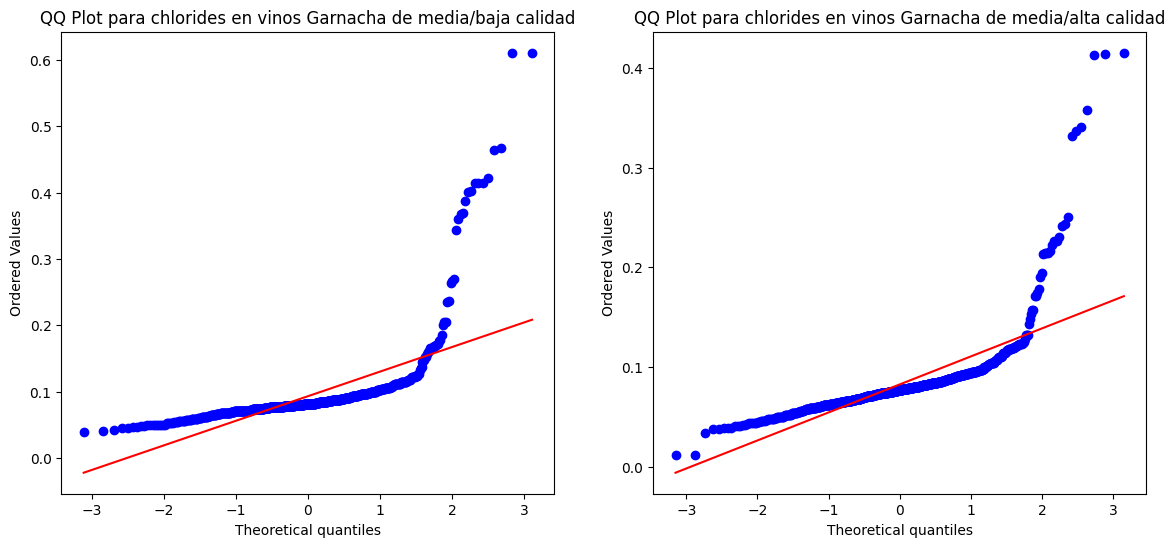

In [634]:
med_mala_calidad_r = riesling_data[riesling_data['quality'].isin([1, 2, 3, 4, 5])]['chlorides']
med_buena_calidad_r = riesling_data[riesling_data['quality'].isin([6, 7, 8, 9, 10])]['chlorides']

med_mala_calidad_g = garnacha_data[garnacha_data['quality'].isin([1, 2, 3, 4, 5])]['chlorides']
med_buena_calidad_g = garnacha_data[garnacha_data['quality'].isin([6, 7, 8, 9, 10])]['chlorides']

fig, axis = plt.subplots(1, 2, figsize=(14, 6))

stats.probplot(med_mala_calidad_r, dist="norm", plot=axis[0])
axis[0].set_title("QQ Plot para chlorides en vinos Riesling de media/baja calidad")

stats.probplot(med_buena_calidad_r, dist="norm", plot=axis[1])
axis[1].set_title("QQ Plot para chlorides en vinos Riesling de media/alta calidad")

plt.show()

fig, axis = plt.subplots(1, 2, figsize=(14, 6))

stats.probplot(med_mala_calidad_g, dist="norm", plot=axis[0])
axis[0].set_title("QQ Plot para chlorides en vinos Garnacha de media/baja calidad")

stats.probplot(med_buena_calidad_g, dist="norm", plot=axis[1])
axis[1].set_title("QQ Plot para chlorides en vinos Garnacha de media/alta calidad")

plt.show()

_Observando las gráficas, vemos que las distribuciones no son normales. Probamos aplicando el test de Shapiro-Wilk:_

In [635]:
stat, p = shapiro(med_mala_calidad_r)
print(f"Test de Shapiro-Wilk para vinos Riesling de media/baja calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = shapiro(med_buena_calidad_r)
print(f"Test de Shapiro-Wilk para vinos Riesling de media/alta calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(med_mala_calidad_r)
print(f"\nTest de Shapiro-Wilk para vinos Garnacha de media/baja calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = shapiro(med_buena_calidad_r)
print(f"Test de Shapiro-Wilk para vinos Garnacha de media/alta calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos Riesling de media/baja calidad: Estadístico=0.445, p-valor=0.000
Test de Shapiro-Wilk para vinos Riesling de media/alta calidad: Estadístico=0.635, p-valor=0.000

Test de Shapiro-Wilk para vinos Garnacha de media/baja calidad: Estadístico=0.445, p-valor=0.000
Test de Shapiro-Wilk para vinos Garnacha de media/alta calidad: Estadístico=0.635, p-valor=0.000


_Gráficamente se podía intuir, pero viendo los resultados de las hipótesis, las cuales se rechazan, comprobamos que no son normales._  
_Probamos homocedasticidad con test de Levene:_

In [636]:
stat, p = stats.levene(med_mala_calidad_r, med_buena_calidad_r)
print(f"Test de Levene para chlorides en vinos Riesling: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.levene(med_mala_calidad_g, med_buena_calidad_g)
print(f"Test de Levene para chlorides en vinos Garnacha: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para chlorides en vinos Riesling: Estadístico=3.643, p-valor=0.056
Test de Levene para chlorides en vinos Garnacha: Estadístico=3.439, p-valor=0.064


_Hay homocedasticidad, aplicamos Mann-Whitney_

In [637]:
stat, p = stats.mannwhitneyu(med_mala_calidad_r, med_buena_calidad_r)
print(f"Test de Mann-Whitney para chlorides en vinos Riesling: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = stats.mannwhitneyu(med_mala_calidad_g, med_buena_calidad_g)
print(f"Test de Mann-Whitney para chlorides en vinos Garnacha: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Mann-Whitney para chlorides en vinos Riesling: Estadístico=370470.000, p-valor=0.000
Test de Mann-Whitney para chlorides en vinos Garnacha: Estadístico=382029.000, p-valor=0.000


_Vemos que la hipótesis nula se rechaza, por lo que existe una diferencia significativa entre los valores de media/baja y media/alta calidad en ambas uvas. Por tanto podemos decir que un vino se ve afectado por la cantidad de cloruros que tenga y viendo el gráfico, los vinos de buena calidad tienen menos cloruros._

### _Los vinos de buena calidad tienen más alcohol_

Esta hipótesis fue extraida por el análisis realizado anteriormente, donde se veía gráficamente la diferencia entre las medias de las calidades con relación a los niveles de alcohol en el vino. No parece haber ni normalidad (porque las cajas no estan centradas) ni homocedasticidad (debido a que los bigotes parecen distintos).  
Probamos realizar un QQ plot para ver la normalidad de las distribuciones:

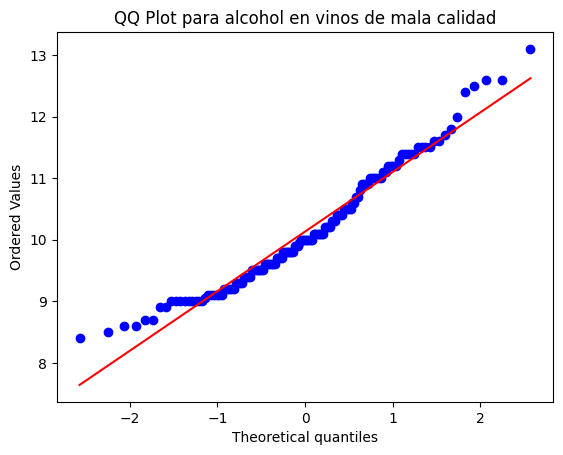

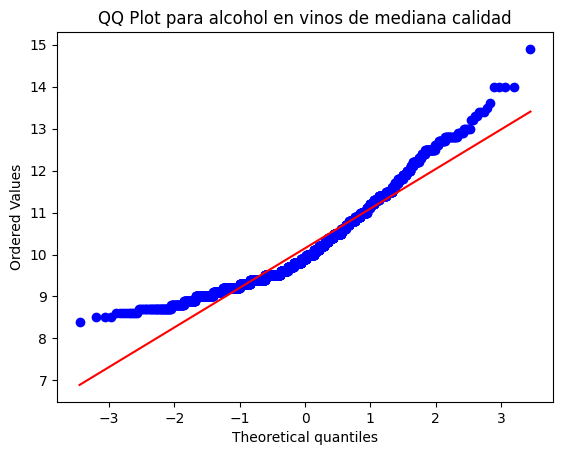

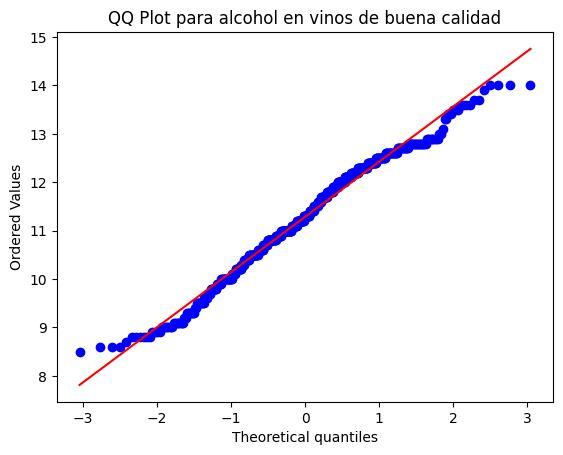

In [638]:
mala_calidad = preprocessed_ds[preprocessed_ds['quality'].isin([1, 2, 3, 4])]['alcohol']
mediana_calidad = preprocessed_ds[preprocessed_ds['quality'].isin([5, 6])]['alcohol']
buena_calidad = preprocessed_ds[preprocessed_ds['quality'].isin([7, 8, 9, 10])]['alcohol']

stats.probplot(mala_calidad, dist="norm", plot=plt)
plt.title("QQ Plot para alcohol en vinos de mala calidad")
plt.show()

stats.probplot(mediana_calidad, dist="norm", plot=plt)
plt.title("QQ Plot para alcohol en vinos de mediana calidad")
plt.show()

stats.probplot(buena_calidad, dist="norm", plot=plt)
plt.title("QQ Plot para alcohol en vinos de buena calidad")
plt.show()

_Viendo las gráficas se pueden decir que las distribuciones no son normales. Probamos realizar un test de Shapiro para comprobar si es cierto:_

In [639]:
stat, p = shapiro(mala_calidad)
print(f"Test de Shapiro-Wilk para vinos de mala calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(mediana_calidad)
print(f"Test de Shapiro-Wilk para vinos de mediana calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(buena_calidad)
print(f"Test de Shapiro-Wilk para vinos de buena calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos de mala calidad: Estadístico=0.961, p-valor=0.001
Test de Shapiro-Wilk para vinos de mediana calidad: Estadístico=0.932, p-valor=0.000
Test de Shapiro-Wilk para vinos de buena calidad: Estadístico=0.986, p-valor=0.000


_Por los resultados vemos que no hay normalidad. Probamos si existe homocedasticidad con el test de Levene:_

In [640]:
stat, p = stats.levene(mala_calidad, mediana_calidad, buena_calidad)
print(f"Test de Levene para alcohol en grupos de calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para alcohol en grupos de calidad: Estadístico=17.273, p-valor=0.000


_Con el resultado vemos que no hay homocedasticidad, pero podría haberla entre pares_

In [641]:
data = pd.DataFrame({
    'value': np.concatenate([mala_calidad, mediana_calidad, buena_calidad]),
    'group': ['mala']*len(mala_calidad) + ['media']*len(mediana_calidad) + ['buena']*len(buena_calidad)
})
tukey_results = pairwise_tukeyhsd(data['value'], data['group'], alpha=0.05)
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 buena   mala  -1.1519    0.0 -1.3755 -0.9283   True
 buena  media  -1.1344    0.0 -1.2426 -1.0263   True
  mala  media   0.0175 0.9786 -0.1894  0.2243  False
----------------------------------------------------


_Vemos que hay homocedasticidad entre los grupos de baja y mediana calidad_

In [642]:
stat, p = stats.mannwhitneyu(mala_calidad, mediana_calidad)
print(f"Test de Mann-Whitney para alcohol en vinos de baja y media calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = stats.kruskal(mala_calidad, buena_calidad)
print(f"Test de Kruskal-Wallis para alcohol en vinos de baja y alta calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = stats.kruskal(mediana_calidad, buena_calidad)
print(f"Test de Kruskal-Wallis para alcohol en vinos de media y alta calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Mann-Whitney para alcohol en vinos de baja y media calidad: Estadístico=172713.000, p-valor=0.993
Test de Kruskal-Wallis para alcohol en vinos de baja y alta calidad: Estadístico=101.845, p-valor=0.000
Test de Kruskal-Wallis para alcohol en vinos de media y alta calidad: Estadístico=437.570, p-valor=0.000


_Se acepta la hipótesis nula entre los grupos de baja y mediana calidad, por lo que, no hay diferencias significativas entre ellos. Se rechaza en los otros casos, y viendo los boxplots planteados, nos indica que nuestra hipótesis es correcta, los vinos de calidad tienen más graduación alcohólica.       
Podemos plantear además lo que venimos haciendo: dividir en grupos de muestras similares para mejorar el poder estadístico del test._

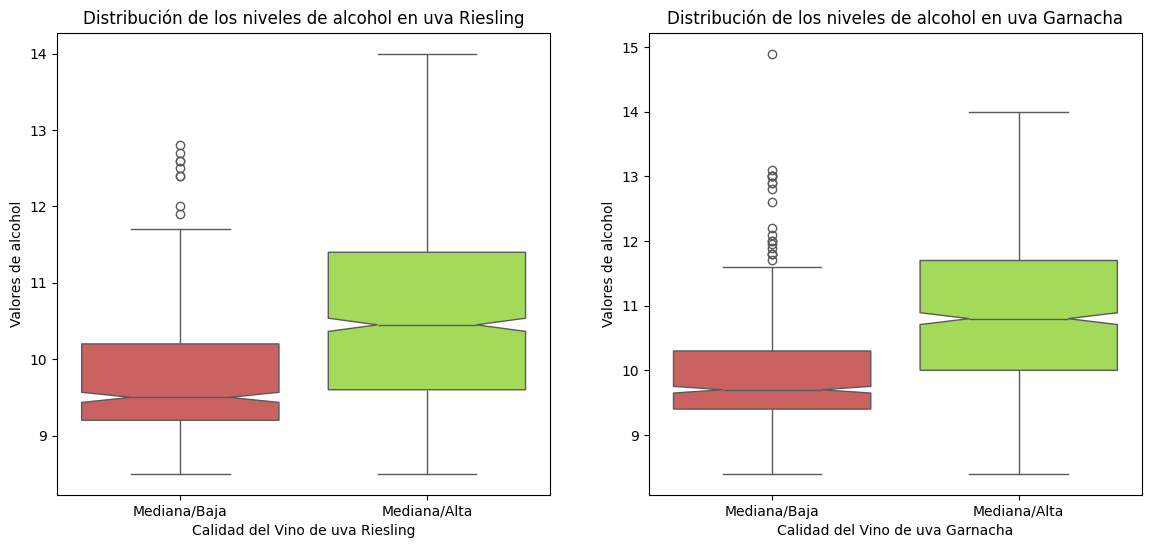

In [643]:
# Se hace la paleta de colores
colores = ["#dd5050", "#a7ee45"]

fig, axis = plt.subplots(1, 2, figsize=(14, 6))

# Se crea el boxplot con seaborn. Antes se aplica un renombre y se aplican colores
sns.boxplot (
    x=riesling_data['quality'].apply(lambda x : 'Mediana/Baja' if x in [1, 2, 3, 4, 5] else 'Mediana/Alta'), 
    y=riesling_data['alcohol'],
    ax=axis[0],
    notch=True, 
    palette=colores,
    hue=riesling_data['quality'].apply(lambda x : 'Mediana/Baja' if x in [1, 2, 3, 4, 5] else 'Mediana/Alta'),
    hue_order=['Mediana/Baja', 'Mediana/Alta'],
    legend=False,
    order=['Mediana/Baja', 'Mediana/Alta']
)
# Se cambia el nombre de los ejes
axis[0].set_xlabel("Calidad del Vino de uva Riesling")
axis[0].set_ylabel(f"Valores de alcohol")
axis[0].set_title(f"Distribución de los niveles de alcohol en uva Riesling")

# Se crea el boxplot con seaborn. Antes se aplica un renombre y se aplican colores
sns.boxplot (
    x=garnacha_data['quality'].apply(lambda x : 'Mediana/Baja' if x in [1, 2, 3, 4, 5] else 'Mediana/Alta'), 
    y=garnacha_data['alcohol'],
    ax=axis[1],
    notch=True, 
    palette=colores,
    hue=garnacha_data['quality'].apply(lambda x : 'Mediana/Baja' if x in [1, 2, 3, 4, 5] else 'Mediana/Alta'),
    hue_order=['Mediana/Baja', 'Mediana/Alta'],
    legend=False,
    order=['Mediana/Baja', 'Mediana/Alta']
)
# Se cambia el nombre de los ejes
axis[1].set_xlabel("Calidad del Vino de uva Garnacha")
axis[1].set_ylabel(f"Valores de alcohol")
axis[1].set_title(f"Distribución de los niveles de alcohol en uva Garnacha")

plt.show()

_Vemos que si agrupamos por tipo de uva y en dos calidades hay una mayor diferencia que con 3 grupos. No es notorio que exista normalidad ni tampoco homocedasticidad, pero probamos realizar ambas para saber si podemos realizar un test T._  
Realizamos Shapiro-Wilk:

In [644]:
med_mala_calidad_r = riesling_data[riesling_data['quality'].isin([1, 2, 3, 4, 5])]['alcohol']
med_buena_calidad_r = riesling_data[riesling_data['quality'].isin([6, 7, 8, 9, 10])]['alcohol']

med_mala_calidad_g = garnacha_data[garnacha_data['quality'].isin([1, 2, 3, 4, 5])]['alcohol']
med_buena_calidad_g = garnacha_data[garnacha_data['quality'].isin([6, 7, 8, 9, 10])]['alcohol']

stat, p = shapiro(med_mala_calidad_r)
print(f"Test de Shapiro-Wilk para vinos de uva Riesling de mediana/baja calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = shapiro(med_buena_calidad_r)
print(f"Test de Shapiro-Wilk para vinos de uva Riesling de mediana/alta calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(med_mala_calidad_g)
print(f"\nTest de Shapiro-Wilk para vinos de uva Garnacha de mediana/baja calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = shapiro(med_buena_calidad_g)
print(f"Test de Shapiro-Wilk para vinos de uva Garnacha de mediana/alta calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos de uva Riesling de mediana/baja calidad: Estadístico=0.929, p-valor=0.000
Test de Shapiro-Wilk para vinos de uva Riesling de mediana/alta calidad: Estadístico=0.963, p-valor=0.000

Test de Shapiro-Wilk para vinos de uva Garnacha de mediana/baja calidad: Estadístico=0.859, p-valor=0.000
Test de Shapiro-Wilk para vinos de uva Garnacha de mediana/alta calidad: Estadístico=0.979, p-valor=0.000


_Vemos que no hay normalidad en los datos. Probamos el test de Levene para ver si hay homocedasticidad:_

In [645]:
stat, p = stats.levene(med_mala_calidad_r, med_buena_calidad_r)
print(f"\nTest de Levene para volatile acidity para uva Riesling: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = stats.levene(med_mala_calidad_g, med_buena_calidad_g)
print(f"Test de Levene para volatile acidity para uva Garnacha: Estadístico={stat:.3f}, p-valor={p:.3f}")


Test de Levene para volatile acidity para uva Riesling: Estadístico=94.622, p-valor=0.000
Test de Levene para volatile acidity para uva Garnacha: Estadístico=144.398, p-valor=0.000


_Tampoco hay homocedasticidad. Por tanto debemos realizar Kruskal-Wallis:_

In [646]:
stat, p = stats.kruskal(med_mala_calidad_r, med_buena_calidad_r)
print(f"\nTest de Kruskal-Wallis para alcohol en vinos Riesling: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = stats.kruskal(med_mala_calidad_g, med_buena_calidad_g)
print(f"Test de Kruskal-Wallis para alcohol en vinos Garnacha: Estadístico={stat:.3f}, p-valor={p:.3f}")


Test de Kruskal-Wallis para alcohol en vinos Riesling: Estadístico=183.664, p-valor=0.000
Test de Kruskal-Wallis para alcohol en vinos Garnacha: Estadístico=314.762, p-valor=0.000


_Se rechazan las hipótesis nulas, podemos decir que existen diferencias significativas entre las medias de graduación alcohólica de los vinos de buena y mala calidad._

### _Los vinos de uva Garnacha tienen mejor calidad que los vinos de uva Riesling_

Ya vimos que la prueba de Chi cuadrado, nos dió como resultado que la calidad de resultante del vino está determinada en parte por el tipo de uva. Ahora, intentamos probar si realmente hay medias significativamente distintas entre ambos tipos de vinos. Podemos aplicar Kruskal-Wallis cuando se trata de variables categóricas ordinales.

In [666]:
stat, p = stats.kruskal(riesling_data["quality"], garnacha_data["quality"])
print(f"Test de Kruskal-Wallis para calidad promedio en vinos: Estadístico={stat:.3f}, p-valor={p:.3f}")

media_r = riesling_data["quality"].mean()
media_g = garnacha_data["quality"].mean()

if (p < 0.05) :
    if (media_r > media_g) :
        print(f"\nLos vinos de uva Riesling ({media_r:.3f}) tienen mejor calidad en promedio que los vinos de uva Garnacha ({media_g:.3f})")
    else :
        print(f"\nLos vinos de uva Garnacha tienen mejor calidad en promedio que los vinos de uva Riesling")
else :
    print("\nNo existen diferencias significativas entre la caliddad de los vinos de uva Riesling y Garnacha")

Test de Kruskal-Wallis para calidad promedio en vinos: Estadístico=63.026, p-valor=0.000

Los vinos de uva Riesling (5.882) tienen mejor calidad en promedio que los vinos de uva Garnacha (5.636)


_Vemos que hay diferencias significativas en ambos tipos de vinos, y anteriormente, habíamos calculado las medias de calidad para ambas uvas. En este caso, la de Riesling era 5.9 y la de Garnacha era 5.6. Nuestra hipótesis es rechazada._

### _La calidad del vino está determinada por el alcohol, pH, sulfatos y ácido cítrico_

Para probar si la calidad de un vino está determinada por éstas cuatro variables podemos aplicar árboles de decisión. Este modelo de predicción se basa en utilizar las valores de las features para establecer una conexión entre la calidad (el objetivo) y estas. 

In [706]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Se definen los datos a analizar
X = riesling_data.drop(['quality', 'is_riesling', 'total sulfur dioxide', 'alcohol', 'residual sugar'], axis=1)    # Características (atributos)
y = riesling_data['quality']                                  # Variable objetivo 

# Se dividen los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Se crea el modelo de árbol de decisión
modelo = DecisionTreeClassifier(random_state=42)

# Se entrenar el modelo
modelo.fit(X_train, y_train)

# Se evalua la importancia de las características
importancias = modelo.feature_importances_

# Se crea un DataFrame con la importancia de las características
df_importancias = pd.DataFrame({
    'Atributo': X.columns,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Se muestran las características más influyentes
print("Características influyentes en la calidad del vino:")
print(df_importancias)

Características influyentes en la calidad del vino:
              Atributo  Importancia
4  free sulfur dioxide     0.165961
5              density     0.156363
6                   pH     0.144862
1     volatile acidity     0.130890
2          citric acid     0.103817
7            sulphates     0.102746
3            chlorides     0.099258
0        fixed acidity     0.096103


### _Un contenido elevado de ácido cítrico resulta en una menor calidad del vino_

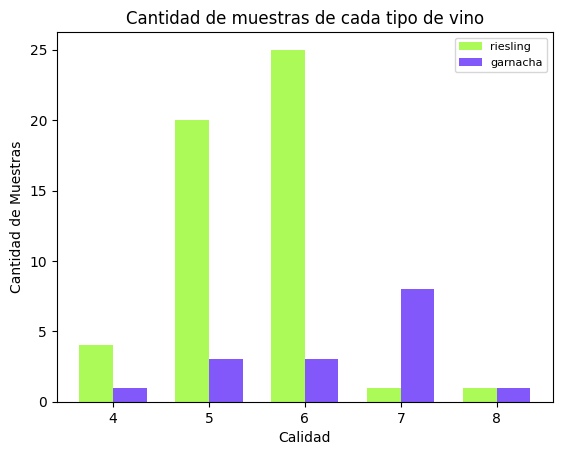

In [696]:
citricos_altos = preprocessed_ds[preprocessed_ds["citric acid"] > 0.70]
# Se extraen los datos de tipo de uva. Se agrupa por calidad y se cuenta el número de muestras. 
# Se deja el índice como columna
group_riesling_data = citricos_altos[citricos_altos["is_riesling"] == True].groupby("quality").count().reset_index()
group_garnacha_data = citricos_altos[citricos_altos["is_riesling"] == False].groupby("quality").count().reset_index()

# Se hace un ensamble según la calidad
merged_data = group_riesling_data.merge(group_garnacha_data, on="quality", how="outer", suffixes=('_riesling', '_garnacha'))

# Los diferentes valores de calidad se dejan en x
x = merged_data["quality"]

# Se establece un ancho de barra
width = 0.35

# Se crean las barras para Riesling y Garnacha
plt.bar([i - width/2 for i in range(len(x))], merged_data["citric acid_riesling"], width, label='riesling', color="#ACFA58")
plt.bar([i + width/2 for i in range(len(x))], merged_data["citric acid_garnacha"], width, label='garnacha', color="#8258FA")

# Se agregan etiquetas a los ejes
plt.xlabel("Calidad")
plt.ylabel("Cantidad de Muestras")

# Se agrega un titulo al gráfico
plt.title("Cantidad de muestras de cada tipo de vino")
plt.xticks(range(len(x)), merged_data["quality"]) 

# Se agrega una leyenda
plt.legend()

# Se agrega una leyenda
plt.legend(fontsize=8)

# Se muestra el grafico
plt.show()

## Dudas & Notas

**NOTA:** CORREGIR TILDES Y NÚMEROS CON LETRAS O SIMBOLOS.  
**NOTA:** HAY NUMEROS EN DENSITY CON DISTINTAS PROFUNDIDADES.  

**AGREGAR:** FUENTES LPM.   
**AGREGAR:** ANALISIS DE PARA QUE SERVIRÍA CADA VARIABLE.  
**AGREGAR:** ANALIZAR EL RESTO DE ATRIBUTOS DE LA FILA "density" PARA SABER SI INFLUYEN EN LOS VALORES, O LOS PODEMOS BORRAR DEL DATASET.  

**DUDAS RESPONDIDAS:** SE DEBE BORRAR LA COLUMNA TYPE ORIGINAL LUEGO DEL DUMMY ENCODING. _(respondida)_ si.  
**DUDAS RESPONDIDAS:** HACER ESCALADO ANTES DEL ANÁLISIS UNIVARIADO.  _(respondida)_ el escalado no se hace sin motivo.  
**DUDAS RESPONDIDAS:** ES NECESARIO COPIAR EL DATASET CUANDO CAMBIAMOS EL TIPO DEL DATO A FLOAT DE UNA FEATURE (Y CUANDO BORRAMOS COLUMNAS NULAS?)? _(respondida)_ si   
**DUDAS RESPONDIDAS:** MUCHOS OUTLIERS EN "DENSITY", VALORES SIN SENTIDO. ,99 < DENSITY < 1,015 _(respondida)_ nota agregar  
**DUDAS RESPONDIDAS:** SE PUEDE MEJORAR LA PRECISION DEL VALUE_COUNTS DE OTRA MANERA A LA NUESTRA (CORRECCION DE ALCOHOL)? _(respondida)_ si, usando gráficos.   
**DUDAS RESPONDIDAS:** ES NECESARIO QUE SEA TAN ATÓMICA LA NOTEBOOK? _(respondida)_ si .   
**DUDAS RESPONDIDAS:** TENEMOS QUÉ EXPLICAR DE DÓNDE SACAMOS EL TIPO DE DATO DE CADA VARIABLE? _(respondida)_ no.  
**DUDAS RESPONDIDAS:** DONDE PONEMOS LA BIBLIOGRAFIA. _(respondida)_ en el informe.    
**DUDAS RESPONDIDAS:** REVISAR LA EXPLICACION DE LO DEL ALCOHOL Y DENSITY. _(respondida)_ esta bien.     
**DUDAS RESPONDIDAS:** OUTLIER EN ACIDO CITRICO (PARECE SER RANDOM NO HAY RELACION CON EL RESTO DE ATRIBUTOS). _(respondida)_ no se hace nada  
**DUDAS RESPONDIDAS:** PREGUNTAR SOBRE SI EL 1.66 DE CITRIC ACID DEBERÍA CORREGIRSE PORQ ESTAMOS HABLANDO DE UN VALOR ILEGAL O NO COHERENTE CON LO QUE UNO ESPERA DEL VINO (ANALIZAR RESPECTO DE LOS OTROS ATRIBUTOS). _(respondida)_ no se sabe ni el año ni el lugar de la muestra, no aporta nada    
**DUDAS RESPONDIDAS:** ESTANDARIZAR O NORMALIZAR O ESTANDARIZACION ROBUSTA. _(respondida)_ la robusta no esta justificada porque si bien hay outliers no son mas de 2.    
**DUDAS RESPONDIDAS:** DUPLICADOS (NO AFECTAN LA DISTRIBUCION, NO APORTAN OUTLIERS EN ACIDO CITRICO PERO SI EN EL RESTO, BAJA PRECISION CON DATOS GENERA REPETIDOS). _(respondida)_ es una observacion, pero no alteran la distribucion de la muestra y podrían ser posible.   